In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import os
import random
from datetime import datetime
import scipy
import seaborn as sns
import time

In [2]:
# Read all files in the directory
def read_file(in_folder, percent=1, random=True):
    i = 0
    # Random sampling
    all_files = sorted(os.listdir(in_folder))
    num_files = int(np.floor(len(all_files) * percent))
    if random: 
        chosen_files = random.sample(all_files, num_files)
    else: 
        chosen_files = all_files[:num_files]
    
    for file in chosen_files:
        file_name = in_folder + file
        print(file_name)
        if file_name[-9:] == '.DS_Store':
            continue
        if i == 0:
            df = pd.read_csv(file_name)
        else:
            temp_df = pd.read_csv(file_name)
            df = pd.concat([df, temp_df]).reset_index(drop=True)
        i +=1
    print('Number of files:',format(i))
    return df

In [3]:
# df_0 = read_file('data/', percent=0.04) # 16 files
df_0 = read_file('../data/', percent=0.15, random=False) # 16 files

../data/.DS_Store
../data/uk_obs_coordinates_000000000000
../data/uk_obs_coordinates_000000000001
../data/uk_obs_coordinates_000000000002
../data/uk_obs_coordinates_000000000003
../data/uk_obs_coordinates_000000000004
../data/uk_obs_coordinates_000000000005
../data/uk_obs_coordinates_000000000006
../data/uk_obs_coordinates_000000000007
../data/uk_obs_coordinates_000000000008
../data/uk_obs_coordinates_000000000009
../data/uk_obs_coordinates_000000000010
../data/uk_obs_coordinates_000000000011
Number of files: 12


In [4]:
df_0.shape

(41245511, 6)

In [5]:
df_0['Level'].unique()

array(['1st Floor', '2nd Floor'], dtype=object)

In [6]:
df_0.loc[df_0['Level'].isin(['1st Floor', '2nd Floor', '3rd Floor']),:]

Site      Level      ClientMacAddr        lat       lng  \
0         UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
1         UK Office  1st Floor  9c:8c:6e:46:0b:7c  51.460788 -0.932288   
2         UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
3         UK Office  1st Floor  9c:8c:6e:46:0b:7c  51.460782 -0.932292   
4         UK Office  1st Floor  9c:8c:6e:46:0b:7c  51.460782 -0.932292   
...             ...        ...                ...        ...       ...   
41245506  UK Office  1st Floor  e4:a7:a0:99:dc:ed  51.460476 -0.932768   
41245507  UK Office  1st Floor  88:66:a5:56:03:4c  51.460377 -0.932543   
41245508  UK Office  1st Floor  88:66:a5:0e:70:77  51.460463 -0.932998   
41245509  UK Office  1st Floor  5c:5f:67:8b:e2:64  51.460456 -0.932850   
41245510  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460467 -0.932975   

                            localtime  
0         2020-09-01 23:58:49.582 UTC  
1         2020-09-01 23:58:45.435 UTC  
2         2020-09-01 23:58:38.112 UTC  
3         2020-09-01 23:58:35.379 UTC  
4         2020-09-01 23:58:29.827 UTC  
...                               ...  
41245506  2019-10-03 15:27:48.575 UTC  
41245507  2019-10-03 15:27:48.574 UTC  
41245508  2019-10-03 15:27:48.276 UTC  
41245509  2019-10-03 15:27:48.276 UTC  
41245510  2019-10-03 15:27:48.276 UTC  

[41245511 rows x 6 columns]

### Data cleaning

In [7]:
## Clean data at 1st - 3rd floor 
df_1 = df_0.loc[df_0['Level'].isin(['Ground Floor', '1st Floor', '2nd Floor']),:]
print("# rows before cleaning: {}".format(df_1.shape[0]))

# For the first rectangle, I filter out  
# Logic: left min, right max
df_2 = df_1.query("lat>=51.46038149506283 and lat<=51.46054187270378")
df_2 = df_2.query("lng>=-0.9333064334614474 and lng<=-0.9322956462351958")

df_2.reset_index(inplace=True)
df_2.tail()

# rows before cleaning: 41245511


index       Site      Level      ClientMacAddr        lat  \
19288996  41245505  UK Office  1st Floor  48:45:20:37:e8:b7  51.460482   
19288997  41245506  UK Office  1st Floor  e4:a7:a0:99:dc:ed  51.460476   
19288998  41245508  UK Office  1st Floor  88:66:a5:0e:70:77  51.460463   
19288999  41245509  UK Office  1st Floor  5c:5f:67:8b:e2:64  51.460456   
19289000  41245510  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460467   

               lng                    localtime  
19288996 -0.932770  2019-10-03 15:27:48.575 UTC  
19288997 -0.932768  2019-10-03 15:27:48.575 UTC  
19288998 -0.932998  2019-10-03 15:27:48.276 UTC  
19288999 -0.932850  2019-10-03 15:27:48.276 UTC  
19289000 -0.932975  2019-10-03 15:27:48.276 UTC

In [8]:
df_2['Level'].unique()

array(['1st Floor', '2nd Floor'], dtype=object)

In [9]:
# For the second rectangle, I filter out 
df_3 = df_1.query("lat>=51.46055295640854 and lat<=51.460984859445034")
df_3 = df_3.query("lng>=-0.932590207567124 and lng<=-0.9322208241894918")
df_3.reset_index(inplace=True)
df_3.tail()
#df_1 = pd.concat([df_2, df_3], ignore_index=True)
#print("# rows after cleaning: {}".format(df_1.shape[0]))


index       Site      Level      ClientMacAddr        lat  \
15001602  41245478  UK Office  1st Floor  48:45:20:37:c0:a3  51.460959   
15001603  41245479  UK Office  1st Floor  a4:c3:f0:a5:f0:f0  51.460951   
15001604  41245483  UK Office  1st Floor  5c:5f:67:8b:e1:b5  51.460795   
15001605  41245487  UK Office  1st Floor  c4:6e:1f:1b:4f:c0  51.460851   
15001606  41245492  UK Office  1st Floor  98:10:e8:3a:8a:6e  51.460689   

               lng                    localtime  
15001602 -0.932292  2019-10-03 15:27:49.278 UTC  
15001603 -0.932286  2019-10-03 15:27:49.278 UTC  
15001604 -0.932229  2019-10-03 15:27:49.275 UTC  
15001605 -0.932247  2019-10-03 15:27:49.271 UTC  
15001606 -0.932237  2019-10-03 15:27:49.078 UTC

In [10]:
#Merging df_2 and df_3
df_1 = pd.concat([df_2, df_3], ignore_index=True).drop_duplicates(subset=['index']).drop(columns=['index'])
print("# rows after cleaning: {}".format(df_1.shape[0]))
df_1.head(10)

# rows after cleaning: 34290608


Site      Level      ClientMacAddr        lat       lng  \
0  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
1  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
2  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460448 -0.933048   
3  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
4  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
5  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
6  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
7  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
8  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
9  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   

                     localtime  
0  2020-09-01 23:58:49.582 UTC  
1  2020-09-01 23:58:38.112 UTC  
2  2020-09-01 23:58:29.514 UTC  
3  2020-09-01 23:58:18.046 UTC  
4  2020-09-01 23:58:09.522 UTC  
5  2020-09-01 23:57:57.986 UTC  
6  2020-09-01 23:57:44.417 UTC  
7  2020-09-01 23:57:34.422 UTC  
8  2020-09-01 23:57:27.891 UTC  
9  2020-09-01 23:57:19.409 UTC

In [11]:
## Clean data at 4th floor 
df_4 = df_0.loc[df_0['Level']=='3rd Floor',:]
print("# rows before cleaning: {}".format(df_4.shape[0]))

# For the 4th floor, I filter out  
df_4 = df_4.query("lat>=51.46042494504671 and lat<=51.46052254063351")
df_4 = df_4.query("lng>=-0.9332608338419903 and lng<=-0.9323114003049598")
print("# rows after cleaning: {}".format(df_4.shape[0]))


# rows before cleaning: 0
# rows after cleaning: 0


In [12]:
# Combined all filtered df
cleaned_df = pd.concat([df_1, df_4], ignore_index=True)
df = cleaned_df
print("# of total rows after cleaning: {}".format(df.shape[0]))

# of total rows after cleaning: 34290608


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34290608 entries, 0 to 34290607
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Site           object 
 1   Level          object 
 2   ClientMacAddr  object 
 3   lat            float64
 4   lng            float64
 5   localtime      object 
dtypes: float64(2), object(4)
memory usage: 1.5+ GB


## TODO: 
1. Remove outliers by fixing the boundary 
2. Identify fixed and mobile device
3. Engineering Job function 
4. Security level
5. Zone
6. Maintenance or not (if machine)

## Add date time columns

In [14]:
start_time = time.time()
df['normalized_time'] = pd.to_datetime(df['localtime'], format="%Y-%m-%d %H:%M:%S.%f %Z", errors="coerce").fillna(pd.to_datetime(df['localtime'], format="%Y-%m-%d %H:%M:%S %Z", errors="coerce"))
df['localtime'] = df['normalized_time']
print("--- %s mins ---" % (int(time.time() - start_time)/60))

start_time = time.time()
df['date']  = df['localtime'].dt.date
df['time']  = df['localtime'].dt.strftime('%H:%M:%S')
df["dayOfWeek"] = df["localtime"].dt.weekday # 0 is Monday, 6 is Sunday
df["IsWeekend"] = df["dayOfWeek"] >= 5
print("--- %s mins ---" % (int(time.time() - start_time)/60))

--- 8.5 mins ---
--- 2.5833333333333335 mins ---


In [15]:
df.head()

Site      Level      ClientMacAddr        lat       lng  \
0  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
1  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
2  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460448 -0.933048   
3  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
4  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   

                         localtime                  normalized_time  \
0 2020-09-01 23:58:49.582000+00:00 2020-09-01 23:58:49.582000+00:00   
1 2020-09-01 23:58:38.112000+00:00 2020-09-01 23:58:38.112000+00:00   
2 2020-09-01 23:58:29.514000+00:00 2020-09-01 23:58:29.514000+00:00   
3 2020-09-01 23:58:18.046000+00:00 2020-09-01 23:58:18.046000+00:00   
4 2020-09-01 23:58:09.522000+00:00 2020-09-01 23:58:09.522000+00:00   

         date      time  dayOfWeek  IsWeekend  
0  2020-09-01  23:58:49          1      False  
1  2020-09-01  23:58:38          1      False  
2  2020-09-01  23:58:29          1      False  
3  2020-09-01  23:58:18          1      False  
4  2020-09-01  23:58:09          1      False

In [16]:
## Start and end date
print(min(df['date']))
print(max(df['date']))

2019-09-05
2020-09-01


## Frequency in days

In [17]:
frequency = df.groupby('ClientMacAddr')['date'].agg(total_day='nunique', total_signal = 'count').reset_index()
frequency

ClientMacAddr  total_day  total_signal
0     00:08:22:00:b9:fb          1            13
1     00:08:22:0a:b9:fb          1             1
2     00:08:22:0e:c4:fb          1             2
3     00:08:22:20:bc:fb          1             6
4     00:08:22:24:b7:fb          1            11
...                 ...        ...           ...
9549  fc:a6:67:be:c0:a5          6           438
9550  fc:d8:48:80:ab:de          2           315
9551  fc:db:b3:31:4e:a8          1            13
9552  fc:f8:ae:5a:6f:ea          1           321
9553  fc:fc:48:36:16:6b          1           114

[9554 rows x 3 columns]

In [18]:
# Frequency in days
frequency['total_day'].value_counts()

1     6951
2      705
3      272
4      187
5      135
      ... 
59       1
75       1
63       1
71       1
95       1
Name: total_day, Length: 72, dtype: int64

## Weekend & Weekday

In [19]:
# Weekend or weekdays
isWeekend = df.groupby(['ClientMacAddr', 'IsWeekend'])['date'].nunique().rename('Days').reset_index()
isWeekend

ClientMacAddr  IsWeekend  Days
0     00:08:22:00:b9:fb      False     1
1     00:08:22:0a:b9:fb      False     1
2     00:08:22:0e:c4:fb      False     1
3     00:08:22:20:bc:fb      False     1
4     00:08:22:24:b7:fb      False     1
...                 ...        ...   ...
9645  fc:a6:67:be:c0:a5      False     6
9646  fc:d8:48:80:ab:de      False     2
9647  fc:db:b3:31:4e:a8      False     1
9648  fc:f8:ae:5a:6f:ea      False     1
9649  fc:fc:48:36:16:6b      False     1

[9650 rows x 3 columns]

In [20]:
# Data in weekday
df_weekday = isWeekend[isWeekend['IsWeekend'] == False].sort_values('Days', ascending=False)
df_weekday = df_weekday[['ClientMacAddr', 'Days']]
df_weekday

ClientMacAddr  Days
5766  9c:8c:6e:46:0b:7c   187
5770  9c:8c:6e:46:1c:5e   187
5340  8c:f5:a3:cd:d2:db   112
1735  40:83:de:81:43:54    95
5081  88:66:a5:45:b9:ea    91
...                 ...   ...
3799  80:58:f8:69:3f:5f     1
3798  80:58:f8:69:1b:3b     1
3797  80:58:f8:69:08:28     1
3796  80:58:f8:68:e3:03     1
9649  fc:fc:48:36:16:6b     1

[9502 rows x 2 columns]

In [21]:
# Data in weekend
df_weekend = isWeekend[isWeekend['IsWeekend'] == True].sort_values('Days', ascending=False)
df_weekend = df_weekend[['ClientMacAddr', 'Days']]
print(df_weekend.shape)
df_weekend
# in Weekend
# Security guard
# Technician
# Employee overtimea
# Machine

(148, 2)


ClientMacAddr  Days
5767  9c:8c:6e:46:0b:7c    72
5771  9c:8c:6e:46:1c:5e    72
5082  88:66:a5:45:b9:ea    40
6267  ac:d1:b8:03:40:8f    28
5765  9c:8c:6e:46:01:f8    24
...                 ...   ...
1641  3c:28:6d:f5:a2:6f     1
1606  38:f9:d3:20:2d:00     1
1583  38:80:df:e4:09:0c     1
1360  34:2d:0d:09:69:e9     1
9603  f8:c3:9e:8b:fe:9b     1

[148 rows x 2 columns]

In [22]:
min_lng = min(df['lng'])
max_lng = max(df['lng'])
min_lat = min(df['lat'])
max_lat = max(df['lat'])

## Calculate average distance by Mac Id and Date

In [23]:
# Group by MacID and Date, and average the distance
temp1 = df.groupby(['ClientMacAddr', 'date'])['lat'].agg(max_lat='max', min_lat='min').reset_index()
temp2 = df.groupby(['ClientMacAddr', 'date'])['lng'].agg(max_lng='max', min_lng='min').reset_index()
temp = temp1.merge(temp2, on=['ClientMacAddr', 'date'])
temp['Distance(Meter)'] = 111139*((temp['max_lat'] - temp['min_lat'])**2 + (temp['max_lng'] - temp['min_lng'])**2)**0.5
temp.sort_values(['ClientMacAddr', 'date', 'Distance(Meter)'], ascending = [True, True, False])

ClientMacAddr        date    max_lat    min_lat   max_lng  \
0      00:08:22:00:b9:fb  2020-02-27  51.460393  51.460393 -0.932497   
1      00:08:22:0a:b9:fb  2020-03-02  51.460386  51.460386 -0.932811   
2      00:08:22:0e:c4:fb  2019-10-17  51.460420  51.460420 -0.932617   
3      00:08:22:20:bc:fb  2020-06-15  51.460448  51.460382 -0.932492   
4      00:08:22:24:b7:fb  2020-02-18  51.460696  51.460633 -0.932276   
...                  ...         ...        ...        ...       ...   
35554  fc:d8:48:80:ab:de  2020-02-11  51.460390  51.460386 -0.932489   
35555  fc:d8:48:80:ab:de  2020-02-19  51.460513  51.460425 -0.932657   
35556  fc:db:b3:31:4e:a8  2020-02-26  51.460411  51.460411 -0.933036   
35557  fc:f8:ae:5a:6f:ea  2020-02-11  51.460608  51.460410 -0.932323   
35558  fc:fc:48:36:16:6b  2020-01-17  51.460906  51.460602 -0.932221   

        min_lng  Distance(Meter)  
0     -0.932497         0.085973  
1     -0.932811         0.000000  
2     -0.932617         0.000000  
3     -0.932658        19.917625  
4     -0.932314         8.172743  
...         ...              ...  
35554 -0.932661        19.191727  
35555 -0.933054        45.157559  
35556 -0.933036         0.000000  
35557 -0.932448        26.020636  
35558 -0.932423        40.561440  

[35559 rows x 7 columns]

In [24]:
# Group by Date and average the distance
temp = temp.groupby('ClientMacAddr')['Distance(Meter)'].mean().reset_index()
temp

ClientMacAddr  Distance(Meter)
0     00:08:22:00:b9:fb         0.085973
1     00:08:22:0a:b9:fb         0.000000
2     00:08:22:0e:c4:fb         0.000000
3     00:08:22:20:bc:fb        19.917625
4     00:08:22:24:b7:fb         8.172743
...                 ...              ...
9549  fc:a6:67:be:c0:a5        48.757173
9550  fc:d8:48:80:ab:de        32.174643
9551  fc:db:b3:31:4e:a8         0.000000
9552  fc:f8:ae:5a:6f:ea        26.020636
9553  fc:fc:48:36:16:6b        40.561440

[9554 rows x 2 columns]

In [25]:
# Add total days and total signals
temp = temp.merge(frequency, on='ClientMacAddr')
temp.sort_values('Distance(Meter)', ascending = False)

# Add Weekdays and Weekend
df_temp = temp.merge(df_weekday, how='left', on = 'ClientMacAddr').fillna(0).rename(columns = {'Days':'Weekday'})
df_temp = df_temp.merge(df_weekend, how='left', on = 'ClientMacAddr').fillna(0).rename(columns = {'Days':'Weekend'})

## Remove outliers: remove ClientMacAddr that has only 1 signal (row)
df_temp = df_temp.loc[df_temp['total_signal'] > 1,:]
df_temp

ClientMacAddr  Distance(Meter)  total_day  total_signal  Weekday  \
0     00:08:22:00:b9:fb         0.085973          1            13      1.0   
2     00:08:22:0e:c4:fb         0.000000          1             2      1.0   
3     00:08:22:20:bc:fb        19.917625          1             6      1.0   
4     00:08:22:24:b7:fb         8.172743          1            11      1.0   
5     00:08:22:24:bd:fb         1.212654          1             2      1.0   
...                 ...              ...        ...           ...      ...   
9549  fc:a6:67:be:c0:a5        48.757173          6           438      6.0   
9550  fc:d8:48:80:ab:de        32.174643          2           315      2.0   
9551  fc:db:b3:31:4e:a8         0.000000          1            13      1.0   
9552  fc:f8:ae:5a:6f:ea        26.020636          1           321      1.0   
9553  fc:fc:48:36:16:6b        40.561440          1           114      1.0   

      Weekend  
0         0.0  
2         0.0  
3         0.0  
4         0.0  
5         0.0  
...       ...  
9549      0.0  
9550      0.0  
9551      0.0  
9552      0.0  
9553      0.0  

[9225 rows x 6 columns]

In [26]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9225 entries, 0 to 9553
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ClientMacAddr    9225 non-null   object 
 1   Distance(Meter)  9225 non-null   float64
 2   total_day        9225 non-null   int64  
 3   total_signal     9225 non-null   int64  
 4   Weekday          9225 non-null   float64
 5   Weekend          9225 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 504.5+ KB


## Visualize the data

array([[<AxesSubplot:title={'center':'Distance(Meter)'}>]], dtype=object)

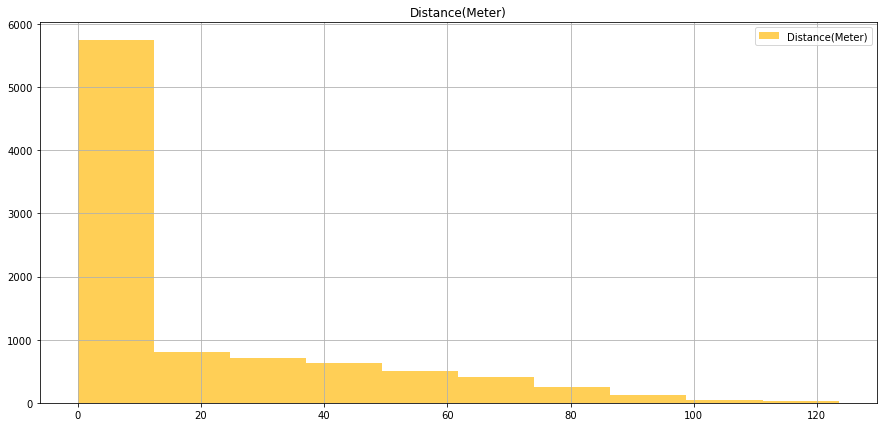

In [27]:
df_temp.hist(column='Distance(Meter)',
             figsize=(15, 7),
             legend=True,
             color='#FFCF56')

array([[<AxesSubplot:title={'center':'total_day'}>]], dtype=object)

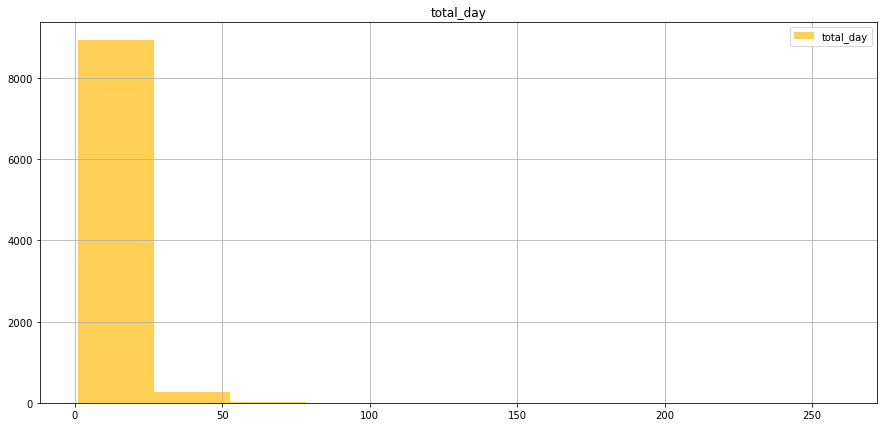

In [28]:
df_temp.hist(column='total_day',
             figsize=(15, 7),
             legend=True,
             color='#FFCF56',
             bins=10)

array([[<AxesSubplot:title={'center':'total_signal'}>]], dtype=object)

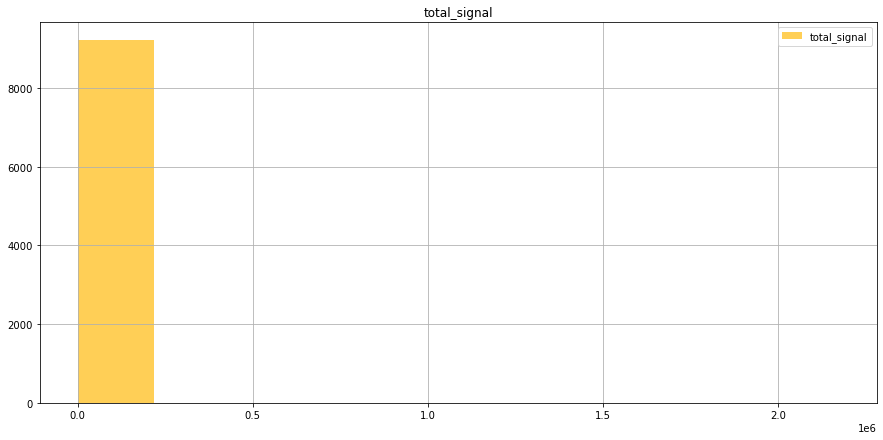

In [29]:
df_temp.hist(column='total_signal',
             figsize=(15, 7),
             legend=True,
             color='#FFCF56')

In [30]:
df_temp.describe()

Distance(Meter)    total_day  total_signal      Weekday      Weekend
count      9225.000000  9225.000000  9.225000e+03  9225.000000  9225.000000
mean         18.114989     3.818970  3.717103e+03     3.732791     0.086179
std          25.445396     8.731763  3.712307e+04     8.059880     1.436367
min           0.000000     1.000000  2.000000e+00     0.000000     0.000000
25%           0.000000     1.000000  1.300000e+01     1.000000     0.000000
50%           3.789718     1.000000  1.300000e+01     1.000000     0.000000
75%          31.434657     2.000000  1.550000e+02     2.000000     0.000000
max         123.534017   259.000000  2.172994e+06   187.000000    72.000000

## Define the characteristics of Mac ID

Fixed device:
1. Distance < 45 meters
2. Frequency in days >= 5 days / a year
3. Contain data in weekends
4. TODO: Data present whole days
5. TODO: High density: low variance

Mobile device:
1. Distance >= 45 meters 

TODO: 
 - Security guard: 
 1. Night shift
 2. Frequency in days > 5
 3. Contain data in weekend
 - Employee:
 1. Frequency in days > 5
 2. No weekends
 - Visitors:
 1. Frequency in days <= 5
 2. No weekends

In [31]:
# Define the Job function
df_temp['Mobile_or_fixed'] = 'Mobile Device'
df_temp.loc[df_temp['Distance(Meter)']<5, 'Mobile_or_fixed'] = 'Fixed Device'
df_temp

ClientMacAddr  Distance(Meter)  total_day  total_signal  Weekday  \
0     00:08:22:00:b9:fb         0.085973          1            13      1.0   
2     00:08:22:0e:c4:fb         0.000000          1             2      1.0   
3     00:08:22:20:bc:fb        19.917625          1             6      1.0   
4     00:08:22:24:b7:fb         8.172743          1            11      1.0   
5     00:08:22:24:bd:fb         1.212654          1             2      1.0   
...                 ...              ...        ...           ...      ...   
9549  fc:a6:67:be:c0:a5        48.757173          6           438      6.0   
9550  fc:d8:48:80:ab:de        32.174643          2           315      2.0   
9551  fc:db:b3:31:4e:a8         0.000000          1            13      1.0   
9552  fc:f8:ae:5a:6f:ea        26.020636          1           321      1.0   
9553  fc:fc:48:36:16:6b        40.561440          1           114      1.0   

      Weekend Mobile_or_fixed  
0         0.0    Fixed Device  
2         0.0    Fixed Device  
3         0.0   Mobile Device  
4         0.0   Mobile Device  
5         0.0    Fixed Device  
...       ...             ...  
9549      0.0   Mobile Device  
9550      0.0   Mobile Device  
9551      0.0    Fixed Device  
9552      0.0   Mobile Device  
9553      0.0   Mobile Device  

[9225 rows x 7 columns]

In [32]:
df_temp["Mobile_or_fixed"].value_counts()

Fixed Device     4812
Mobile Device    4413
Name: Mobile_or_fixed, dtype: int64

In [33]:
#Select fixed device
Fix_device = df_temp[df_temp['Mobile_or_fixed']=='Fixed Device'].sort_values('Distance(Meter)', ascending=False)
Fix_device

ClientMacAddr  Distance(Meter)  total_day  total_signal  Weekday  \
4452  80:58:f8:cc:10:67         4.997148          1            13      1.0   
7520  d0:77:14:7f:b9:2c         4.988431          1            13      1.0   
3800  80:58:f8:70:0f:66         4.977924          1            13      1.0   
7446  d0:77:14:74:85:9d         4.975688          1            13      1.0   
8218  d0:77:14:ff:47:71         4.960126          1            14      1.0   
...                 ...              ...        ...           ...      ...   
4004  80:58:f8:8e:3e:dd         0.000000          1            13      1.0   
4008  80:58:f8:8f:08:de         0.000000          1             8      1.0   
4009  80:58:f8:8f:0c:f5         0.000000          1            13      1.0   
4010  80:58:f8:8f:af:cf         0.000000          2            30      2.0   
9551  fc:db:b3:31:4e:a8         0.000000          1            13      1.0   

      Weekend Mobile_or_fixed  
4452      0.0    Fixed Device  
7520      0.0    Fixed Device  
3800      0.0    Fixed Device  
7446      0.0    Fixed Device  
8218      0.0    Fixed Device  
...       ...             ...  
4004      0.0    Fixed Device  
4008      0.0    Fixed Device  
4009      0.0    Fixed Device  
4010      0.0    Fixed Device  
9551      0.0    Fixed Device  

[4812 rows x 7 columns]

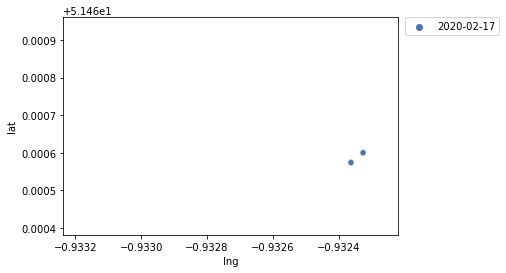

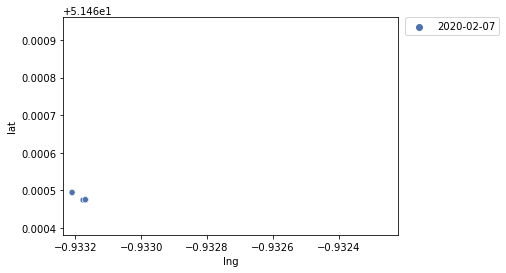

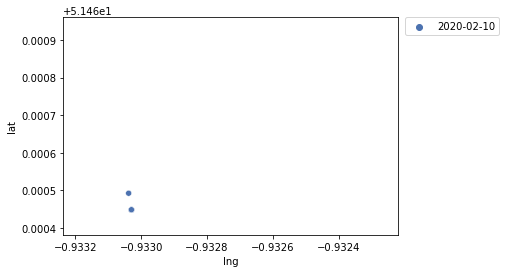

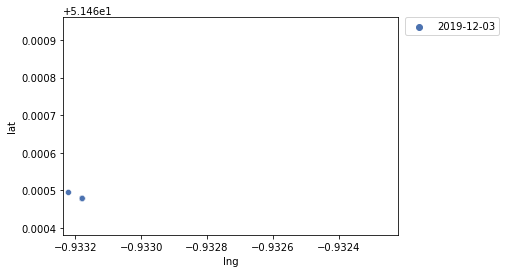

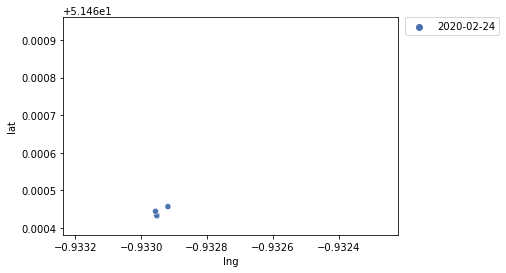

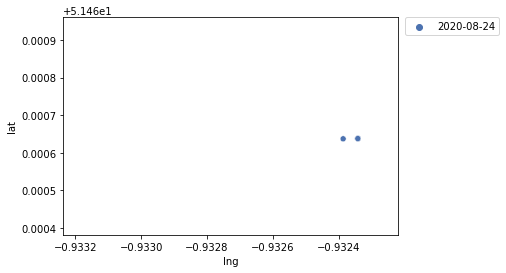

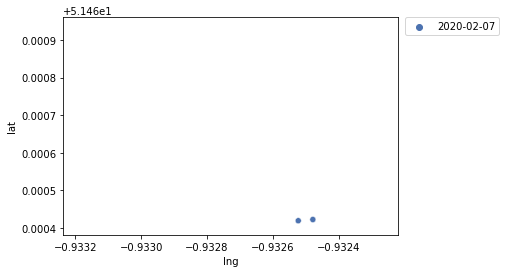

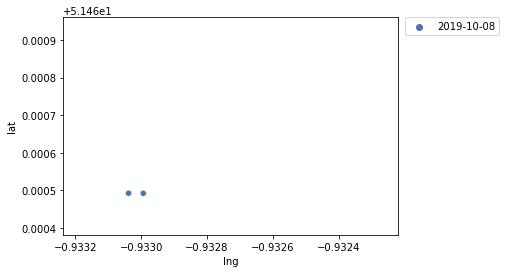

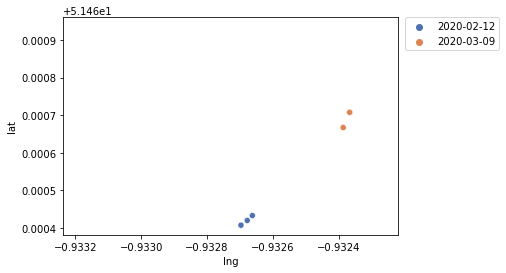

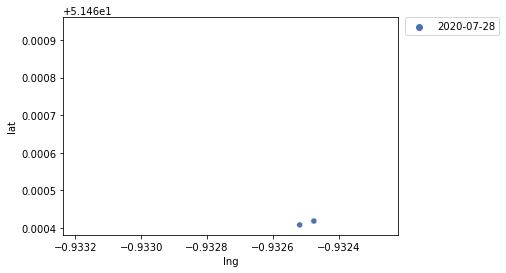

In [34]:
# Assign color for different days
top10_fix = np.array(Fix_device['ClientMacAddr'])[:10]
Fix_device_pattern = df[df['ClientMacAddr'].isin(top10_fix)]

# print(top10_fix)
for i in top10_fix:
    person = df[df['ClientMacAddr'] == i]
    sns.scatterplot(x="lng", y="lat", data=person, hue="date", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

In [35]:
# Create mobile device df
Mobile_device = df_temp[df_temp['Mobile_or_fixed']=='Mobile Device'].sort_values('Distance(Meter)', ascending=False)
print(Mobile_device.shape)
Mobile_device.head()

(4413, 7)


ClientMacAddr  Distance(Meter)  total_day  total_signal  Weekday  \
4823  80:82:23:6c:4e:6c       123.534017          1          2620      1.0   
6562  c0:e8:62:3f:c1:3f       123.287680          1           241      1.0   
8301  d4:d2:52:86:f3:da       122.892808          1          2502      1.0   
1889  48:51:b7:da:25:a0       121.196256          1           668      1.0   
9546  fc:94:35:23:ee:a5       120.327178          1           411      1.0   

      Weekend Mobile_or_fixed  
4823      0.0   Mobile Device  
6562      0.0   Mobile Device  
8301      0.0   Mobile Device  
1889      0.0   Mobile Device  
9546      0.0   Mobile Device

## Filter out mac id that occur in the designed space

In [36]:
df_office = df.query("lat>=51.46086267643394 and lat<=51.46093167542239")
df_office = df_office.query("lng>=-0.93233819710921 and lng<=-0.9322256859342483")
unique_office_mac = df_office["ClientMacAddr"].unique()
len(unique_office_mac)

1330

1279
c0:b6:58:a2:3c:78


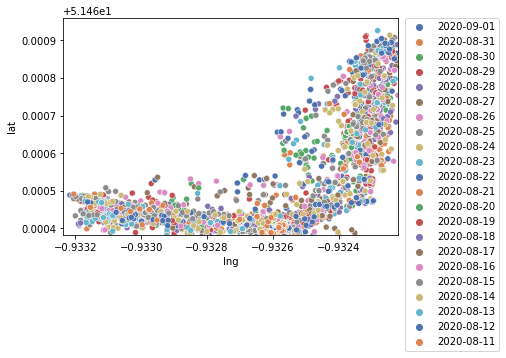

b4:9c:df:63:d2:20


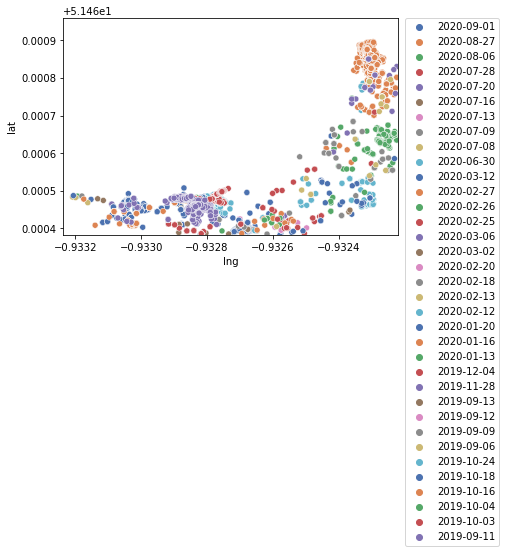

88:66:a5:da:26:f7


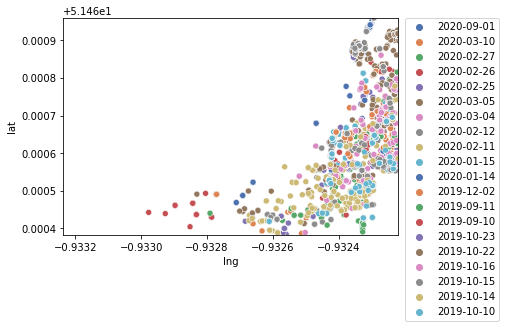

b4:9c:df:31:89:ea


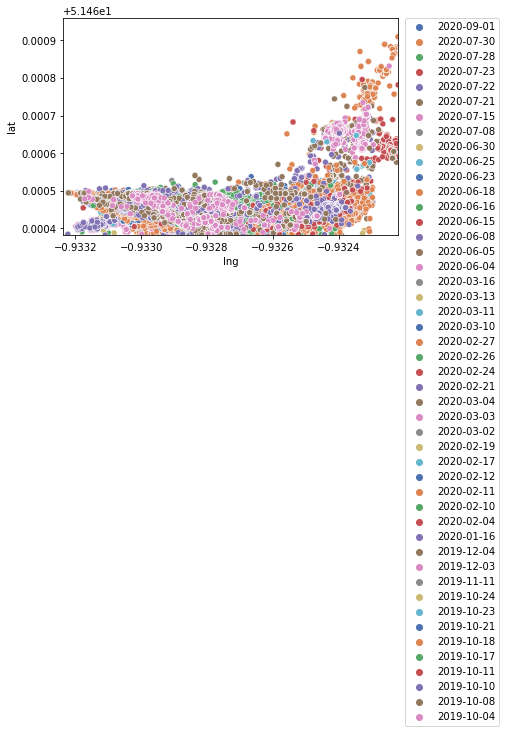

90:61:ae:25:4e:6e


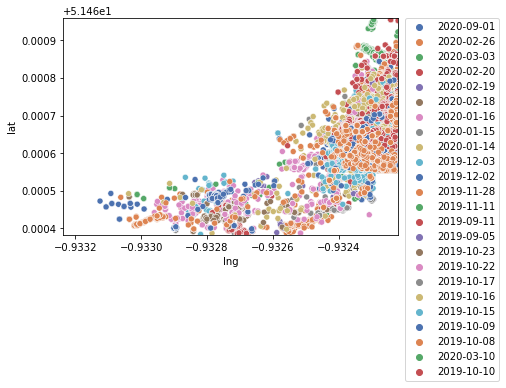

88:66:a5:55:20:94


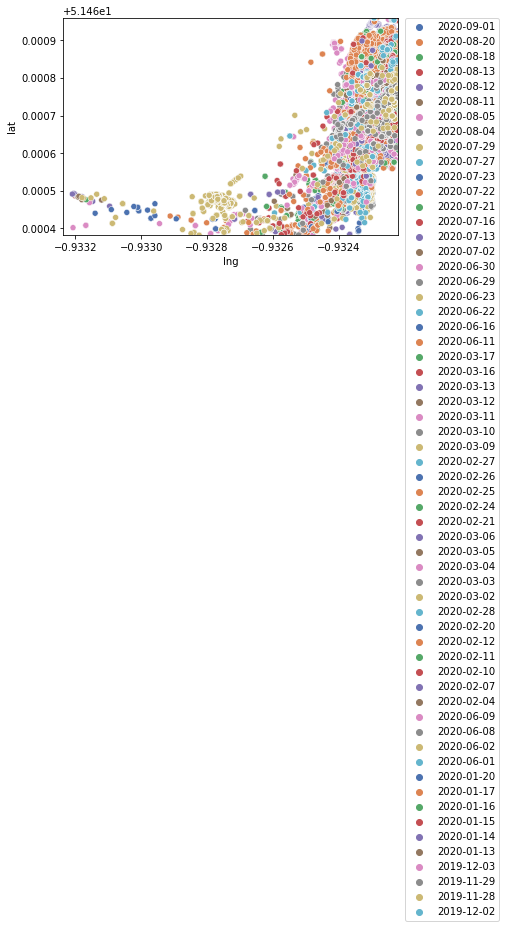

98:10:e8:06:8e:52


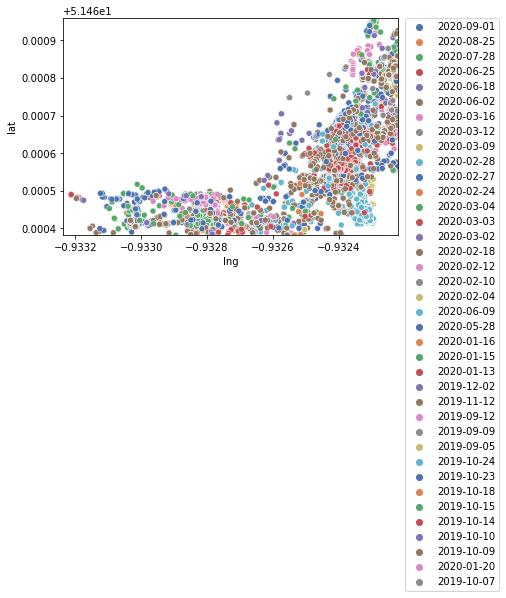

88:66:a5:55:52:f9


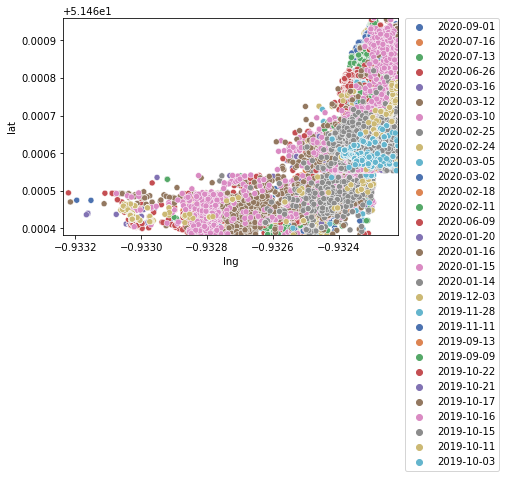

cc:44:63:22:a6:39


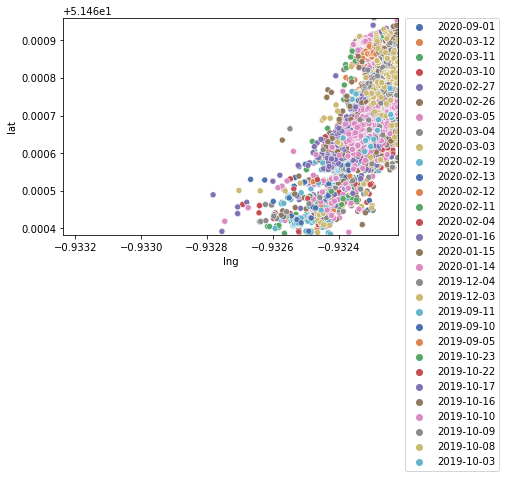

88:66:a5:10:be:cb


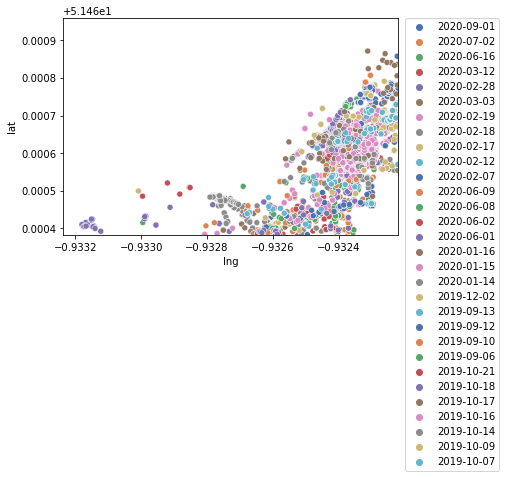

8c:f5:a3:cd:d2:db


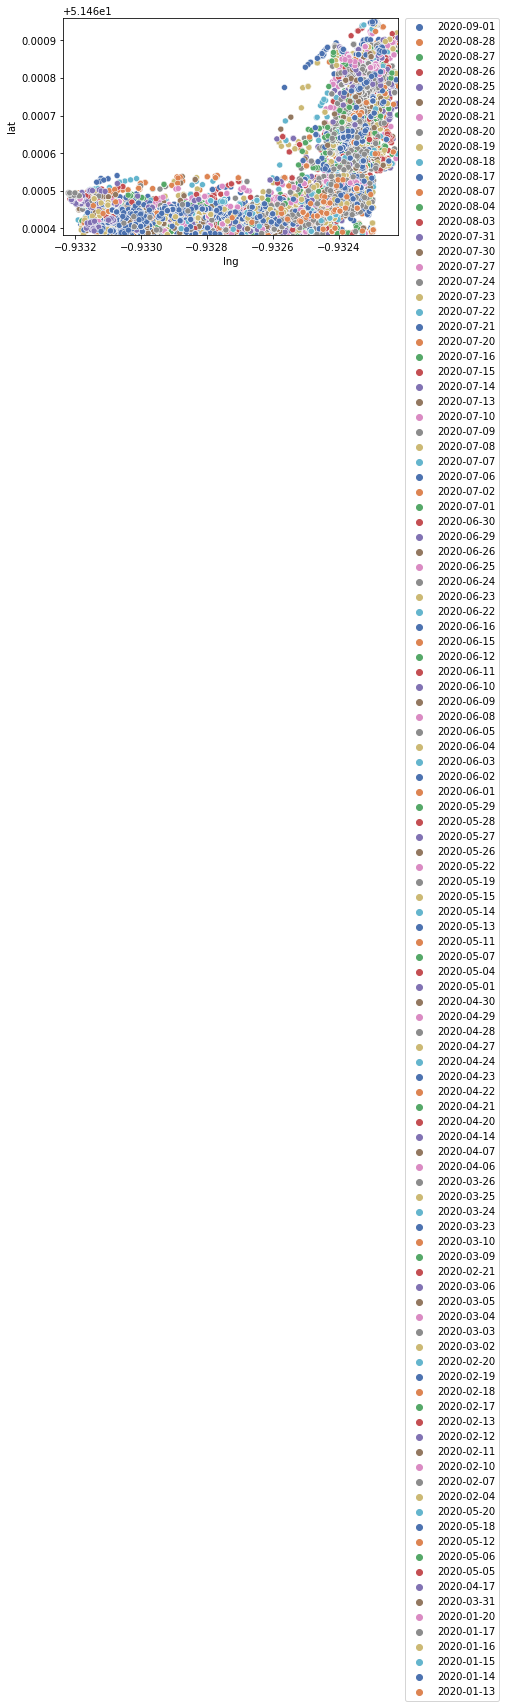

9c:8c:6e:46:0b:7c


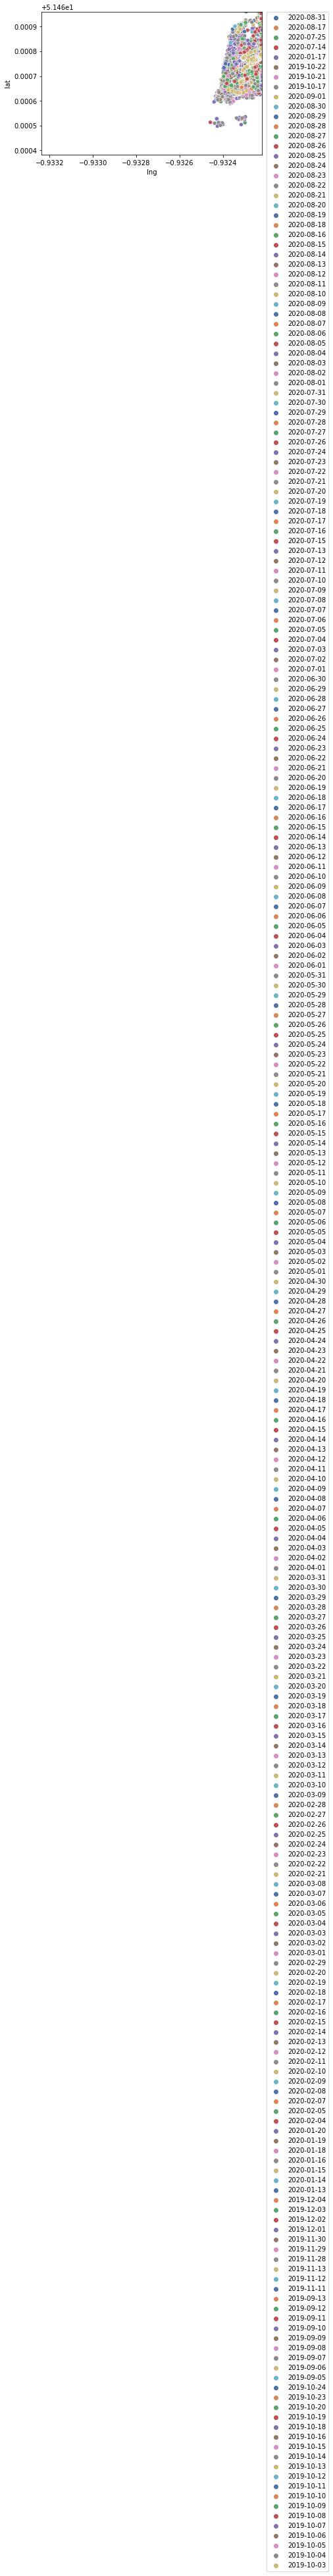

b4:ef:39:c3:4a:2a


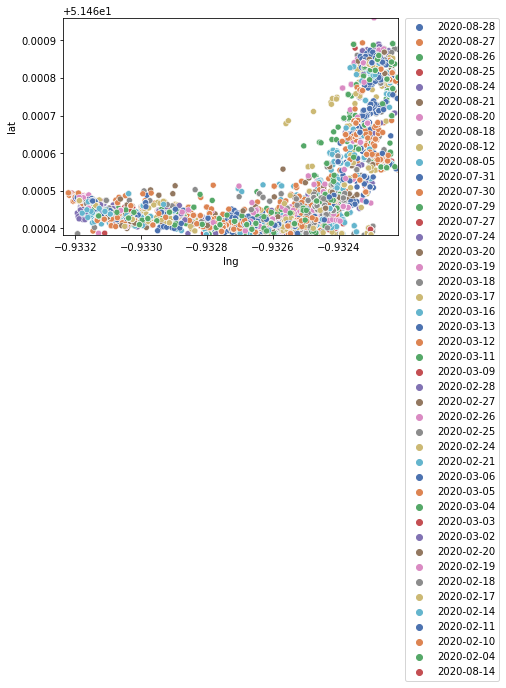

60:e3:ac:be:c5:56


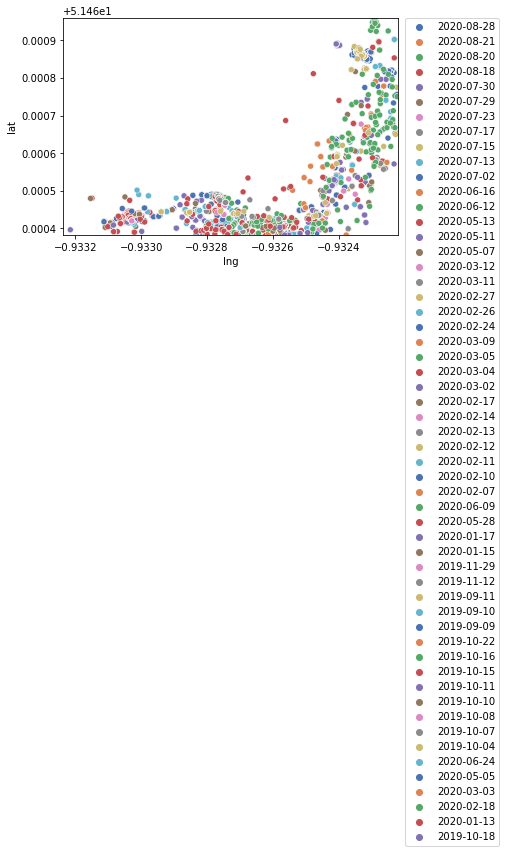

9c:da:3e:80:28:c0


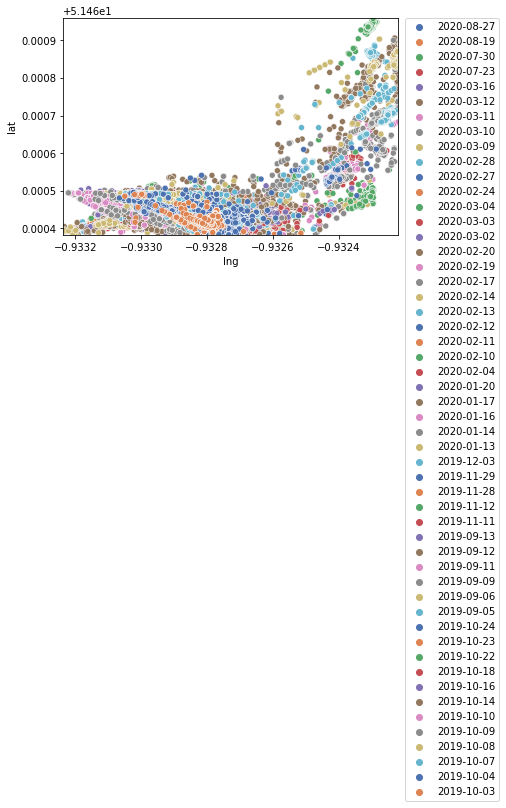

88:66:a5:37:7d:95


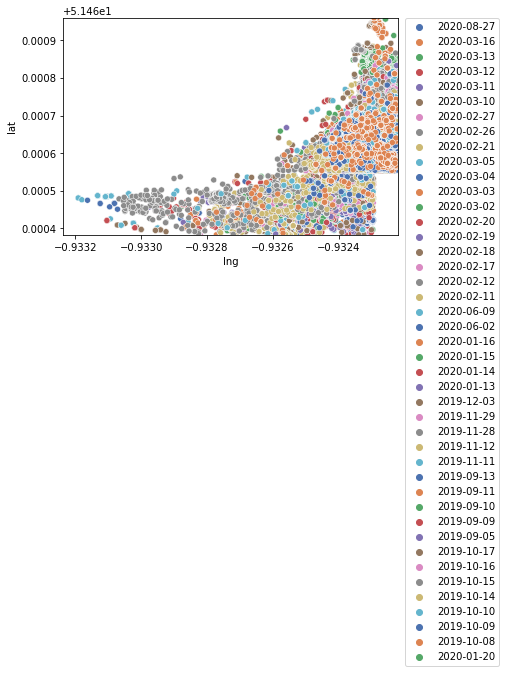

98:10:e8:08:43:ef


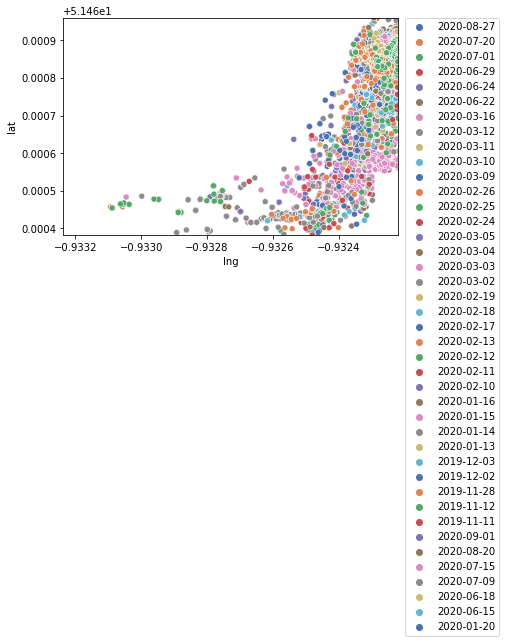

ec:9b:f3:07:70:0c


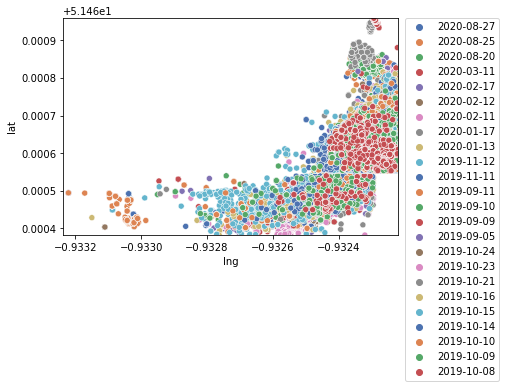

58:e2:8f:c1:61:17


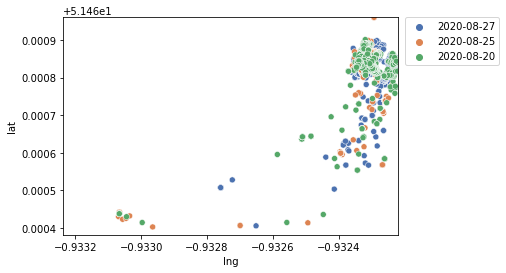

b4:9c:df:14:71:5c


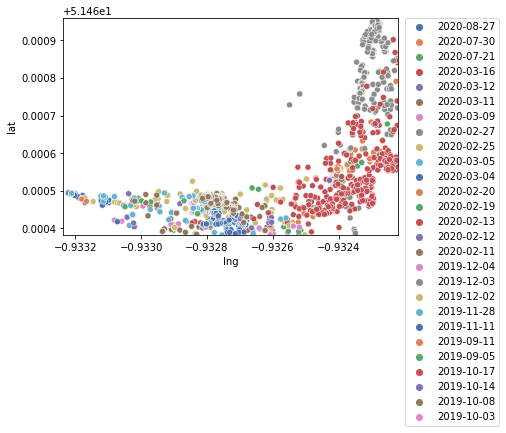

In [37]:
# Select mac id that is mobile, occurs in the designed area, and weekday only
df_office = df[(df['ClientMacAddr'].isin(Mobile_device["ClientMacAddr"])) & 
               (df['ClientMacAddr'].isin(unique_office_mac)) &
               (df['ClientMacAddr'].isin(df_weekday["ClientMacAddr"]))]
print(len(df_office["ClientMacAddr"].unique()))

# Pick only 20 mac id
for i in df_office["ClientMacAddr"].unique()[:20]:
    print(i)
    person = df[df['ClientMacAddr'] == i]
    # Color category by date
    sns.scatterplot(x="lng", y="lat", data=person, hue="date", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

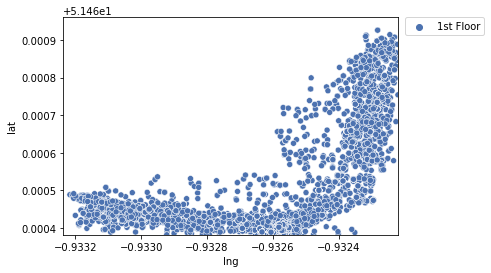

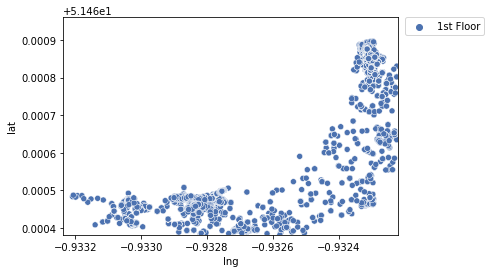

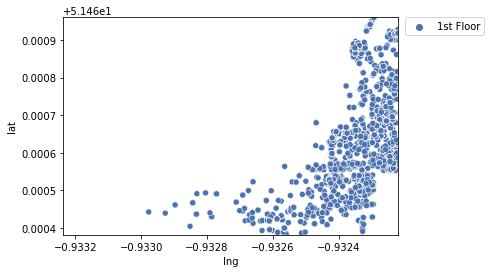

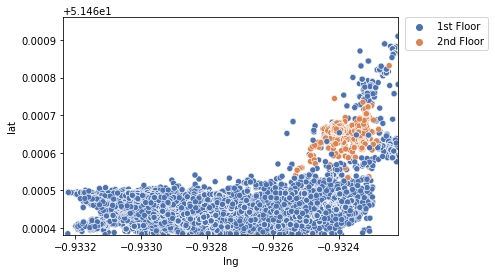

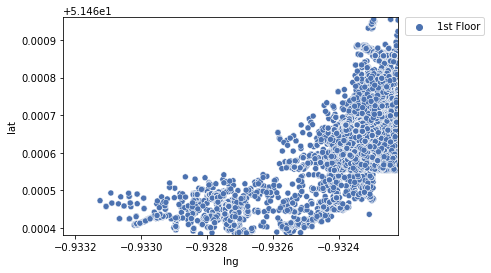

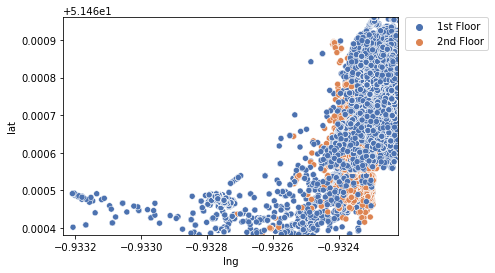

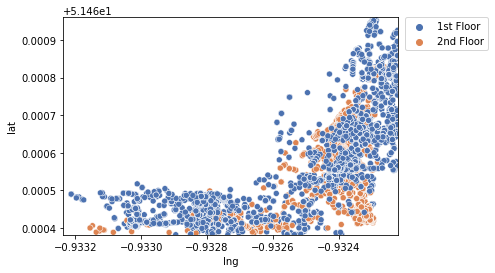

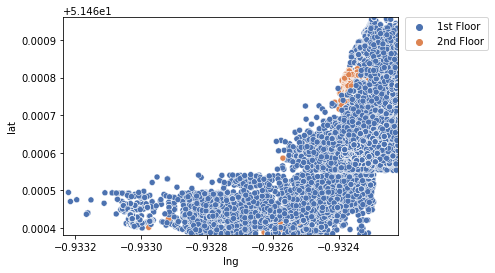

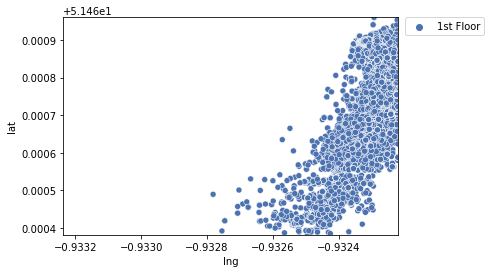

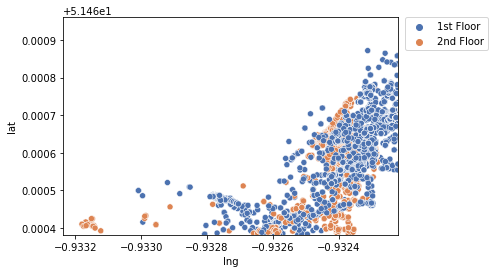

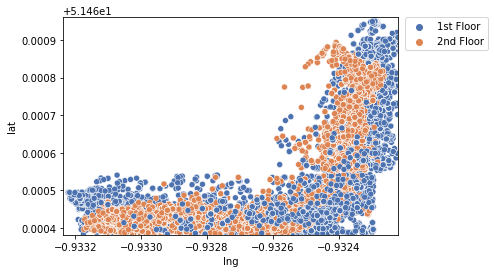

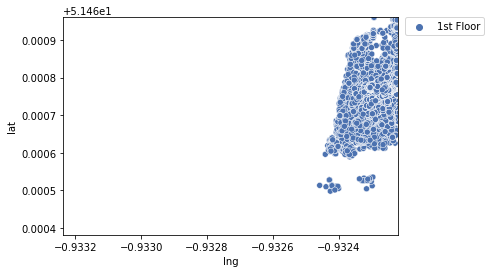

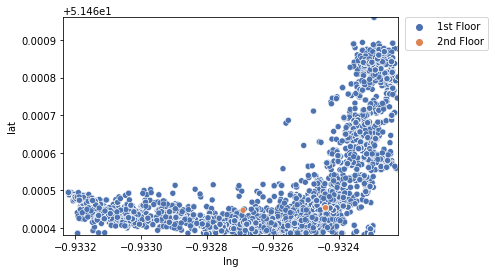

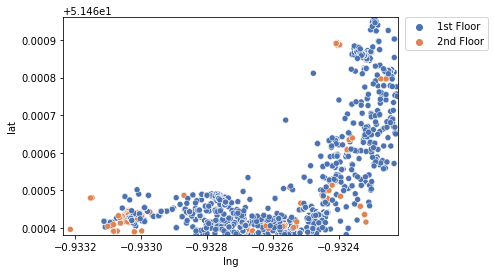

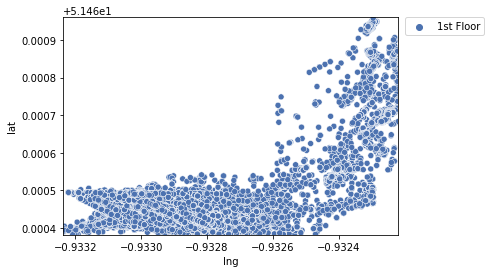

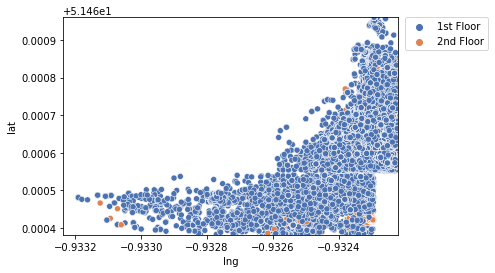

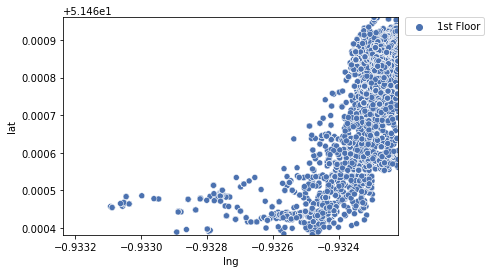

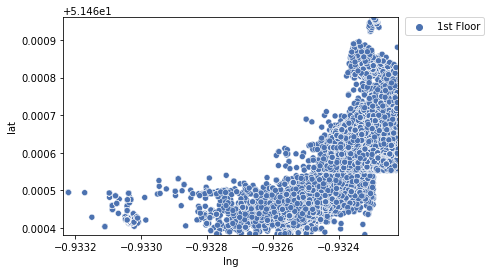

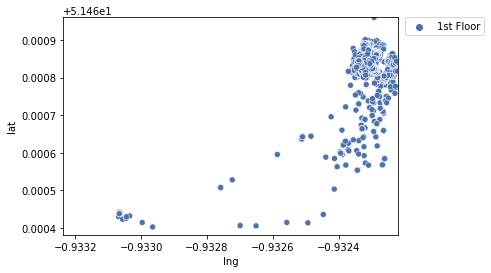

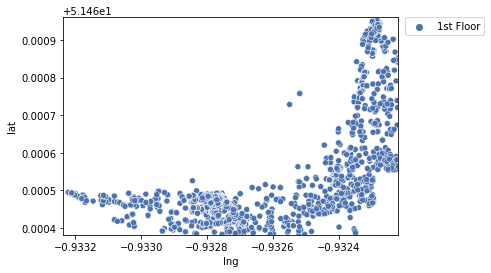

In [38]:
# Plot the category color by level, not date
for i in df_office["ClientMacAddr"].unique()[:20]:
    person = df[df['ClientMacAddr'] == i]
    sns.scatterplot(x="lng", y="lat", data=person, hue="Level", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

In [39]:
# bottom_left_it_office = 51.460829310334326, -0.9325432832801082
# top_right_it_office   = 51.46095700368193, -0.9322479152569846

# bottom_left_engineer_room = 51.46062086895524, -0.9325704089148847
# top_right_engineer_room   = 51.460739173638565, -0.9322961386076987

# bottom_left_entrance = 51.46039535635214, -0.9325788352265879
# top_right_entrance = 51.46050255994146, -0.9323193329736676

# bottom_left_canteen = 51.46042877285531, -0.9332653621565505
# top_right_canteen = 51.46048718462074, -0.9328699790307564

# bottom_left_conference_rooms = 51.46053543776189, -0.9332449815830561
# top_right_conference_rooms = 51.46056005640908, -0.9327219498297091

## Count number of signals that belong to designated areas

In [40]:
## Select only 2nd floor, mobile mac id, and weekday data
df_mobile = df[(df['ClientMacAddr'].isin(Mobile_device["ClientMacAddr"])) & 
               (df['Level'].isin(["2nd Floor"])) &
               (df['ClientMacAddr'].isin(df_weekday["ClientMacAddr"]))]
df_mobile

Site      Level      ClientMacAddr        lat       lng  \
9502669   UK Office  2nd Floor  9c:8c:6e:46:01:f8  51.460444 -0.932935   
9502670   UK Office  2nd Floor  9c:8c:6e:46:01:f8  51.460444 -0.932935   
9502671   UK Office  2nd Floor  9c:8c:6e:46:01:f8  51.460444 -0.932935   
9502672   UK Office  2nd Floor  9c:8c:6e:46:01:f8  51.460444 -0.932935   
9502673   UK Office  2nd Floor  9c:8c:6e:46:01:f8  51.460444 -0.932935   
...             ...        ...                ...        ...       ...   
28601966  UK Office  2nd Floor  bc:b8:63:9f:29:b4  51.460893 -0.932415   
28601967  UK Office  2nd Floor  bc:b8:63:9f:29:b4  51.460893 -0.932415   
28601968  UK Office  2nd Floor  e8:de:27:9f:7f:0c  51.460579 -0.932417   
28601969  UK Office  2nd Floor  9c:8c:6e:46:0c:52  51.460732 -0.932355   
28601970  UK Office  2nd Floor  9c:8c:6e:46:0c:52  51.460732 -0.932355   

                                localtime                  normalized_time  \
9502669  2020-06-10 12:51:24.704000+00:00 2020-06-10 12:51:24.704000+00:00   
9502670  2020-06-10 12:51:19.490000+00:00 2020-06-10 12:51:19.490000+00:00   
9502671  2020-06-10 12:51:09.136000+00:00 2020-06-10 12:51:09.136000+00:00   
9502672  2020-06-10 12:50:56.894000+00:00 2020-06-10 12:50:56.894000+00:00   
9502673  2020-06-10 12:50:48.849000+00:00 2020-06-10 12:50:48.849000+00:00   
...                                   ...                              ...   
28601966 2020-03-20 07:45:14.407000+00:00 2020-03-20 07:45:14.407000+00:00   
28601967 2020-03-20 07:45:08.252000+00:00 2020-03-20 07:45:08.252000+00:00   
28601968 2020-03-20 07:45:05.384000+00:00 2020-03-20 07:45:05.384000+00:00   
28601969 2020-03-20 07:45:05.096000+00:00 2020-03-20 07:45:05.096000+00:00   
28601970 2020-03-20 07:44:59.898000+00:00 2020-03-20 07:44:59.898000+00:00   

                date      time  dayOfWeek  IsWeekend  
9502669   2020-06-10  12:51:24          2      False  
9502670   2020-06-10  12:51:19          2      False  
9502671   2020-06-10  12:51:09          2      False  
9502672   2020-06-10  12:50:56          2      False  
9502673   2020-06-10  12:50:48          2      False  
...              ...       ...        ...        ...  
28601966  2020-03-20  07:45:14          4      False  
28601967  2020-03-20  07:45:08          4      False  
28601968  2020-03-20  07:45:05          4      False  
28601969  2020-03-20  07:45:05          4      False  
28601970  2020-03-20  07:44:59          4      False  

[3090964 rows x 11 columns]

In [41]:
df_mobile['Level'].unique()

array(['2nd Floor'], dtype=object)

In [42]:
df_mobile = df[(df['ClientMacAddr'].isin(Mobile_device["ClientMacAddr"])) & 
               (df['Level'].isin(["2nd Floor"])) &
               (df['ClientMacAddr'].isin(df_weekday["ClientMacAddr"]))]

In [43]:
len(df_mobile['ClientMacAddr'].unique())

221

In [44]:
len(Mobile_device['ClientMacAddr'].unique())

4413

In [45]:
def find_designated_space(lat, lng):
    bottom_left_it_office = (51.46079754688419, -0.932543300159931)
    top_right_it_office   = (51.46098040420442, -0.9322317891150113)

    bottom_left_engineer_room = (51.46053965077327, -0.9325912535330138)
    top_right_engineer_room   = (51.46076277798453, -0.9322830982136779)

    bottom_left_entrance = (51.46030604220702, -0.932772184478665)
    top_right_entrance = (51.46042969133505, -0.9325039535328952)
    
    bottom_left_canteen = (51.46037535823833, -0.933292264577848)
    top_right_canteen = (51.46045878152074, -0.9327547136518658)

    bottom_left_conference_rooms = (51.460503615959965, -0.9332691578318232)
    top_right_conference_rooms = (51.46056710279871, -0.9325986479131928)
    
    bottom_left_training_center = (51.460381264360485, -0.9324809291429241)
    top_right_training_center = (51.46050660159573, -0.9323173144061498)

    
    if lat >= bottom_left_it_office[0] and lat <= top_right_it_office[0] and lng >= bottom_left_it_office[1] and lng <= top_right_it_office[1]:
        designated_space = 'it_office'
    elif lat >= bottom_left_engineer_room[0] and lat <= top_right_engineer_room[0] and lng >= bottom_left_engineer_room[1] and lng <= top_right_engineer_room[1]:
        designated_space = 'engineering_room'
    elif lat >= bottom_left_entrance[0] and lat <= top_right_entrance[0] and lng >= bottom_left_entrance[1] and lng <= top_right_entrance[1]:
        designated_space = 'entrance'
    elif lat >= bottom_left_canteen[0] and lat <= top_right_canteen[0] and lng >= bottom_left_canteen[1] and lng <= top_right_canteen[1]:
        designated_space = 'canteen'
    elif lat >= bottom_left_conference_rooms[0] and lat <= top_right_conference_rooms[0] and lng >= bottom_left_conference_rooms[1] and lng <= top_right_conference_rooms[1]:
        designated_space = 'conference'
    elif lat >= bottom_left_training_center[0] and lat <= top_right_training_center[0] and lng >= bottom_left_training_center[1] and lng <= top_right_training_center[1]:
        designated_space = 'training_center'
    else:
        designated_space = 'not_in_any'
    
    return designated_space

In [46]:
df_mobile['designated_space'] = df_mobile.apply(lambda x: find_designated_space(x['lat'], x['lng']), axis=1)
df_mobile['designated_space'].value_counts()

<ipython-input-46-a368c6c7d359>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mobile['designated_space'] = df_mobile.apply(lambda x: find_designated_space(x['lat'], x['lng']), axis=1)


engineering_room    1147649
canteen              845290
it_office            553008
entrance             389375
not_in_any           137506
training_center       17714
conference              422
Name: designated_space, dtype: int64

In [47]:
len(df_mobile['ClientMacAddr'].unique())

221

In [48]:
######### I modified below parts ############

In [49]:
def choose_max_space(row):
    space_dict = {'canteen': row[2], 'conference': row[3], 'engineering_room': row[4],
                  'entrance': row[5], 'it_office': row[6], 'not_in_any':row[7],
                  'training_center': row[8]}
    max_area_spending = list(dict(sorted(space_dict.items(), key=lambda item: item[1], reverse=True)).keys())
    max_time_spending = list(dict(sorted(space_dict.items(), key=lambda item: item[1], reverse=True)).values())
    if max_time_spending[0] < 0.3:
        print(max_time_spending)
        return 'security_guard'
    else:
        return max_area_spending[0]

In [50]:
df_mobile_space = df_mobile.groupby('ClientMacAddr')['designated_space'].value_counts(normalize=True).unstack().reset_index(drop=False).fillna(0)
print(df_mobile_space.columns)
#df_mobile_space = pd.merge(df_mobile_space, max_space_df, how='left', on = 'ClientMacAddr')
df_mobile_space["max_space"] = [choose_max_space(row) for row in df_mobile_space.itertuples()]
df_mobile_space.tail()

Index(['ClientMacAddr', 'canteen', 'conference', 'engineering_room',
       'entrance', 'it_office', 'not_in_any', 'training_center'],
      dtype='object', name='designated_space')
[0.2896551724137931, 0.2896551724137931, 0.2206896551724138, 0.07586206896551724, 0.07586206896551724, 0.034482758620689655, 0.013793103448275862]
[0.2866385648465837, 0.2418390353886874, 0.1871385158317812, 0.17949220664640722, 0.06019017743358494, 0.04117243407509068, 0.0035290657778649153]
[0.2958612975391499, 0.2516778523489933, 0.220917225950783, 0.16554809843400448, 0.03859060402684564, 0.01621923937360179, 0.011185682326621925]
[0.26171333518159134, 0.24563349043526475, 0.16883836983642916, 0.1377876351538675, 0.12420293873024674, 0.061546991960077624, 0.0002772387025228722]
[0.2608695652173913, 0.2484472049689441, 0.2422360248447205, 0.16149068322981366, 0.08074534161490683, 0.006211180124223602, 0.0]
[0.29546436285097194, 0.2306695464362851, 0.17624190064794817, 0.17451403887688985, 0.0850971922246

designated_space      ClientMacAddr   canteen  conference  engineering_room  \
216               f0:76:6f:79:ea:44  0.112299         0.0          0.254902   
217               f4:5c:89:db:fb:7f  0.000000         0.0          0.000000   
218               f8:2d:7c:dc:dc:b8  1.000000         0.0          0.000000   
219               f8:38:80:b0:03:6e  0.023367         0.0          0.887414   
220               f8:6f:c1:55:df:db  0.000000         0.0          0.142857   

designated_space  entrance  it_office  not_in_any  training_center  \
216               0.367201   0.108734    0.076649         0.080214   
217               1.000000   0.000000    0.000000         0.000000   
218               0.000000   0.000000    0.000000         0.000000   
219               0.037706   0.000000    0.039033         0.012480   
220               0.857143   0.000000    0.000000         0.000000   

designated_space         max_space  
216                       entrance  
217                       entrance  
218                        canteen  
219               engineering_room  
220                       entrance

In [51]:
df_mobile_space['max_space'].value_counts()

engineering_room    90
entrance            38
not_in_any          30
canteen             29
it_office           23
security_guard       6
training_center      3
conference           2
Name: max_space, dtype: int64

00:08:22:e0:ba:fb
designated_space
ClientMacAddr       00:08:22:e0:ba:fb
canteen                           0.0
conference                        0.0
engineering_room                  0.0
entrance                          1.0
it_office                         0.0
not_in_any                        0.0
training_center                   0.0
max_space                    entrance
Name: 0, dtype: object


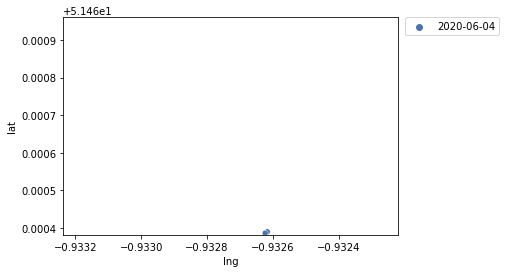

00:10:20:ce:df:1d
designated_space
ClientMacAddr       00:10:20:ce:df:1d
canteen                           1.0
conference                        0.0
engineering_room                  0.0
entrance                          0.0
it_office                         0.0
not_in_any                        0.0
training_center                   0.0
max_space                     canteen
Name: 1, dtype: object


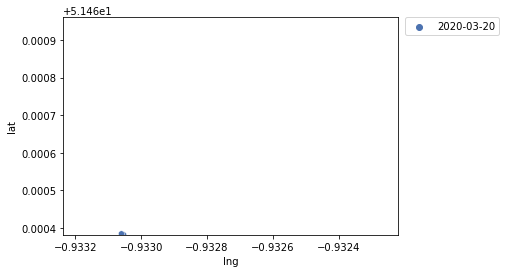

00:10:40:b9:bb:0b
designated_space
ClientMacAddr       00:10:40:b9:bb:0b
canteen                           1.0
conference                        0.0
engineering_room                  0.0
entrance                          0.0
it_office                         0.0
not_in_any                        0.0
training_center                   0.0
max_space                     canteen
Name: 2, dtype: object


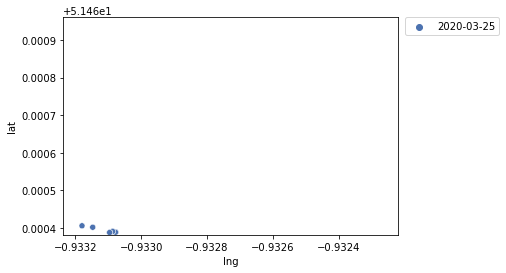

00:10:40:b9:bf:aa
designated_space
ClientMacAddr       00:10:40:b9:bf:aa
canteen                      0.333333
conference                        0.0
engineering_room             0.151515
entrance                     0.212121
it_office                    0.090909
not_in_any                   0.181818
training_center              0.030303
max_space                     canteen
Name: 3, dtype: object


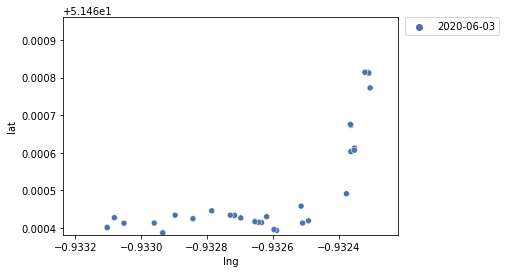

00:23:a7:e5:84:78
designated_space
ClientMacAddr       00:23:a7:e5:84:78
canteen                      0.559701
conference                        0.0
engineering_room                  0.0
entrance                     0.440299
it_office                         0.0
not_in_any                        0.0
training_center                   0.0
max_space                     canteen
Name: 4, dtype: object


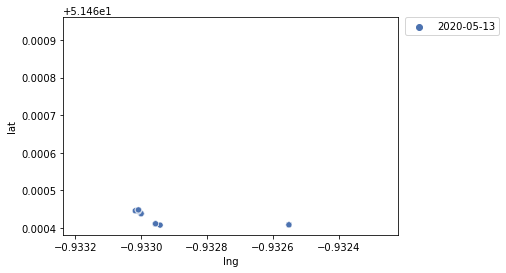

00:80:92:df:7b:97
designated_space
ClientMacAddr       00:80:92:df:7b:97
canteen                           0.0
conference                        0.0
engineering_room                  0.0
entrance                          0.0
it_office                         0.0
not_in_any                        1.0
training_center                   0.0
max_space                  not_in_any
Name: 5, dtype: object


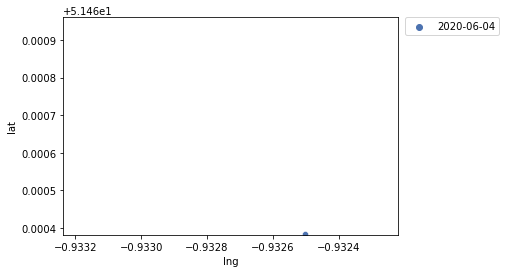

00:c2:c6:f9:2f:9f
designated_space
ClientMacAddr       00:c2:c6:f9:2f:9f
canteen                           0.0
conference                        0.0
engineering_room                  0.0
entrance                          1.0
it_office                         0.0
not_in_any                        0.0
training_center                   0.0
max_space                    entrance
Name: 6, dtype: object


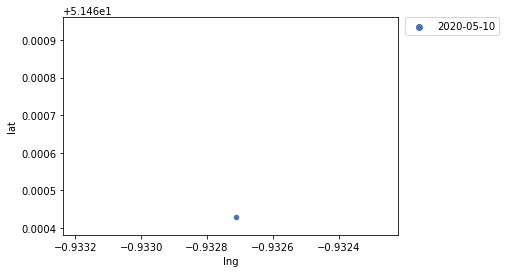

00:e1:8c:d6:86:7f
designated_space
ClientMacAddr       00:e1:8c:d6:86:7f
canteen                           0.0
conference                        0.0
engineering_room                  0.0
entrance                          1.0
it_office                         0.0
not_in_any                        0.0
training_center                   0.0
max_space                    entrance
Name: 7, dtype: object


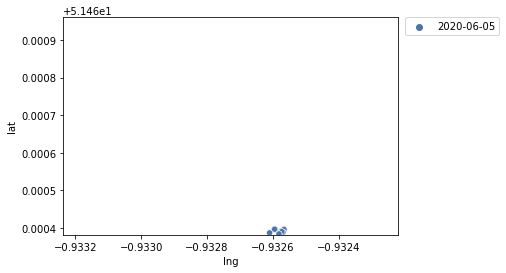

00:e1:93:2c:cc:9f
designated_space
ClientMacAddr       00:e1:93:2c:cc:9f
canteen                           0.0
conference                        0.0
engineering_room             0.980384
entrance                     0.002504
it_office                    0.000417
not_in_any                   0.006678
training_center              0.010017
max_space            engineering_room
Name: 8, dtype: object


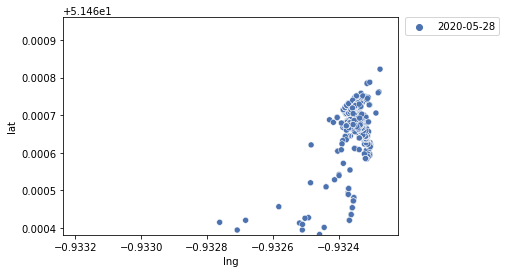

04:72:95:ba:6d:af
designated_space
ClientMacAddr       04:72:95:ba:6d:af
canteen                      0.105263
conference                        0.0
engineering_room             0.003008
entrance                     0.873684
it_office                         0.0
not_in_any                   0.018045
training_center                   0.0
max_space                    entrance
Name: 9, dtype: object


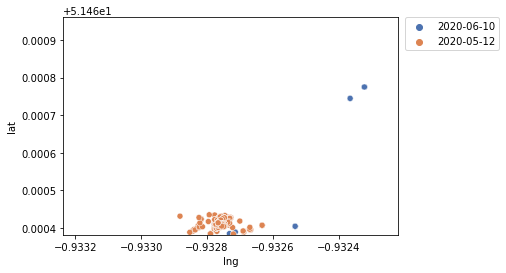

In [52]:
## plot the data with associated space
ind = 0
for i in df_mobile_space["ClientMacAddr"].unique()[:10]:
    print(i)
    #print('Designated space: {}'.format(df_mobile_space.loc[ind,:]))
    print(df_mobile_space.loc[ind,:])
    ind += 1
    # plot machinary colored by date
    data=df[(df['ClientMacAddr'] == i) & (df['Level'] == '2nd Floor')]
    #print(data.head())
    sns.scatterplot(x="lng", y="lat", data=data
                    , hue="date", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

In [53]:
df_mobile_space.head()

designated_space      ClientMacAddr   canteen  conference  engineering_room  \
0                 00:08:22:e0:ba:fb  0.000000         0.0          0.000000   
1                 00:10:20:ce:df:1d  1.000000         0.0          0.000000   
2                 00:10:40:b9:bb:0b  1.000000         0.0          0.000000   
3                 00:10:40:b9:bf:aa  0.333333         0.0          0.151515   
4                 00:23:a7:e5:84:78  0.559701         0.0          0.000000   

designated_space  entrance  it_office  not_in_any  training_center max_space  
0                 1.000000   0.000000    0.000000         0.000000  entrance  
1                 0.000000   0.000000    0.000000         0.000000   canteen  
2                 0.000000   0.000000    0.000000         0.000000   canteen  
3                 0.212121   0.090909    0.181818         0.030303   canteen  
4                 0.440299   0.000000    0.000000         0.000000   canteen

## Mobile device
- **Canteen workers  --> canteen && 2nd floor && weekday**
- **Engineers --> engineering_room && 2nd floor only && weekday**
- **IT Technicians --> it_office && 2nd floor only && weekday**
- Visitors --> **come less than 5 days && spend most time at conference rooms and training center && weekday**
- Intruders --> come at night only (between 10 PM. - 5 am.) both weekday and weekend
- Security Guards --> **stay mostly at the entrance** || come during day and night time || **no specific place to stay (max_designated_space_percentage < 0.3)** 
- Machine Operators --> close to the machines/ 1st floor layout
- Vehicles --> move around the machines

## Fixed device
- **Machinery** --> 1st floor && Meters < 5m && occurence of days > 5 days
- Printers --> 2nd floor && Meters < 5m && occurence of days > 5 days

In [54]:
# Create new column using dictionary
designated_space_mapping_dict = { 
             "canteen":"canteen_worker",
             "engineering_room":"engineer",
             "it_office":"IT_technician",
             "entrance":"security_guard",
             "conference": "engineer",
             "training_center": "visitor",
             "security_guard": "security_guard",
             "not_in_any": "visitor"
           }
  
# combine this new data with existing DataFrame
df_mobile_space["job_function"] = df_mobile_space["max_space"].map(designated_space_mapping_dict)

In [55]:
print(df_mobile_space['job_function'].value_counts(dropna=False))
df_mobile_space

engineer          92
security_guard    44
visitor           33
canteen_worker    29
IT_technician     23
Name: job_function, dtype: int64


designated_space      ClientMacAddr   canteen  conference  engineering_room  \
0                 00:08:22:e0:ba:fb  0.000000         0.0          0.000000   
1                 00:10:20:ce:df:1d  1.000000         0.0          0.000000   
2                 00:10:40:b9:bb:0b  1.000000         0.0          0.000000   
3                 00:10:40:b9:bf:aa  0.333333         0.0          0.151515   
4                 00:23:a7:e5:84:78  0.559701         0.0          0.000000   
..                              ...       ...         ...               ...   
216               f0:76:6f:79:ea:44  0.112299         0.0          0.254902   
217               f4:5c:89:db:fb:7f  0.000000         0.0          0.000000   
218               f8:2d:7c:dc:dc:b8  1.000000         0.0          0.000000   
219               f8:38:80:b0:03:6e  0.023367         0.0          0.887414   
220               f8:6f:c1:55:df:db  0.000000         0.0          0.142857   

designated_space  entrance  it_office  not_in_any  training_center  \
0                 1.000000   0.000000    0.000000         0.000000   
1                 0.000000   0.000000    0.000000         0.000000   
2                 0.000000   0.000000    0.000000         0.000000   
3                 0.212121   0.090909    0.181818         0.030303   
4                 0.440299   0.000000    0.000000         0.000000   
..                     ...        ...         ...              ...   
216               0.367201   0.108734    0.076649         0.080214   
217               1.000000   0.000000    0.000000         0.000000   
218               0.000000   0.000000    0.000000         0.000000   
219               0.037706   0.000000    0.039033         0.012480   
220               0.857143   0.000000    0.000000         0.000000   

designated_space         max_space    job_function  
0                         entrance  security_guard  
1                          canteen  canteen_worker  
2                          canteen  canteen_worker  
3                          canteen  canteen_worker  
4                          canteen  canteen_worker  
..                             ...             ...  
216                       entrance  security_guard  
217                       entrance  security_guard  
218                        canteen  canteen_worker  
219               engineering_room        engineer  
220                       entrance  security_guard  

[221 rows x 10 columns]

In [56]:
len(df_mobile_space['ClientMacAddr'].unique())

221

In [57]:
print(df_mobile_space['max_space'].value_counts(dropna=False))

engineering_room    90
entrance            38
not_in_any          30
canteen             29
it_office           23
security_guard       6
training_center      3
conference           2
Name: max_space, dtype: int64


In [58]:
print(df_mobile_space['job_function'].value_counts(dropna=False))

engineer          92
security_guard    44
visitor           33
canteen_worker    29
IT_technician     23
Name: job_function, dtype: int64


In [59]:
Mobile_device = Mobile_device.merge(df_mobile_space[['ClientMacAddr','job_function']], on='ClientMacAddr', how='left').fillna("undefined_job_function")
Mobile_device.tail(30)

ClientMacAddr  Distance(Meter)  total_day  total_signal  Weekday  \
4383  00:0c:e7:d9:24:39         5.158421          1            13      1.0   
4384  30:07:4d:49:75:6a         5.152073          1            16      1.0   
4385  80:58:f8:e9:ac:5e         5.149083          1            13      1.0   
4386  98:10:e8:07:df:86         5.140532          2            32      2.0   
4387  80:58:f8:84:fd:65         5.128105          1            13      1.0   
4388  80:58:f8:db:0e:0a         5.123319          1            12      1.0   
4389  38:80:df:c2:75:42         5.122681          1            13      1.0   
4390  d0:77:14:85:3a:d8         5.114378          1            13      1.0   
4391  80:58:f8:ee:a0:d3         5.104535          1            14      1.0   
4392  80:58:f8:1f:3f:5f         5.103973          1             7      1.0   
4393  e4:04:39:68:c5:c0         5.103090          5            42      5.0   
4394  d0:77:14:df:d3:a0         5.087760          1            12      1.0   
4395  cc:c0:79:0b:9a:2a         5.079408         46         16556     28.0   
4396  80:58:f8:d0:f0:10         5.077203          1            13      1.0   
4397  00:e1:8c:d6:86:7f         5.073961          1            30      1.0   
4398  80:58:f8:ce:93:8f         5.054298          1            14      1.0   
4399  00:0c:e7:25:3e:8c         5.052467          1            13      1.0   
4400  18:21:95:62:53:94         5.048310          1            11      1.0   
4401  d0:77:14:95:98:67         5.046683          1            14      1.0   
4402  80:58:f8:35:9d:bd         5.046683          1            14      1.0   
4403  d0:77:14:11:4c:7d         5.046553          1            13      1.0   
4404  80:58:f8:00:9f:f6         5.044044          1            13      1.0   
4405  7c:b2:7d:87:d8:c7         5.042453          2           224      2.0   
4406  08:cc:27:32:56:dc         5.040452          1            14      1.0   
4407  80:58:f8:a8:91:7a         5.035022          1             2      1.0   
4408  00:0c:e7:66:3f:57         5.029300          1            14      1.0   
4409  a4:c3:f0:a5:f1:27         5.027636          1             4      1.0   
4410  f4:f5:24:cb:7f:fa         5.024890          2            20      2.0   
4411  d0:77:14:8d:dc:a3         5.017370          1            13      1.0   
4412  f4:f5:24:21:2e:a9         5.004640          1            13      1.0   

      Weekend Mobile_or_fixed            job_function  
4383      0.0   Mobile Device  undefined_job_function  
4384      0.0   Mobile Device  undefined_job_function  
4385      0.0   Mobile Device  undefined_job_function  
4386      0.0   Mobile Device  undefined_job_function  
4387      0.0   Mobile Device  undefined_job_function  
4388      0.0   Mobile Device  undefined_job_function  
4389      0.0   Mobile Device  undefined_job_function  
4390      0.0   Mobile Device  undefined_job_function  
4391      0.0   Mobile Device  undefined_job_function  
4392      0.0   Mobile Device  undefined_job_function  
4393      0.0   Mobile Device  undefined_job_function  
4394      0.0   Mobile Device  undefined_job_function  
4395     18.0   Mobile Device          canteen_worker  
4396      0.0   Mobile Device  undefined_job_function  
4397      0.0   Mobile Device          security_guard  
4398      0.0   Mobile Device  undefined_job_function  
4399      0.0   Mobile Device  undefined_job_function  
4400      0.0   Mobile Device  undefined_job_function  
4401      0.0   Mobile Device  undefined_job_function  
4402      0.0   Mobile Device  undefined_job_function  
4403      0.0   Mobile Device  undefined_job_function  
4404      0.0   Mobile Device  undefined_job_function  
4405      0.0   Mobile Device  undefined_job_function  
4406      0.0   Mobile Device          canteen_worker  
4407      0.0   Mobile Device  undefined_job_function  
4408      0.0   Mobile Device  undefined_job_function  
4409      0.0   Mobile Device  undefined_job_function  
4410      0.0   Mobile 

In [60]:
Mobile_device['job_function'].value_counts(dropna=False)

undefined_job_function    4192
engineer                    92
security_guard              44
visitor                     33
canteen_worker              29
IT_technician               23
Name: job_function, dtype: int64

In [61]:
############### End of changes #######################

# Plot machinary

In [62]:
Fix_device.head()

ClientMacAddr  Distance(Meter)  total_day  total_signal  Weekday  \
4452  80:58:f8:cc:10:67         4.997148          1            13      1.0   
7520  d0:77:14:7f:b9:2c         4.988431          1            13      1.0   
3800  80:58:f8:70:0f:66         4.977924          1            13      1.0   
7446  d0:77:14:74:85:9d         4.975688          1            13      1.0   
8218  d0:77:14:ff:47:71         4.960126          1            14      1.0   

      Weekend Mobile_or_fixed  
4452      0.0    Fixed Device  
7520      0.0    Fixed Device  
3800      0.0    Fixed Device  
7446      0.0    Fixed Device  
8218      0.0    Fixed Device

In [63]:
Fix_device.shape

(4812, 7)

In [64]:
machinery_df = Fix_device.loc[Fix_device["total_day"] > 5, :]
print(machinery_df.shape)
machinery_df

(97, 7)


ClientMacAddr  Distance(Meter)  total_day  total_signal  Weekday  \
9531  fc:62:b9:23:ea:05         4.902584          6           110      6.0   
8771  f4:c2:48:57:c9:77         4.773229         20           664     20.0   
2555  64:6e:69:d9:fc:8b         4.748308         16            98     10.0   
2095  58:c5:cb:43:31:99         4.661337          6           158      6.0   
819   14:d1:69:bf:67:0d         4.623590          6           223      6.0   
...                 ...              ...        ...           ...      ...   
2432  5c:e0:c5:ad:af:f2         0.016285         10           183     10.0   
8324  d8:68:c3:a3:80:91         0.000000          8           115      8.0   
1959  48:bf:6b:1f:5e:fd         0.000000          8           112      8.0   
875   1c:5c:f2:f3:7a:fd         0.000000          7            27      7.0   
5723  9c:b6:d0:e2:75:ed         0.000000          9           131      9.0   

      Weekend Mobile_or_fixed  
9531      0.0    Fixed Device  
8771      0.0    Fixed Device  
2555      6.0    Fixed Device  
2095      0.0    Fixed Device  
819       0.0    Fixed Device  
...       ...             ...  
2432      0.0    Fixed Device  
8324      0.0    Fixed Device  
1959      0.0    Fixed Device  
875       0.0    Fixed Device  
5723      0.0    Fixed Device  

[97 rows x 7 columns]

fc:62:b9:23:ea:05


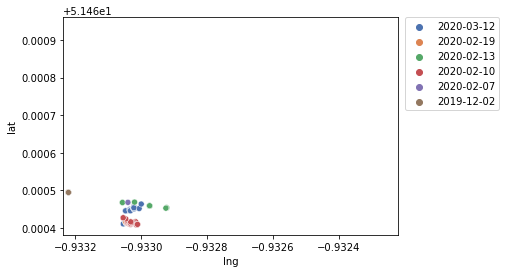

f4:c2:48:57:c9:77


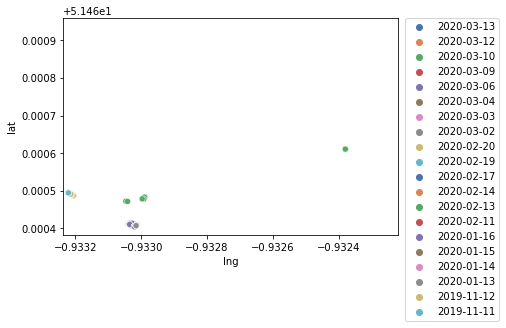

64:6e:69:d9:fc:8b


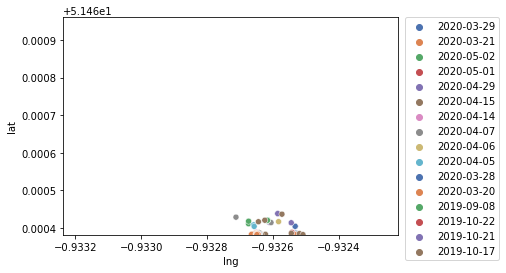

58:c5:cb:43:31:99


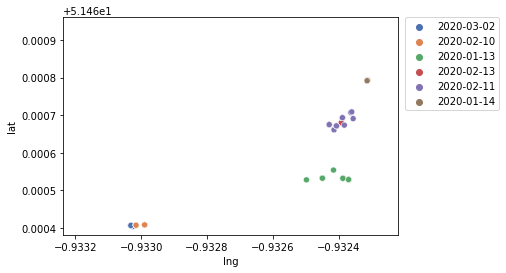

14:d1:69:bf:67:0d


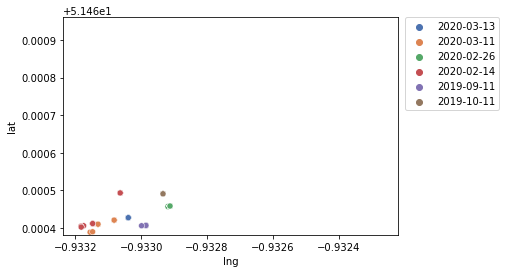

58:d9:c3:9d:67:e1


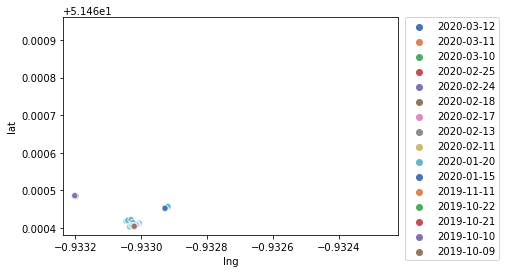

fc:62:b9:70:33:fa


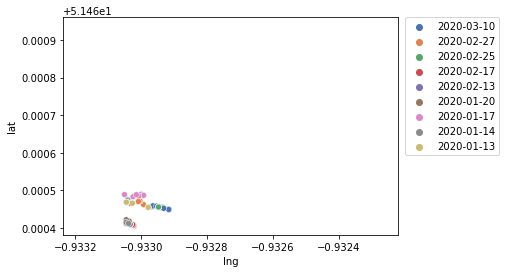

3c:cd:36:ee:71:7d


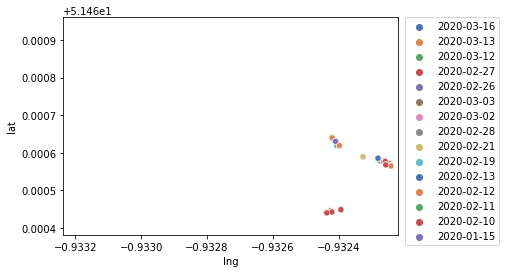

00:0b:82:d0:ff:35


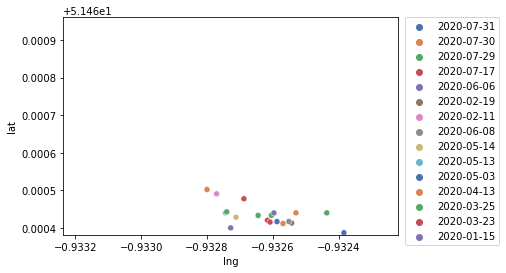

b0:6f:e0:fe:07:08


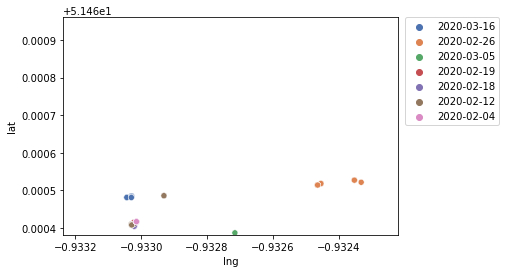

f8:34:41:e5:d0:99


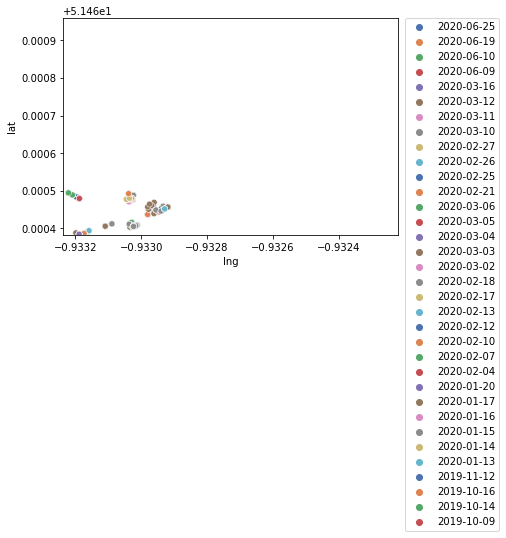

6c:96:cf:6a:d1:cc


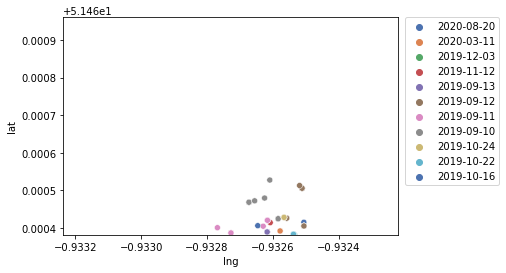

38:9d:92:eb:de:a3


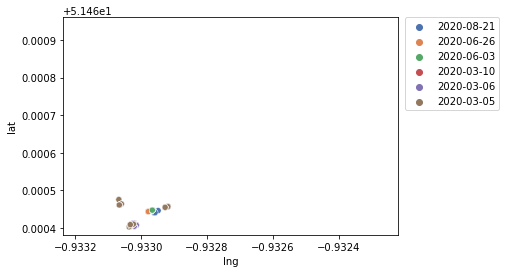

18:5e:0f:ec:f0:a9


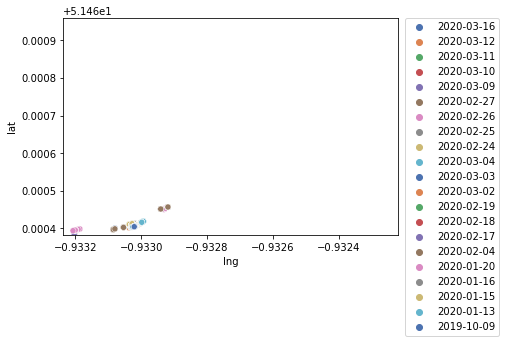

c0:e8:62:91:89:de


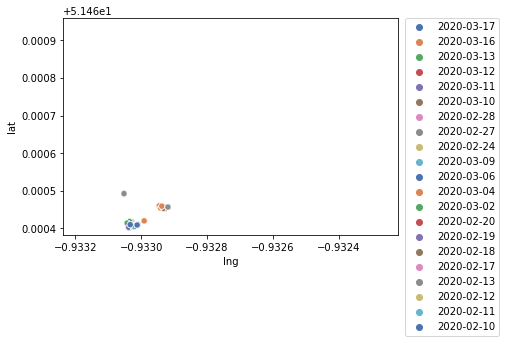

5c:5f:67:a4:eb:29


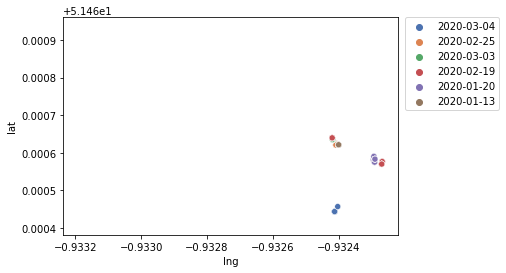

3c:01:ef:05:69:75


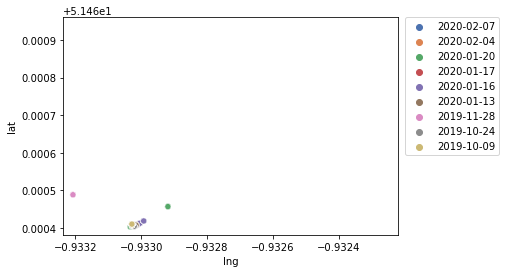

5c:ca:1a:a9:78:40


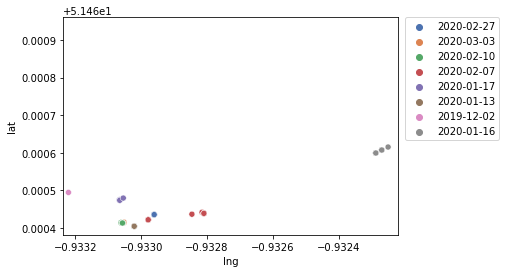

04:ea:56:92:f9:9b


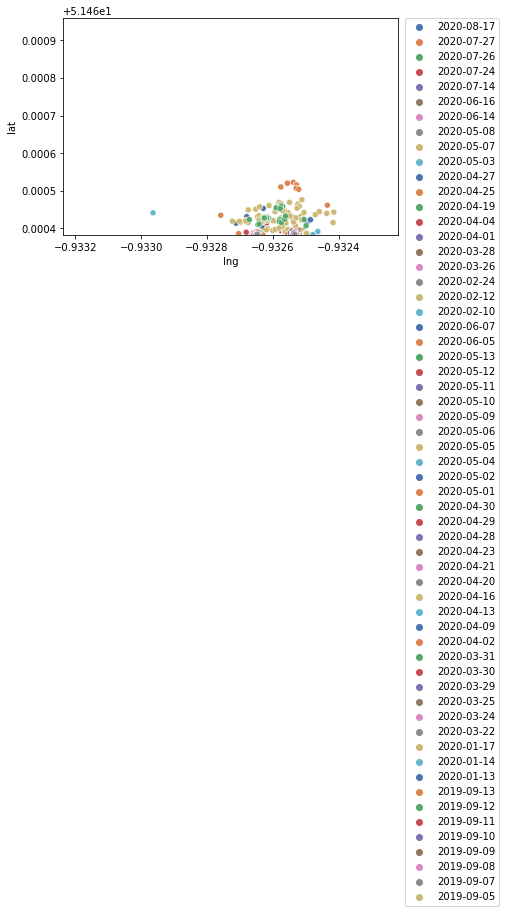

9c:b6:d0:e2:71:b5


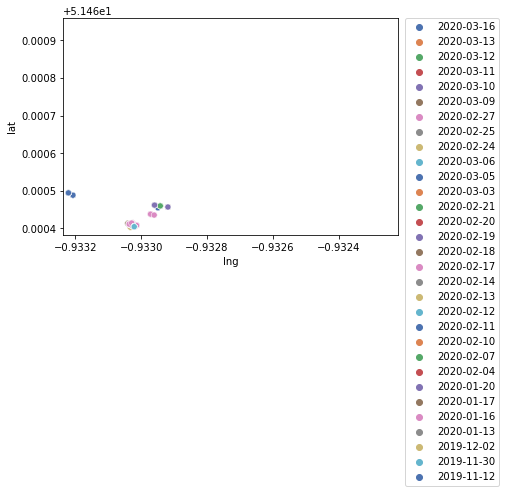

8c:f5:a3:de:63:25


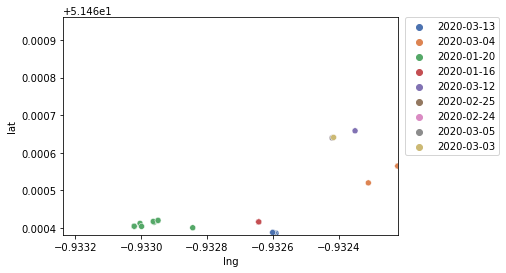

f4:8c:50:62:11:cd


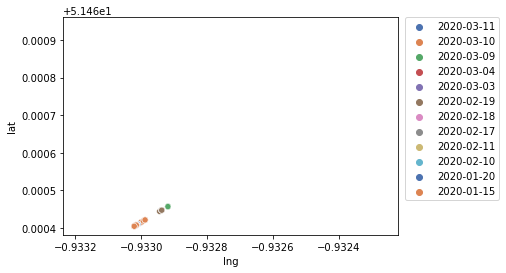

e0:94:67:be:5b:68


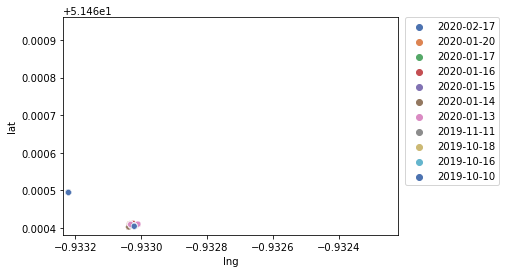

28:3a:4d:8e:4f:5f


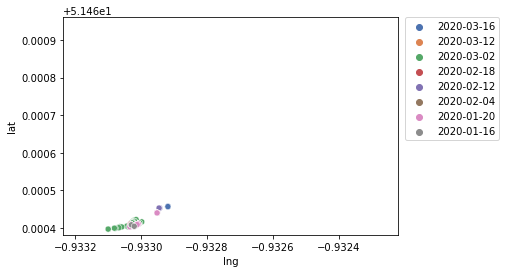

a0:a4:c5:98:73:94


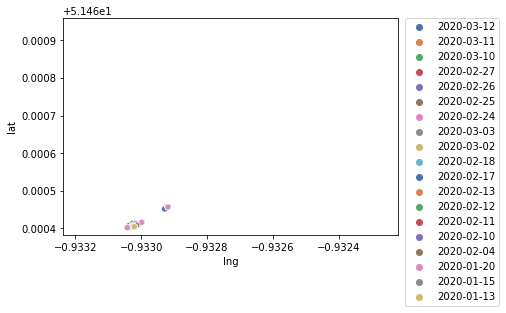

f8:4e:73:ec:f6:8a


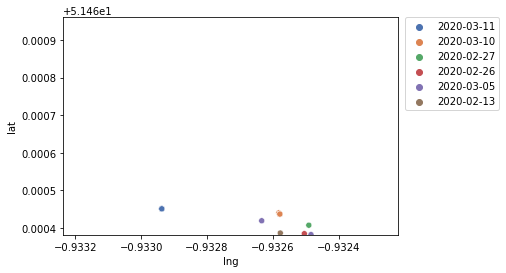

f8:94:c2:49:80:c7


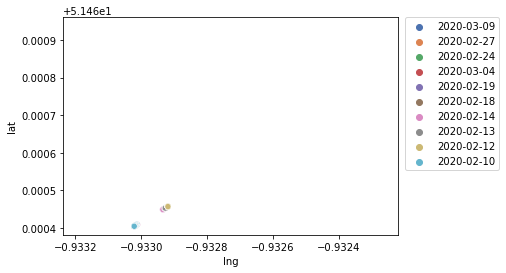

80:82:23:80:5d:d8


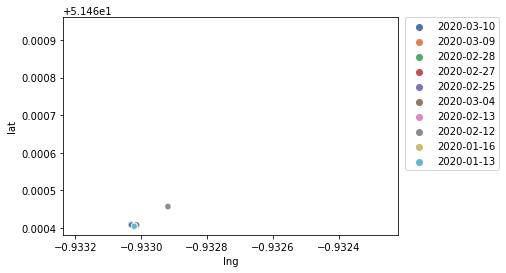

38:f9:d3:20:e5:75


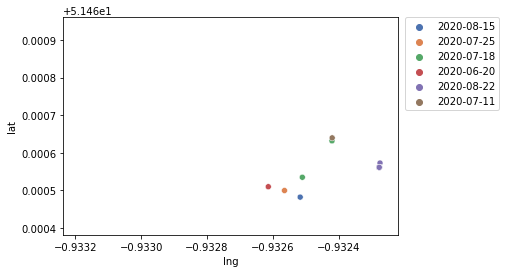

98:84:e3:d8:80:60


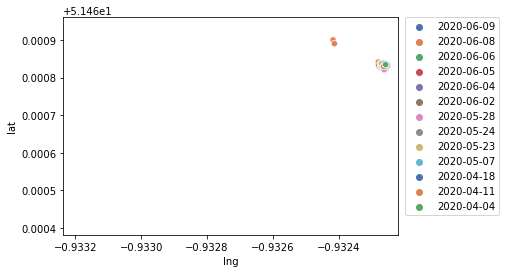

60:70:c0:f3:ce:b9


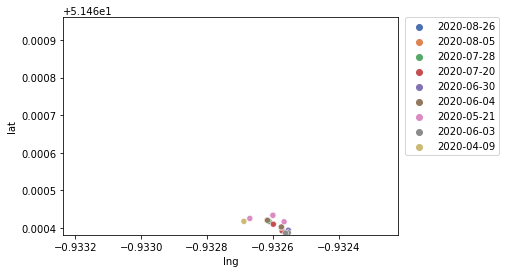

2c:f0:a2:62:8d:28


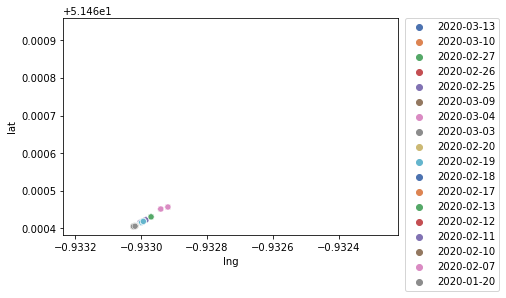

c4:98:80:e5:2b:5f


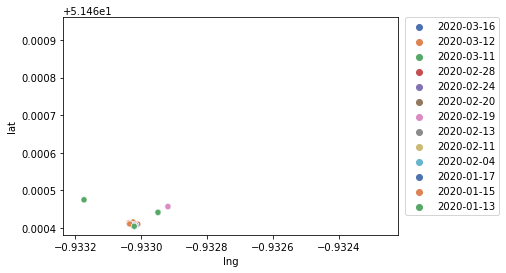

f0:d5:bf:19:55:37


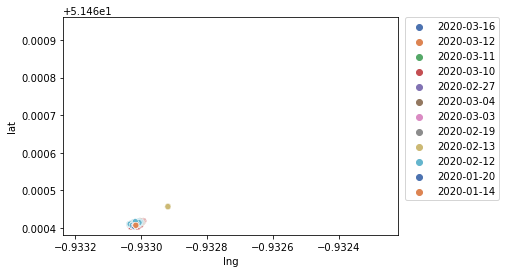

84:ad:8d:5e:1f:bd


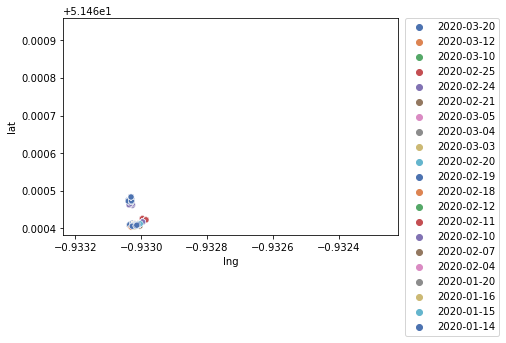

9c:da:3e:83:df:8d


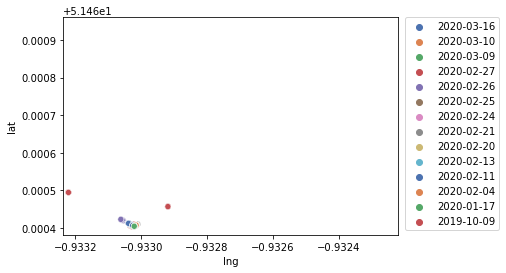

94:e9:79:f3:5c:5b


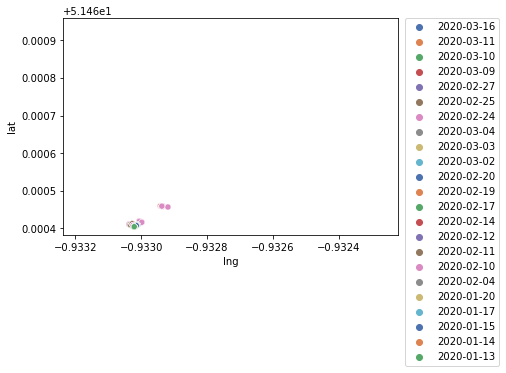

74:e2:8c:41:94:cc


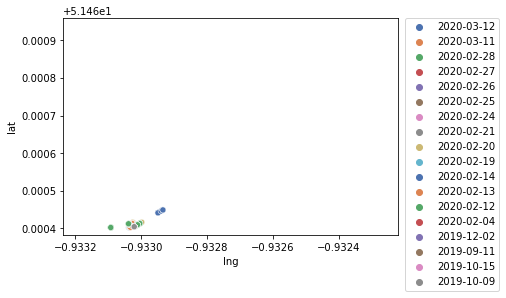

48:a4:72:ae:11:81


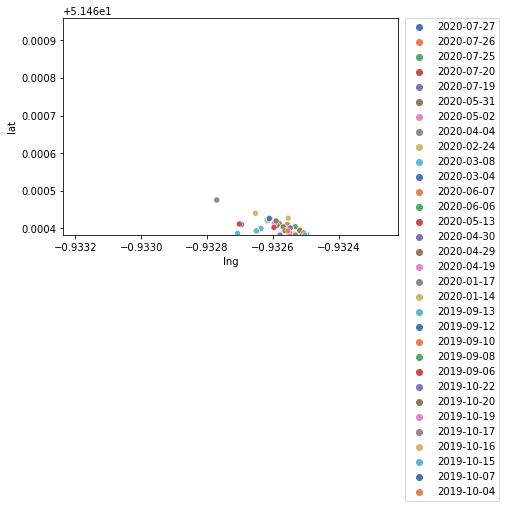

9c:4e:36:86:7e:14


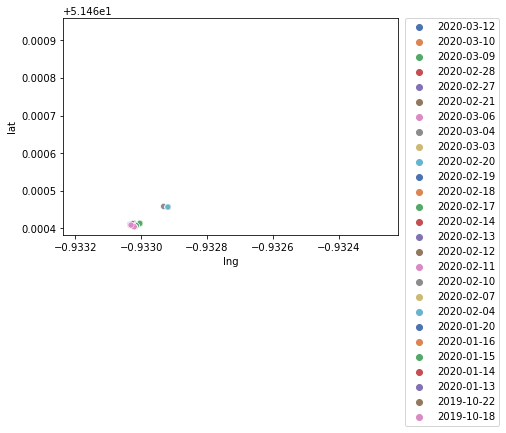

94:65:9c:0f:d0:4d


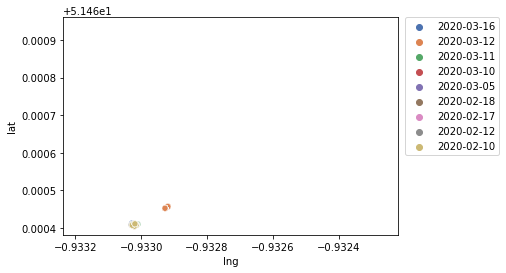

7c:67:a2:a5:91:b9


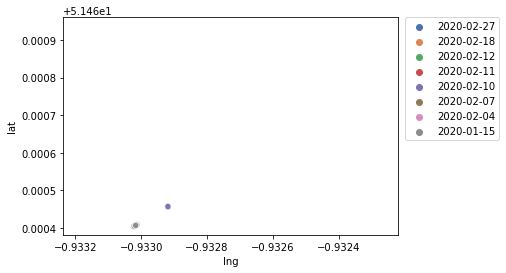

9c:b6:d0:e1:72:9f


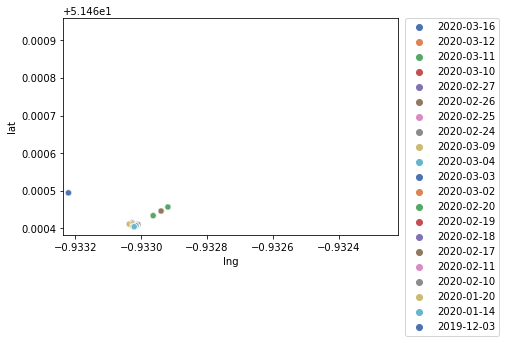

30:a8:db:bf:00:f2


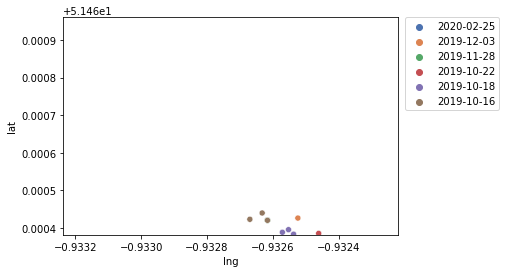

38:f9:d3:1e:30:df


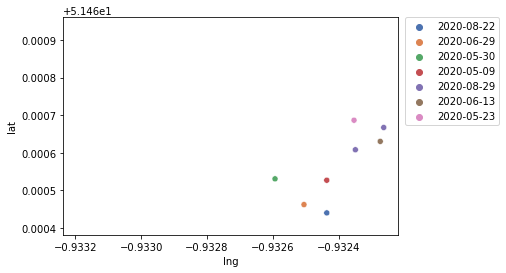

54:99:63:ec:4a:a3


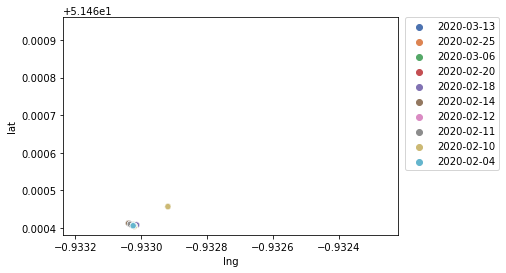

3c:f8:62:6c:86:4e


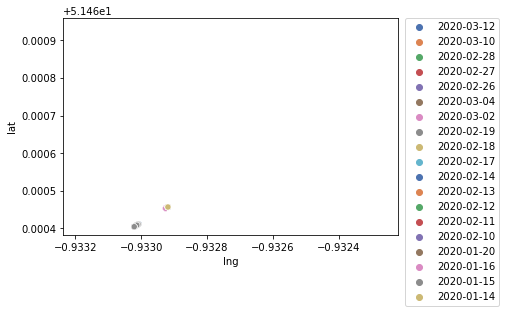

58:fb:84:6d:98:59


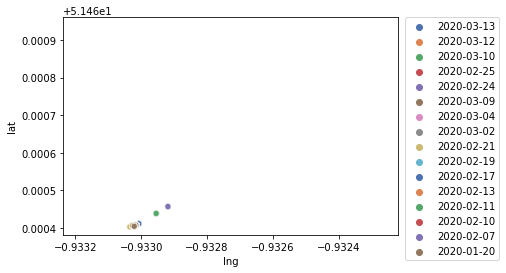

64:a2:f9:b8:30:53


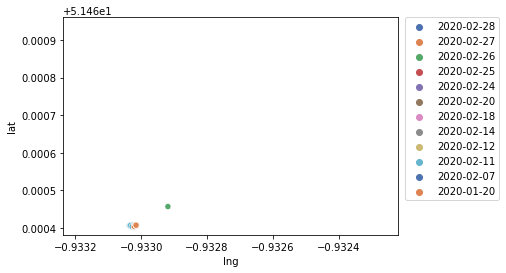

a0:88:69:e1:a0:a0


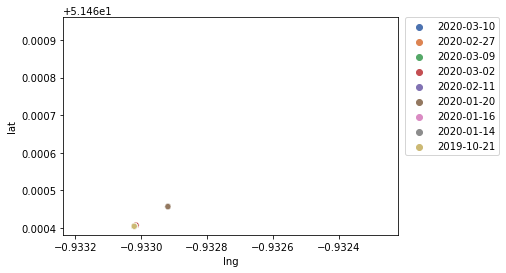

5c:80:b6:4e:d2:b6


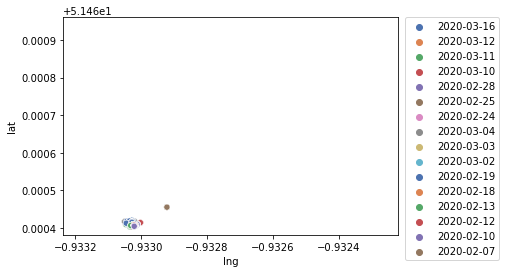

f0:c3:71:a1:21:34


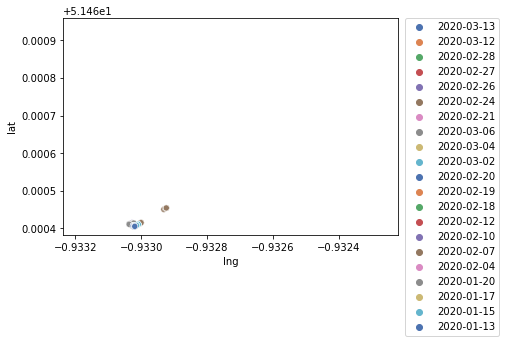

28:b2:bd:14:12:34


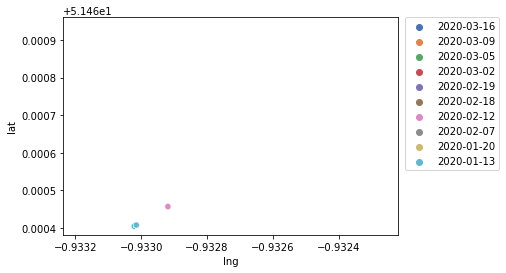

c0:e8:62:66:c5:8a


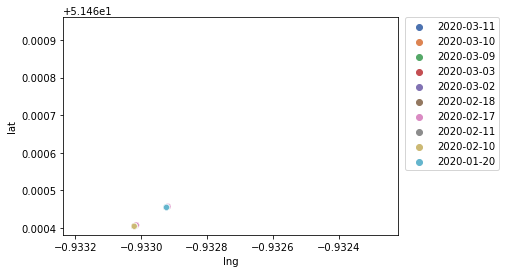

f0:98:9d:67:ba:9f


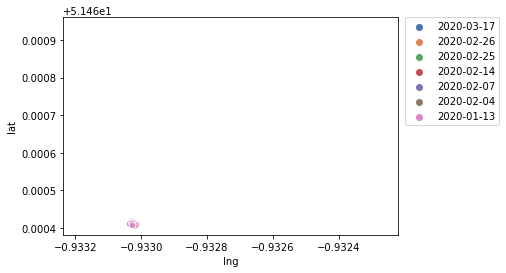

f0:98:9d:d6:70:35


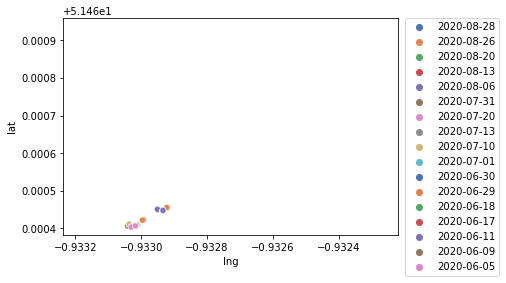

40:9c:28:e2:83:9e


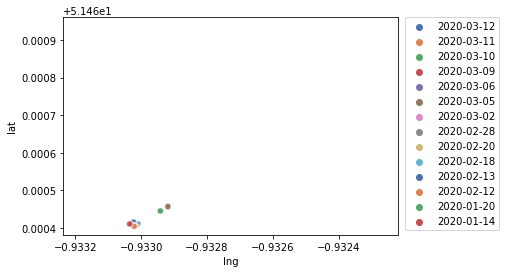

dc:53:60:c0:18:3b


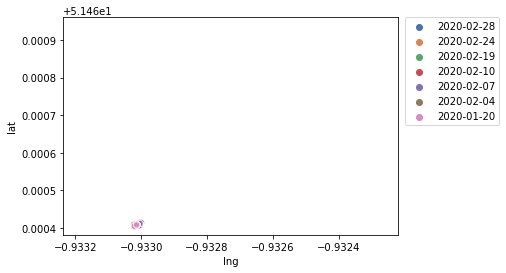

60:64:05:c6:51:76


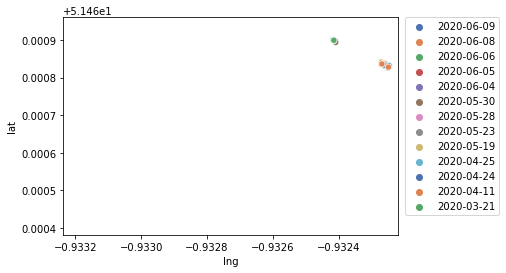

d8:0f:99:51:46:6f


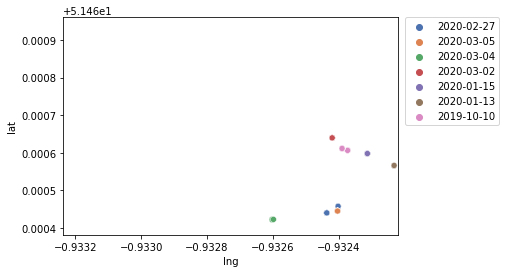

08:6d:41:b7:50:dc


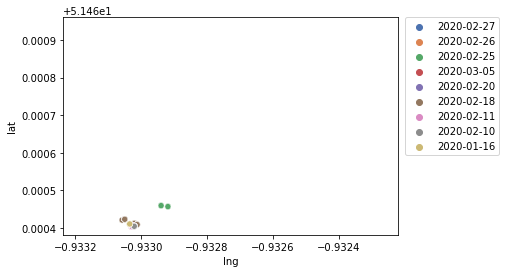

d4:61:da:3c:77:fb


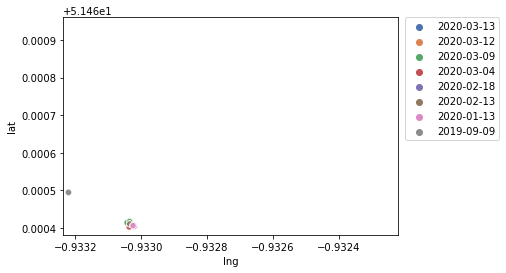

60:57:18:d7:19:c3


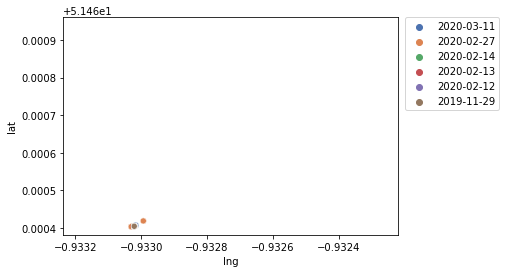

dc:53:60:c0:18:5e


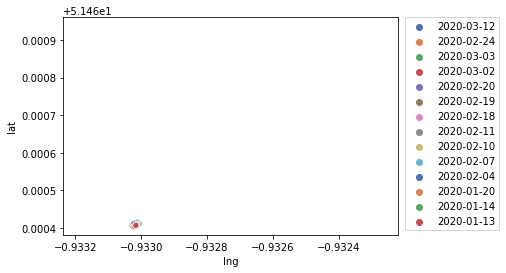

b0:68:e6:4e:62:d4


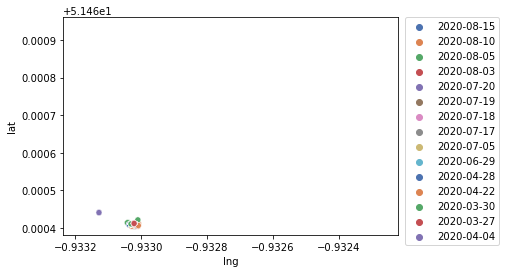

38:f9:d3:20:31:55


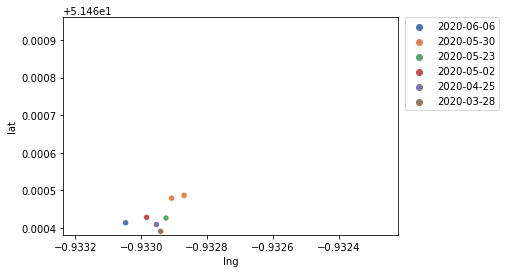

f4:8c:50:1e:a1:31


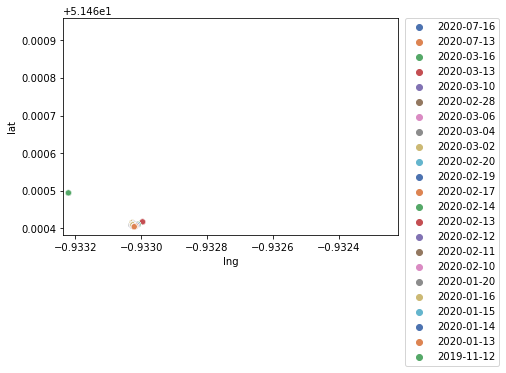

7c:b3:7b:19:5b:e4


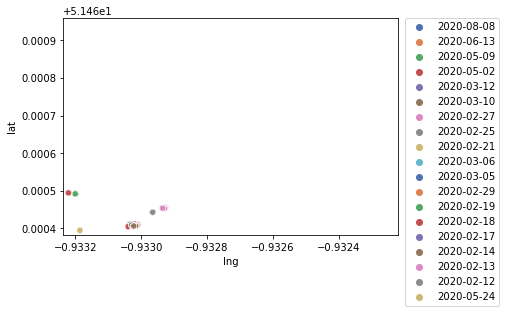

fc:4d:d4:55:31:b4


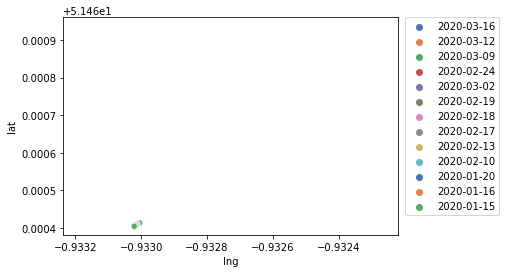

6c:c7:ec:66:ab:a5


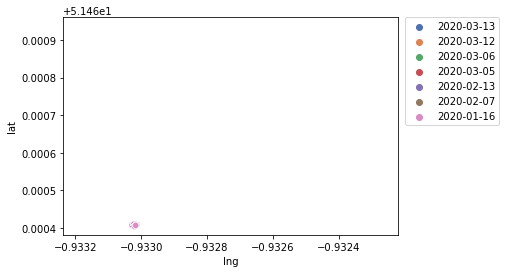

88:11:96:e6:07:1d


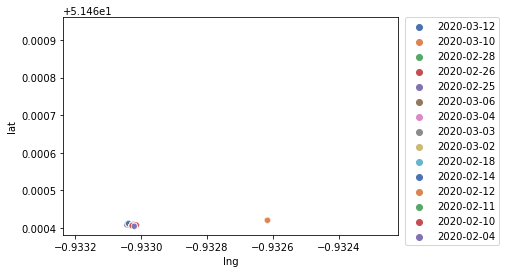

58:00:e3:d9:e4:91


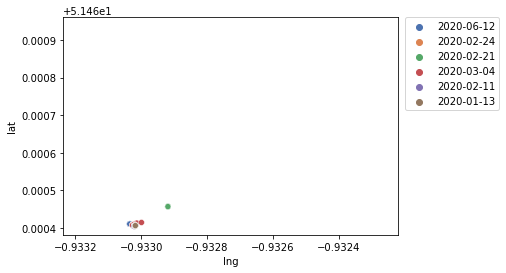

c4:e9:84:09:a4:6f


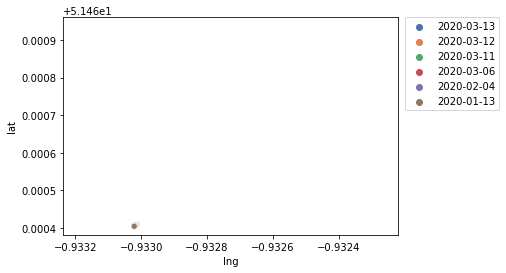

f4:60:e2:ce:26:d8


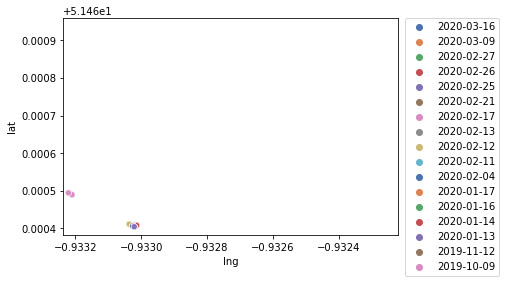

f0:6e:0b:cd:f8:27


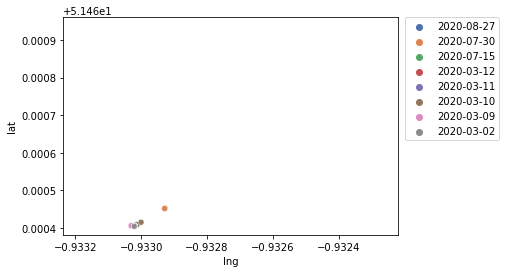

c0:b6:f9:f5:58:d4


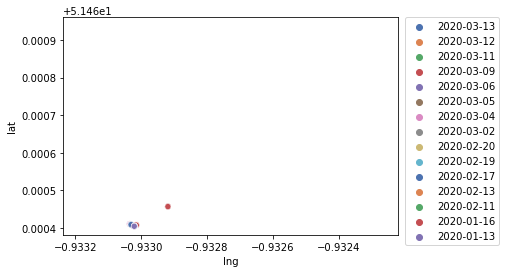

90:e1:7b:2d:3a:ac


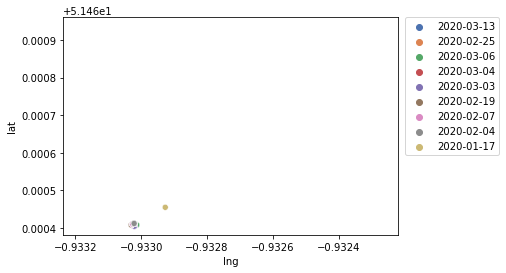

9c:b6:d0:e1:9b:4b


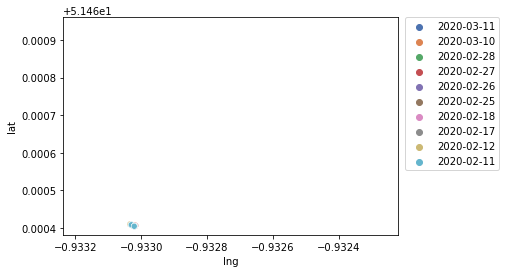

bc:e1:43:2a:fe:d9


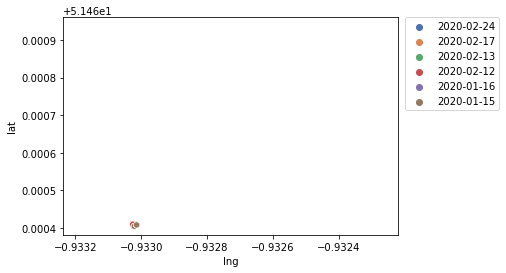

4c:66:41:db:99:33


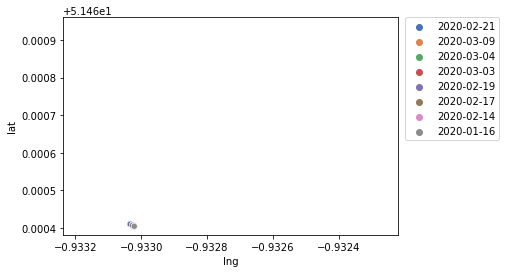

6c:c7:ec:6c:ec:9a


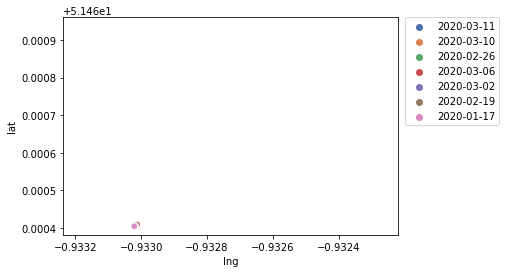

f8:2d:7c:5a:14:67


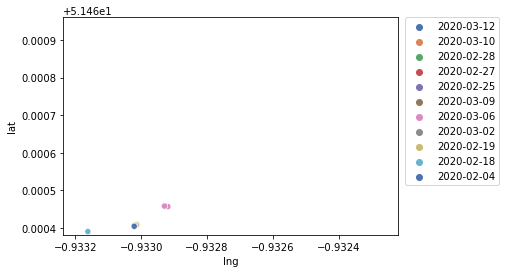

28:16:a8:71:19:9a


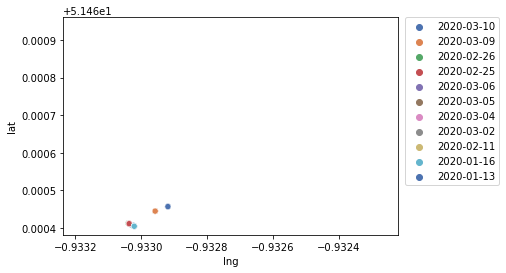

b4:6b:fc:06:18:69


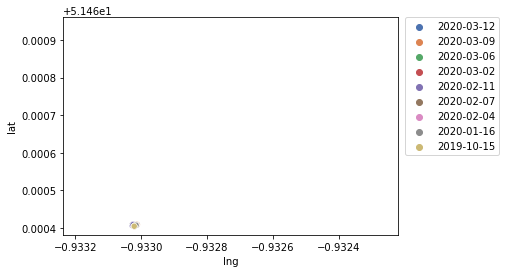

04:72:95:42:af:df


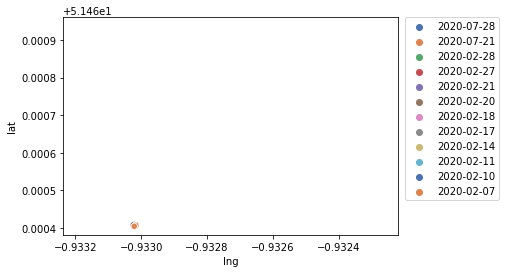

1c:5c:f2:ac:52:3f


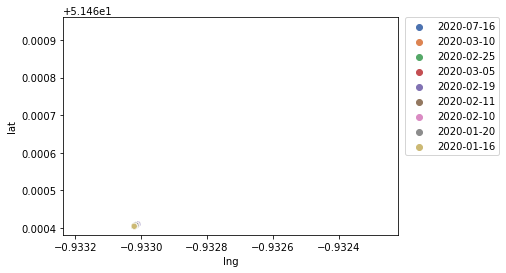

9c:4e:36:92:ec:e4


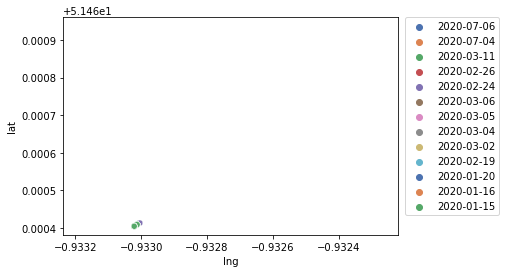

94:0c:98:21:6b:6d


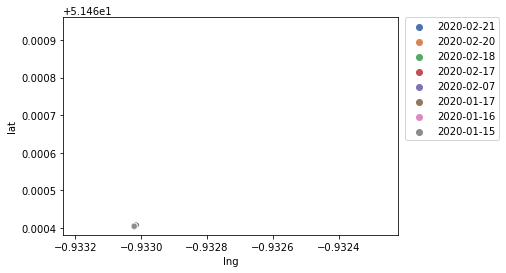

30:07:4d:f3:43:15


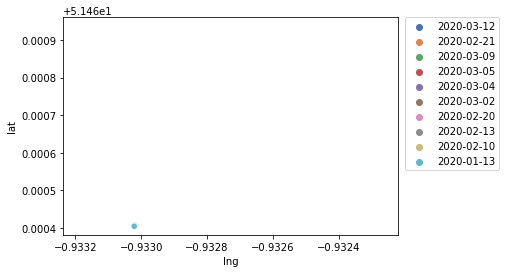

04:72:95:b0:dd:55


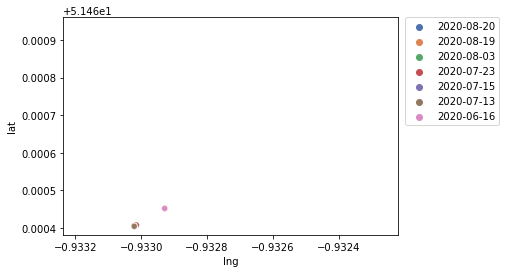

a4:f1:e8:1c:a9:04


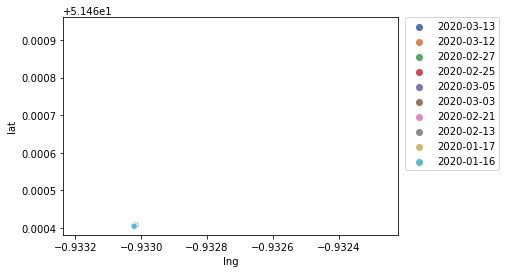

9c:4e:36:86:82:ec


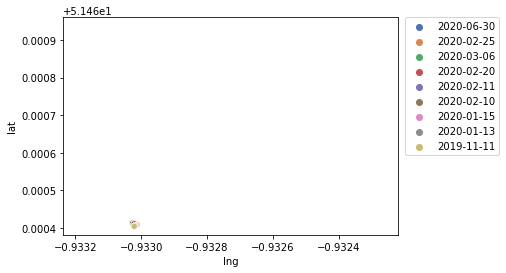

5c:e0:c5:ad:af:f2


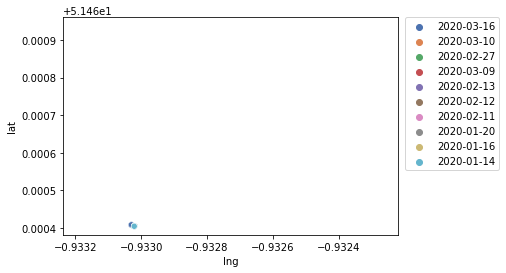

d8:68:c3:a3:80:91


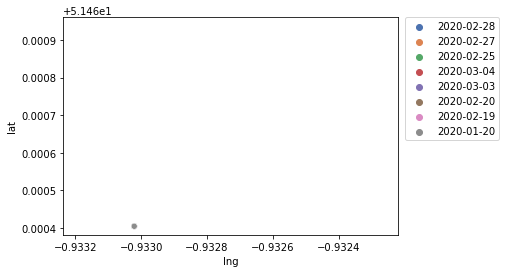

48:bf:6b:1f:5e:fd


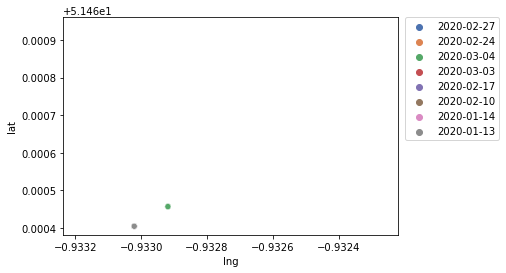

1c:5c:f2:f3:7a:fd


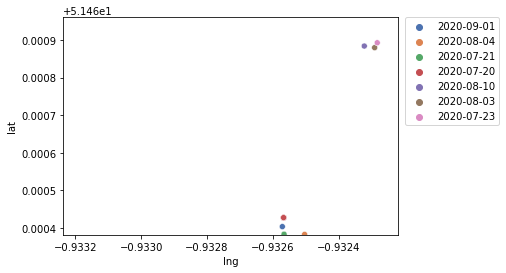

9c:b6:d0:e2:75:ed


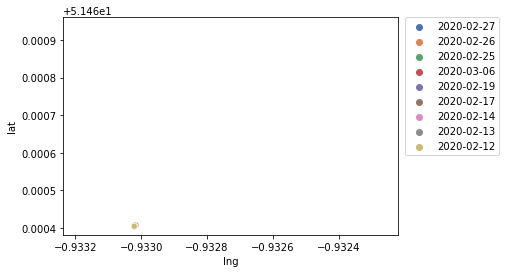

In [65]:
for i in machinery_df["ClientMacAddr"].unique():
    print(i)
    # plot machinary colored by date
    sns.scatterplot(x="lng", y="lat", data=df[df['ClientMacAddr'] == i], hue="date", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

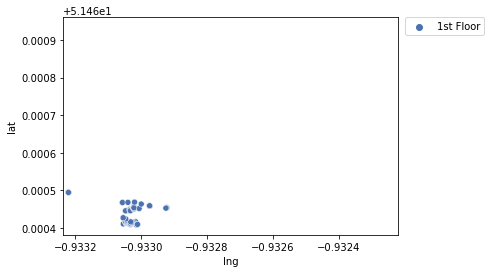

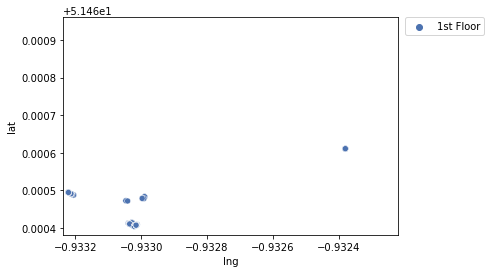

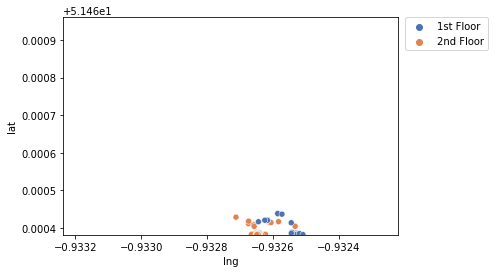

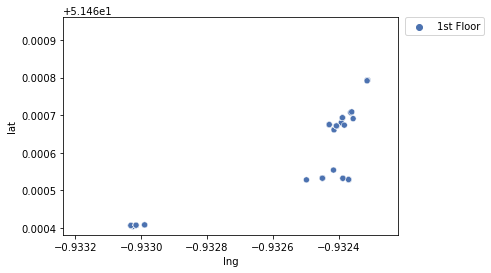

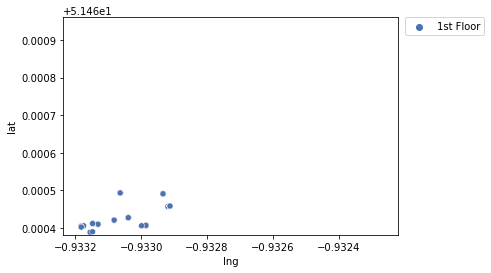

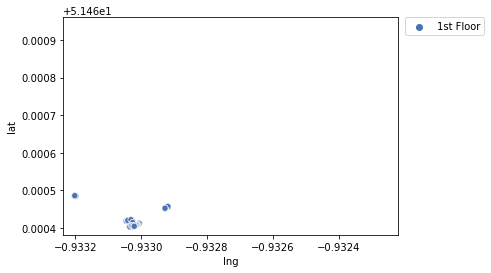

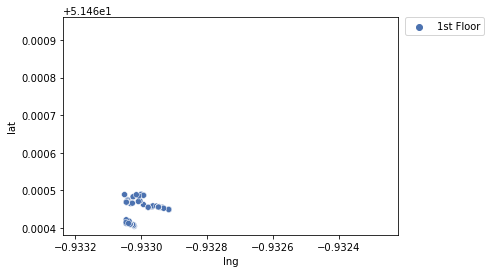

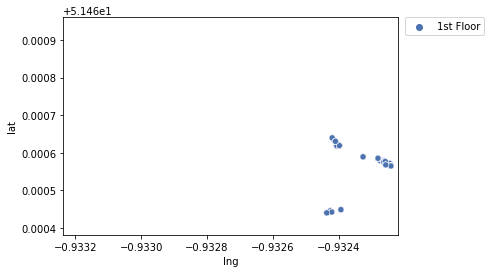

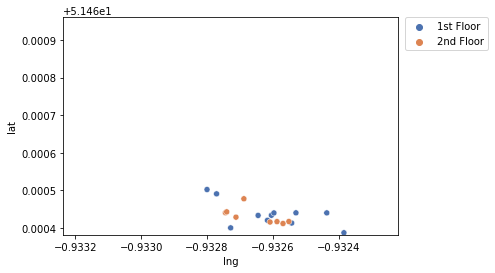

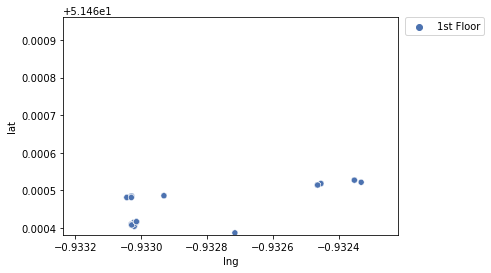

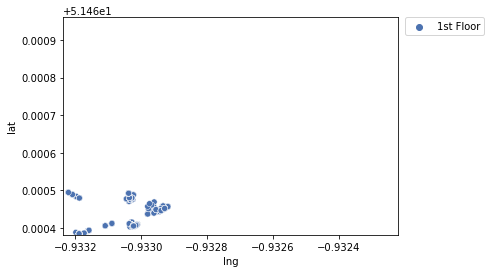

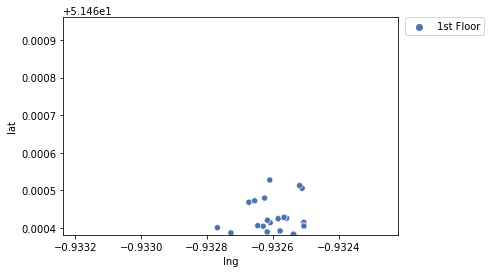

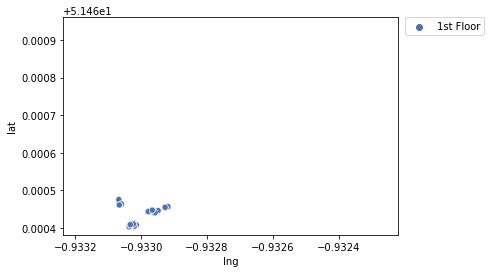

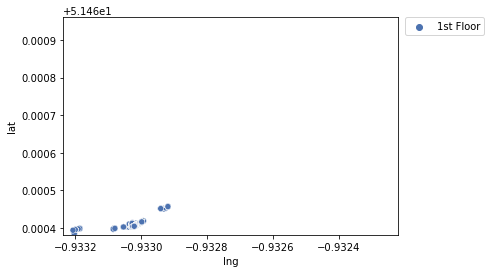

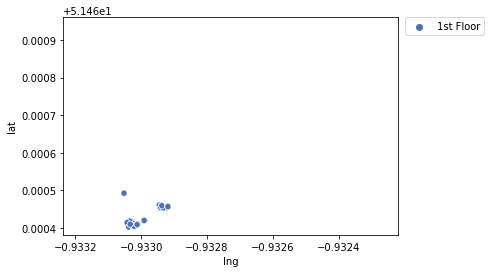

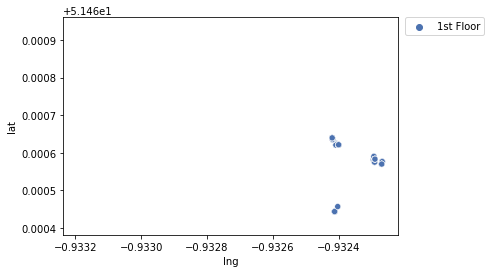

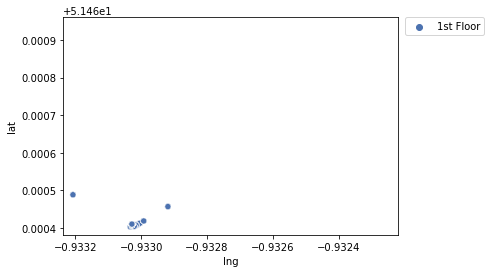

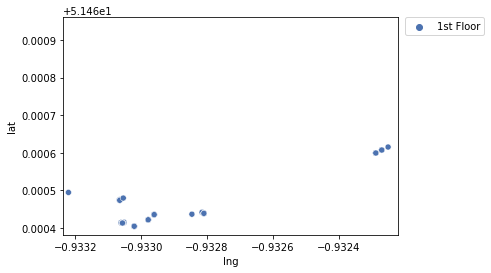

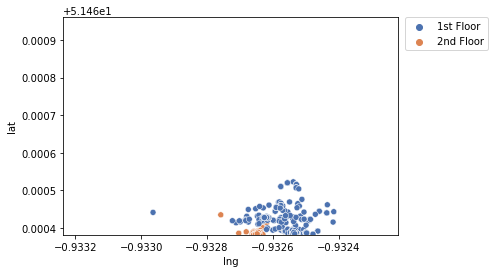

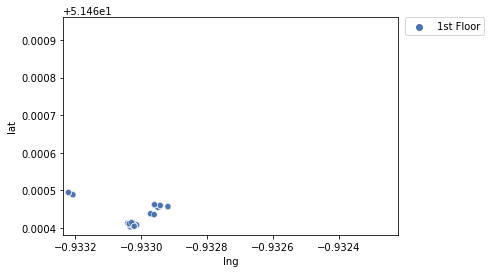

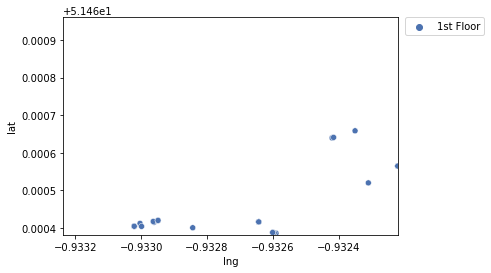

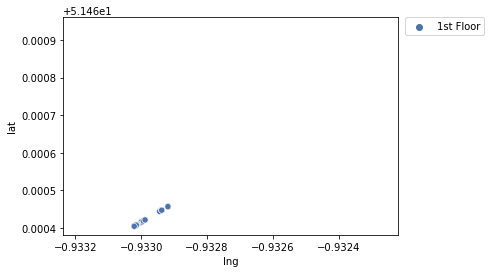

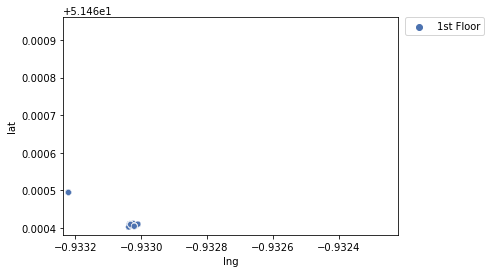

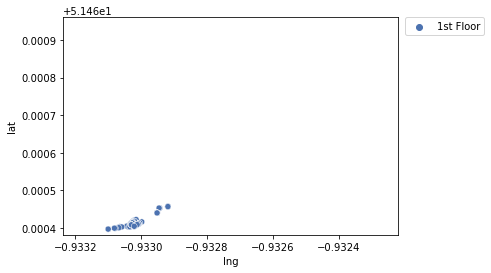

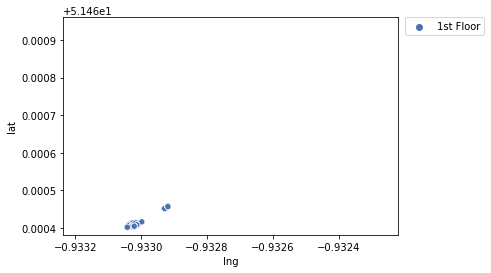

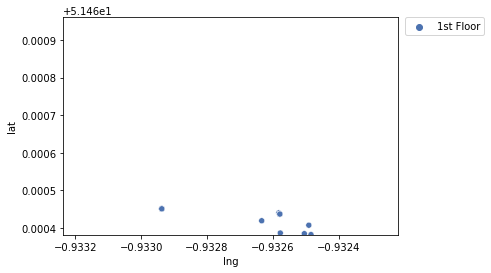

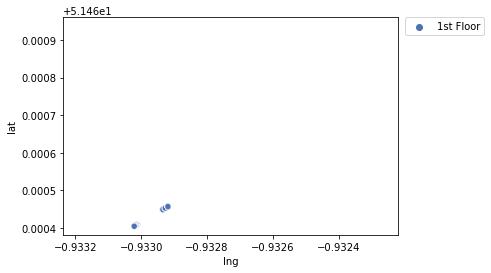

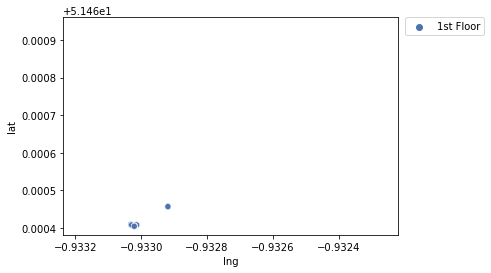

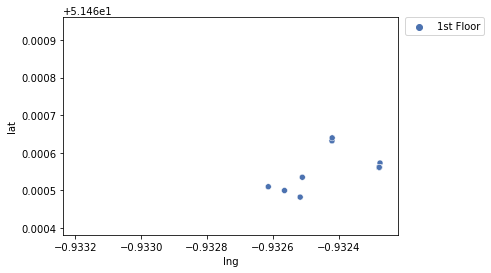

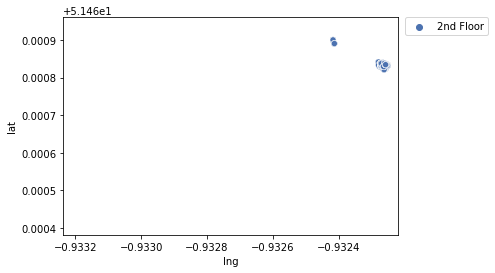

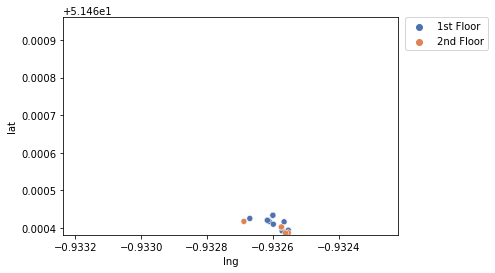

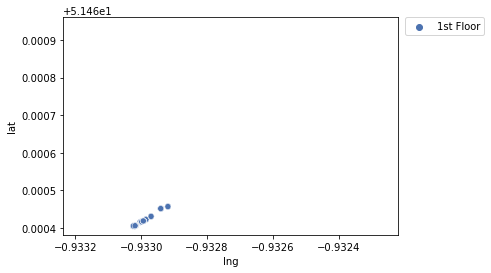

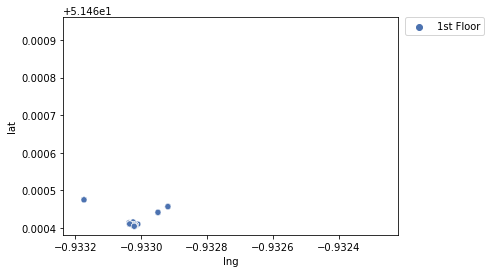

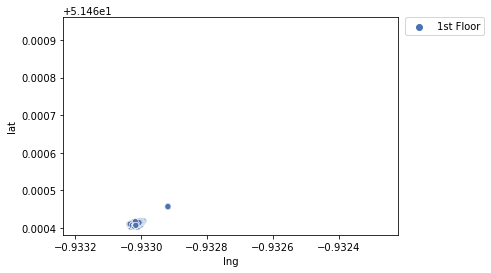

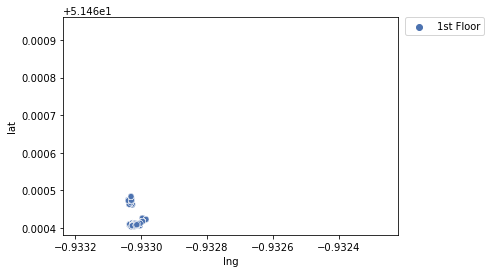

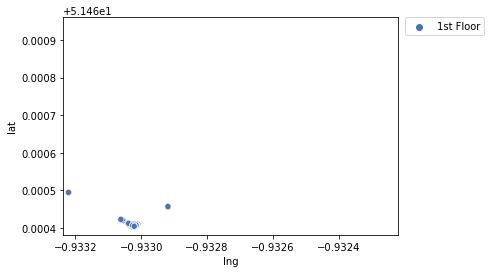

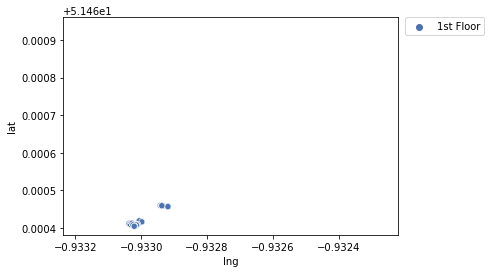

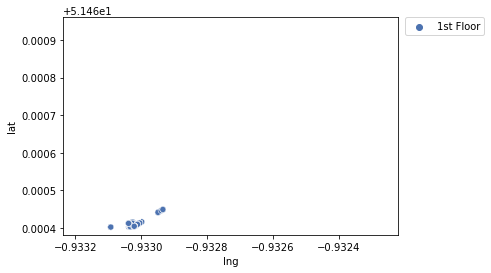

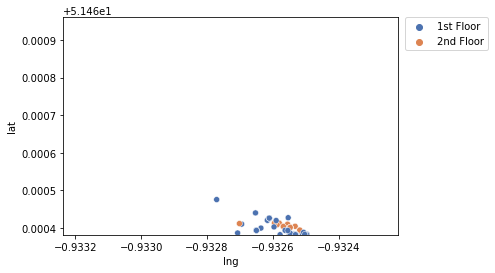

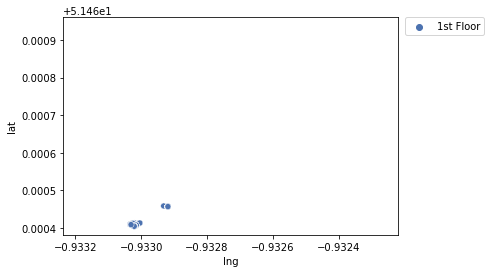

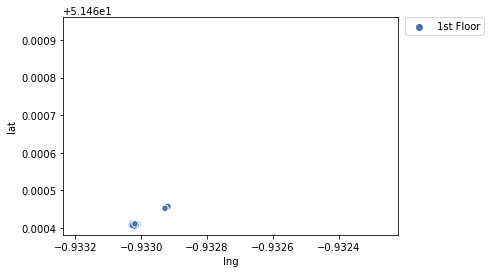

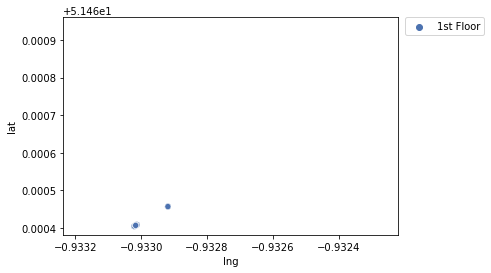

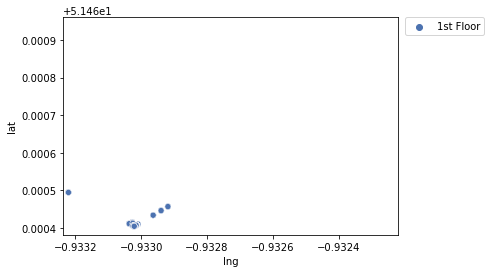

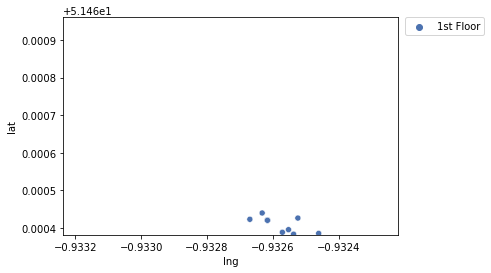

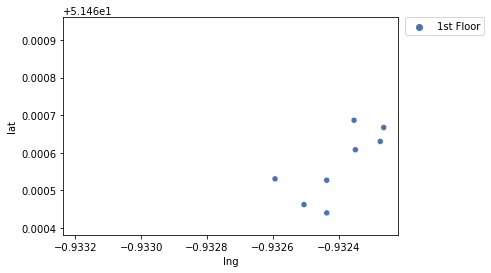

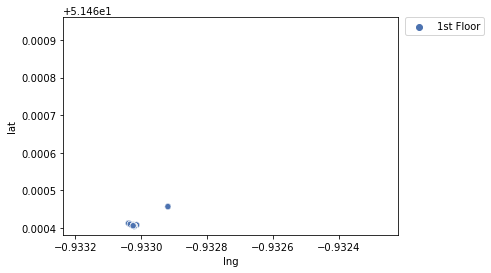

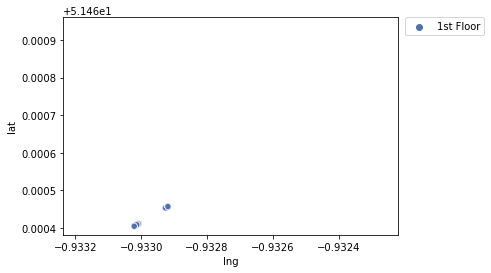

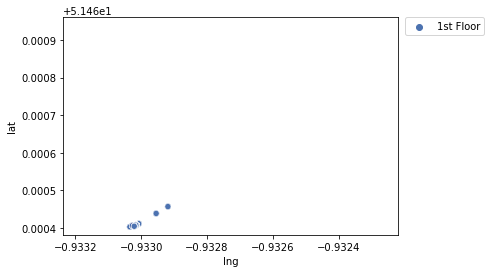

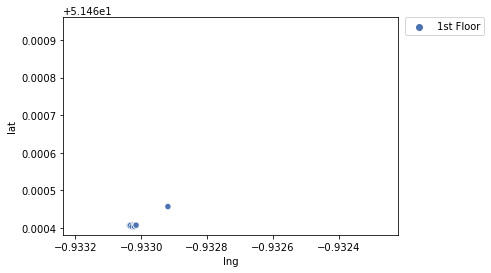

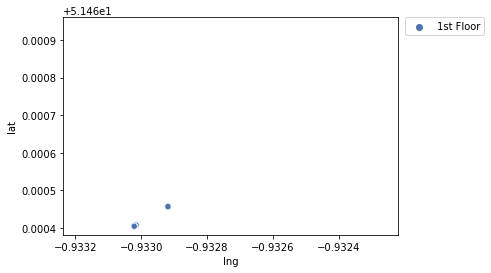

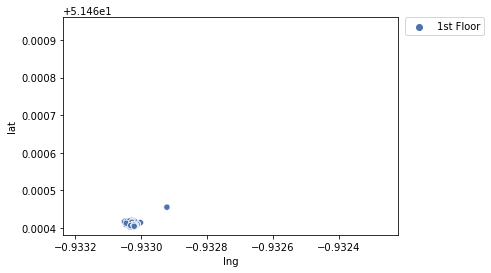

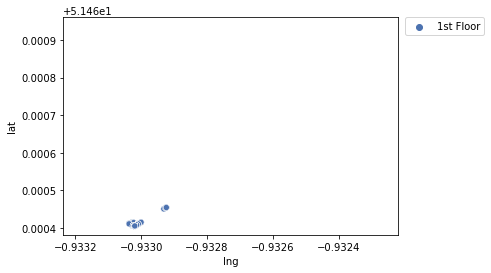

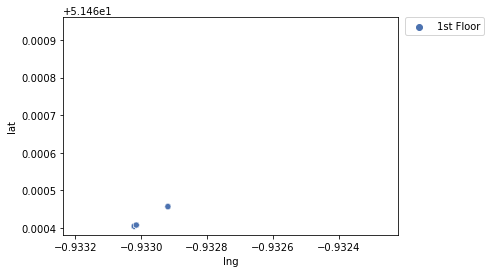

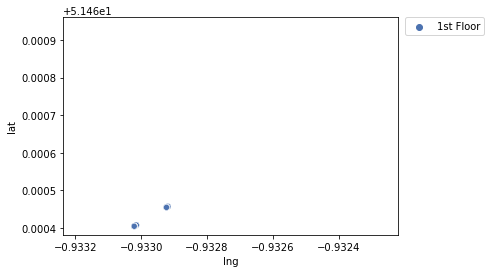

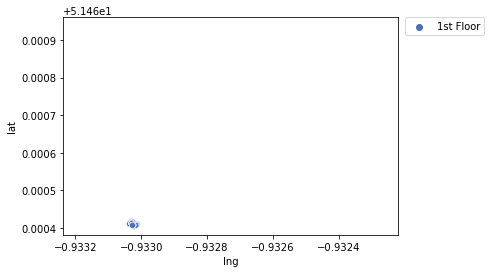

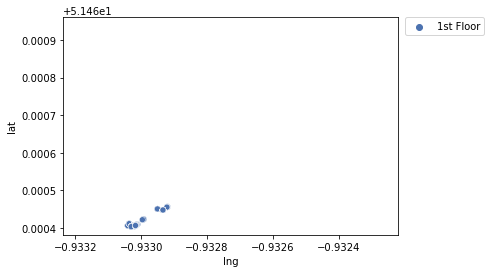

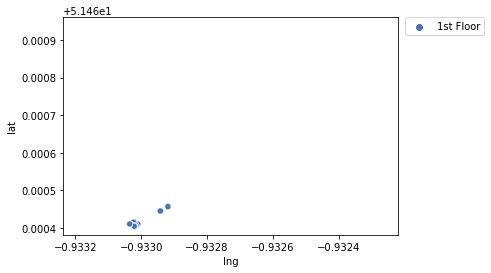

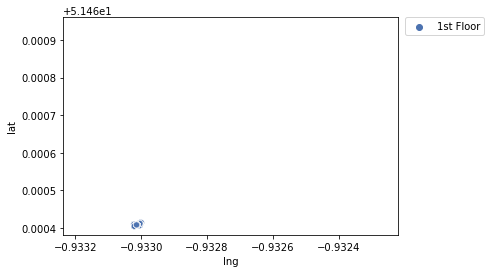

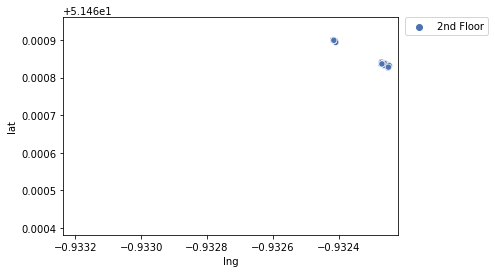

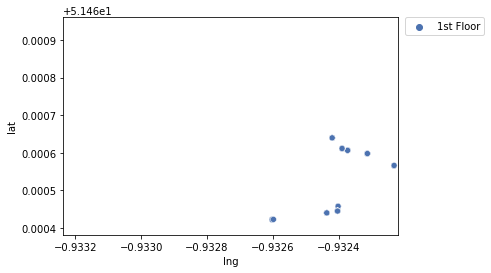

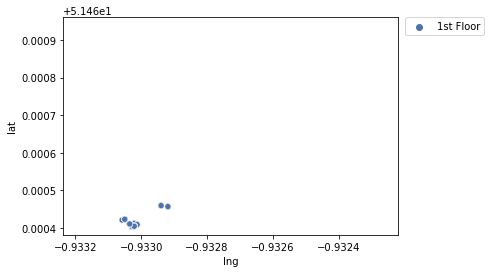

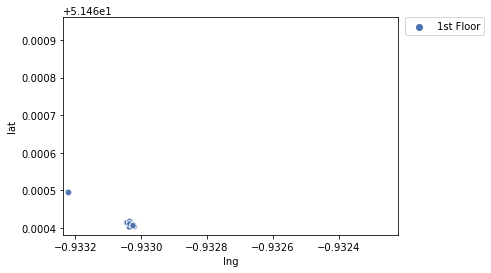

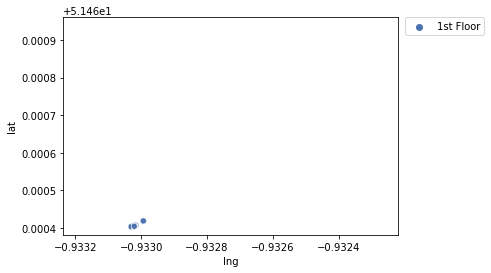

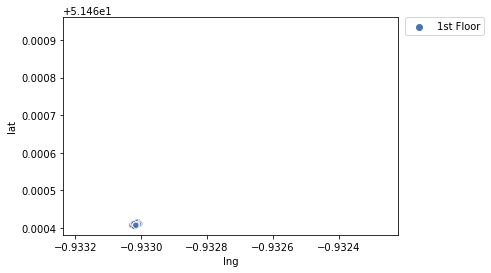

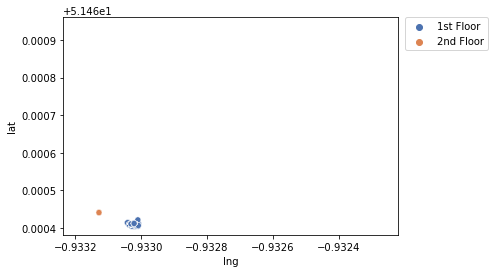

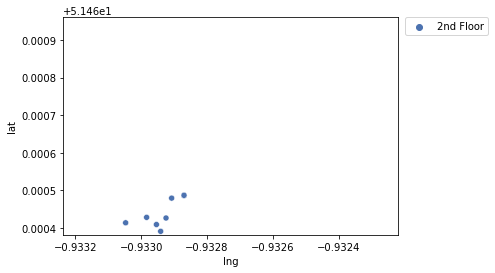

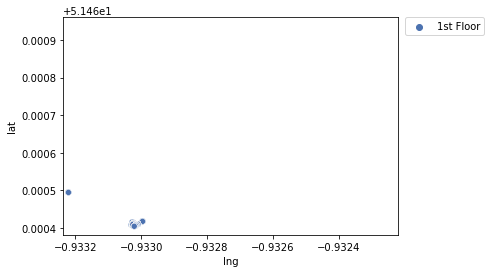

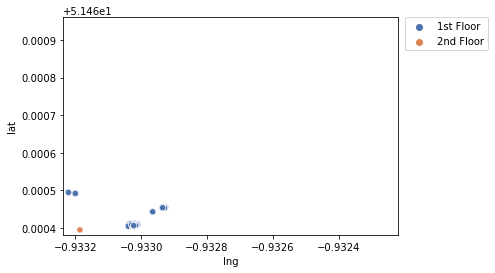

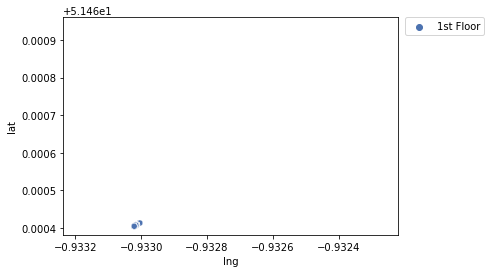

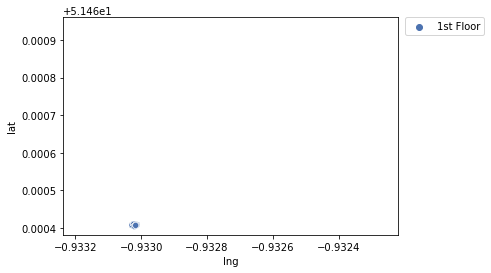

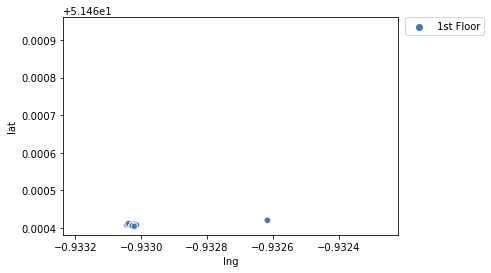

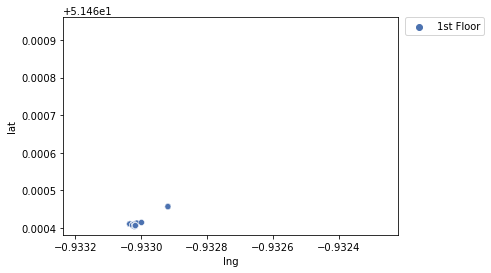

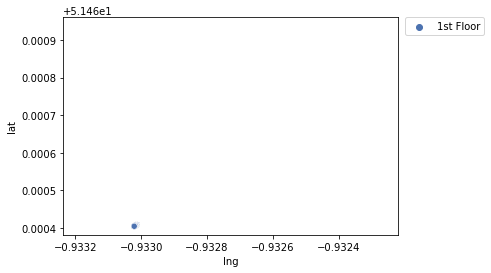

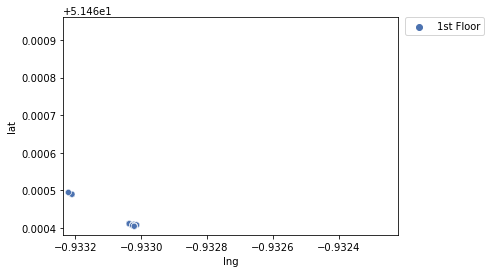

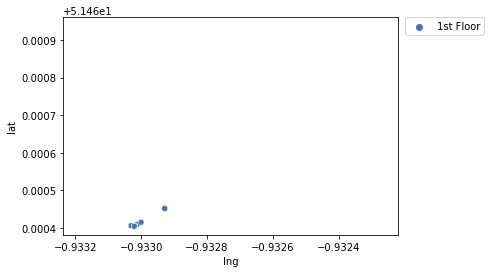

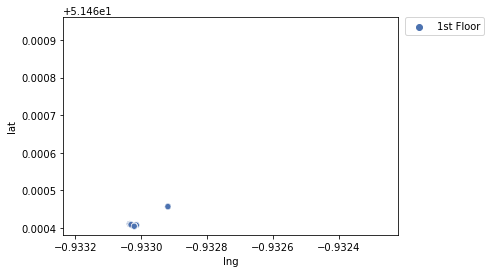

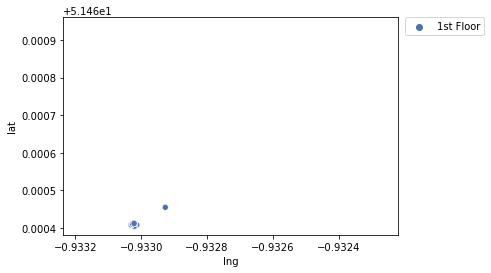

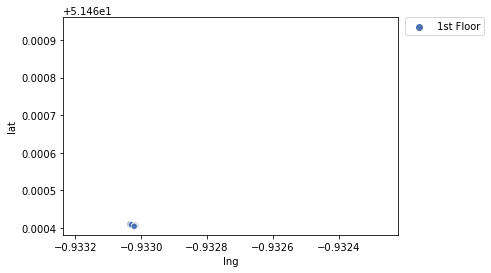

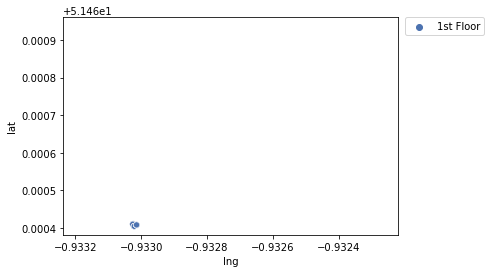

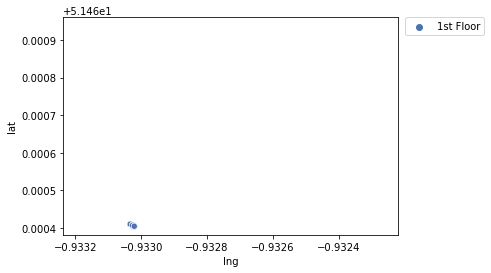

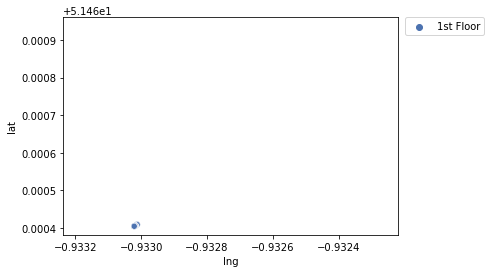

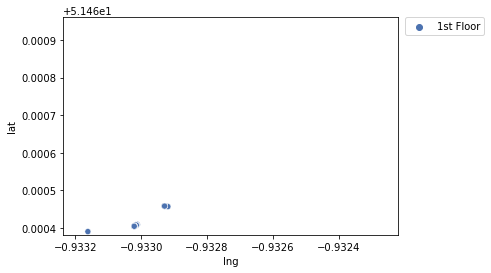

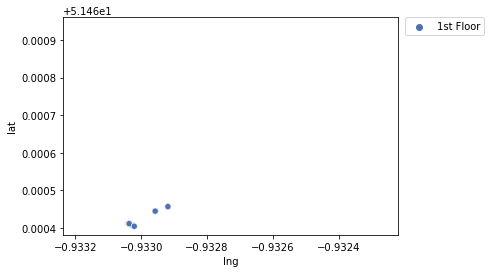

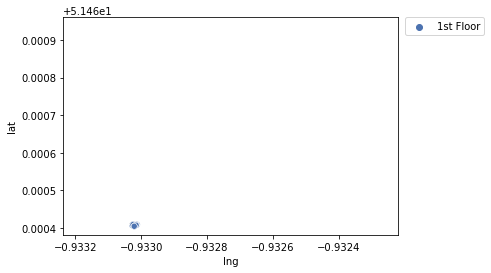

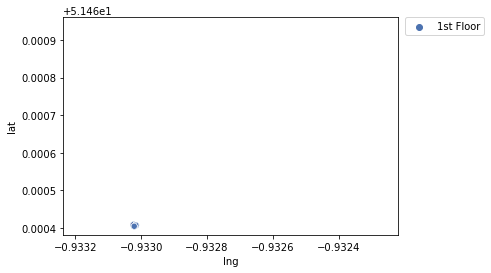

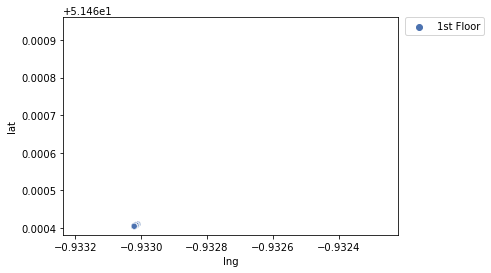

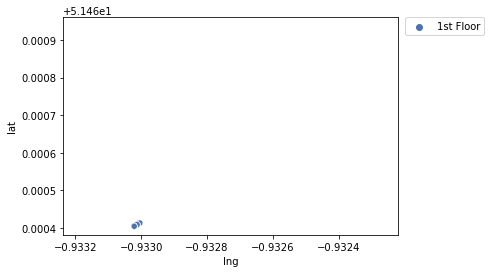

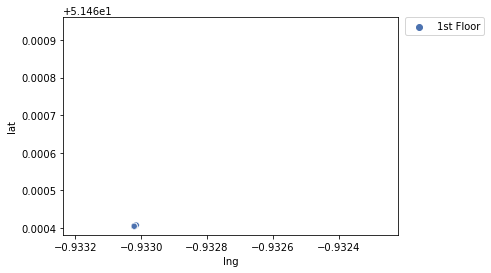

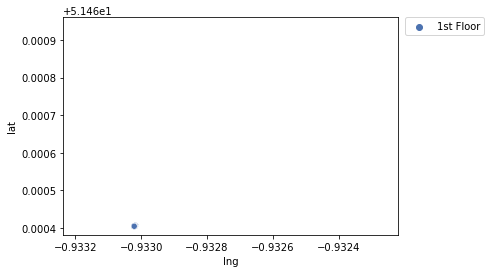

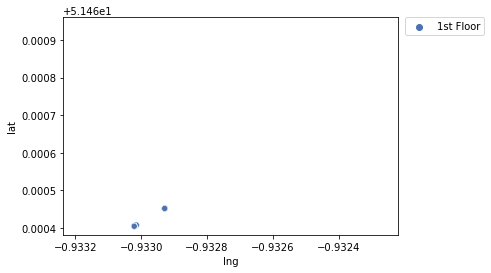

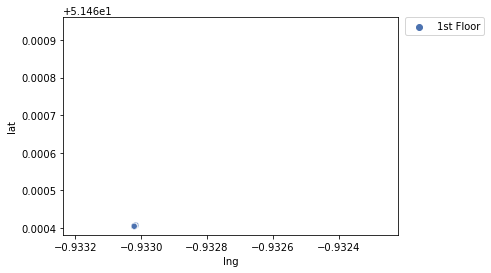

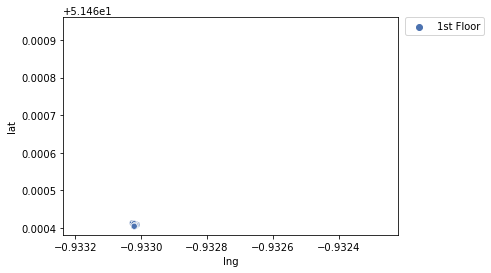

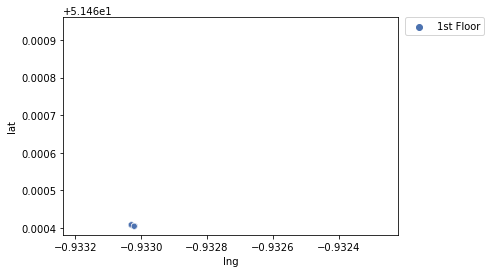

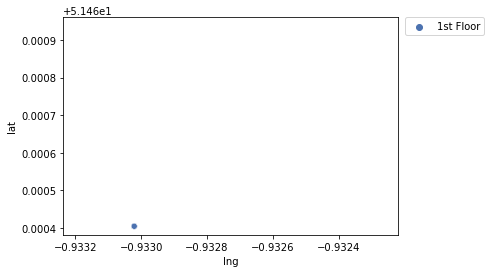

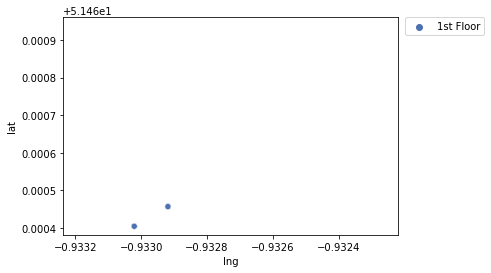

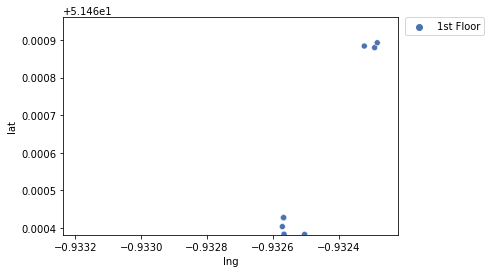

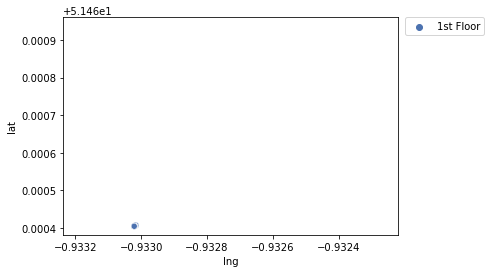

In [66]:
# plot machinary colored by level
for i in machinery_df["ClientMacAddr"].unique()[\]:
    sns.scatterplot(x="lng", y="lat", data=df[df['ClientMacAddr'] == i], hue="Level", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

## Count number of signals that belong to designated areas (1st Floor)

In [67]:
def find_designated_space_1F(lat, lng):
    designated_space = 'Not in any'
    # Canteen
    bottom_left_canteen = (51.46079754688419, -0.932543300159931)
    top_right_canteen   = (51.46098040420442, -0.9322317891150113)
    
    # Lab
    bottom_left_lab = (51.460511289004344, -0.9325966645999756)
    top_right_lab = (51.46076277798453, -0.9322830982136779)
    
    # Entrance
    bottom_left_entrance = (51.46030604220702, -0.932772184478665)
    top_right_entrance = (51.46038783329849, -0.9325170620291541)
    
    # Assembly Line
    bottom_left_assemblyline = (51.46037535823833, -0.933292264577848)
    top_right_assemblyline = (51.46053231597175, -0.9329178977311808)
    
    # Control room
    bottom_left_control_rooms = (51.46036351126477, -0.9329178977311808)
    top_right_control_rooms = (51.4605206006061, -0.9327703787013455)

    # Storage
    bottom_left_storage = (51.46036685171761, -0.932772184478665)
    top_right_storage = (51.460505605290635, -0.9326059032401409)
    
    # Admin office
    bottom_left_admin_office = (51.46035352283357, -0.9325924891387347)
    top_right_admin_office = (51.46047718898315, -0.9323189038465033)
    
    if lat >= bottom_left_canteen[0] and lat <= top_right_canteen[0] and lng >= bottom_left_canteen[1] and lng <= top_right_canteen[1]:
        designated_space = 'canteen'
    elif lat >= bottom_left_lab[0] and lat <= top_right_lab[0] and lng >= bottom_left_lab[1] and lng <= top_right_lab[1]:
        designated_space = 'lab'
    elif lat >= bottom_left_entrance[0] and lat <= top_right_entrance[0] and lng >= bottom_left_entrance[1] and lng <= top_right_entrance[1]:
        designated_space = 'entrance'
    elif lat >= bottom_left_assemblyline[0] and lat <= top_right_assemblyline[0] and lng >= bottom_left_assemblyline[1] and lng <= top_right_assemblyline[1]:
        designated_space = 'assembly_line'
    elif lat >= bottom_left_control_rooms[0] and lat <= top_right_control_rooms[0] and lng >= bottom_left_control_rooms[1] and lng <= top_right_control_rooms[1]:
        designated_space = 'control_rooms'
    elif lat >= bottom_left_storage[0] and lat <= top_right_storage[0] and lng >= bottom_left_storage[1] and lng <= top_right_storage[1]:
        designated_space = 'storage'
    elif lat >= bottom_left_admin_office[0] and lat <= top_right_admin_office[0] and lng >= bottom_left_admin_office[1] and lng <= top_right_admin_office[1]:
        designated_space = 'admin_office'
    else:
        designated_space = 'not_in_any'
    
    return designated_space

### Mobile Device

In [68]:
## Select only 1st floor, mobile mac id, and weekday data
df_mobile_1F = df[(df['ClientMacAddr'].isin(Mobile_device["ClientMacAddr"])) & 
               (df['Level'].isin(["1st Floor"])) &
               (df['ClientMacAddr'].isin(df_weekday["ClientMacAddr"]))]
df_mobile_1F

Site      Level      ClientMacAddr        lat       lng  \
0         UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
1         UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
2         UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460448 -0.933048   
3         UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
4         UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
...             ...        ...                ...        ...       ...   
34290603  UK Office  1st Floor  48:45:20:37:c0:a3  51.460959 -0.932292   
34290604  UK Office  1st Floor  a4:c3:f0:a5:f0:f0  51.460951 -0.932286   
34290605  UK Office  1st Floor  5c:5f:67:8b:e1:b5  51.460795 -0.932229   
34290606  UK Office  1st Floor  c4:6e:1f:1b:4f:c0  51.460851 -0.932247   
34290607  UK Office  1st Floor  98:10:e8:3a:8a:6e  51.460689 -0.932237   

                                localtime                  normalized_time  \
0        2020-09-01 23:58:49.582000+00:00 2020-09-01 23:58:49.582000+00:00   
1        2020-09-01 23:58:38.112000+00:00 2020-09-01 23:58:38.112000+00:00   
2        2020-09-01 23:58:29.514000+00:00 2020-09-01 23:58:29.514000+00:00   
3        2020-09-01 23:58:18.046000+00:00 2020-09-01 23:58:18.046000+00:00   
4        2020-09-01 23:58:09.522000+00:00 2020-09-01 23:58:09.522000+00:00   
...                                   ...                              ...   
34290603 2019-10-03 15:27:49.278000+00:00 2019-10-03 15:27:49.278000+00:00   
34290604 2019-10-03 15:27:49.278000+00:00 2019-10-03 15:27:49.278000+00:00   
34290605 2019-10-03 15:27:49.275000+00:00 2019-10-03 15:27:49.275000+00:00   
34290606 2019-10-03 15:27:49.271000+00:00 2019-10-03 15:27:49.271000+00:00   
34290607 2019-10-03 15:27:49.078000+00:00 2019-10-03 15:27:49.078000+00:00   

                date      time  dayOfWeek  IsWeekend  
0         2020-09-01  23:58:49          1      False  
1         2020-09-01  23:58:38          1      False  
2         2020-09-01  23:58:29          1      False  
3         2020-09-01  23:58:18          1      False  
4         2020-09-01  23:58:09          1      False  
...              ...       ...        ...        ...  
34290603  2019-10-03  15:27:49          3      False  
34290604  2019-10-03  15:27:49          3      False  
34290605  2019-10-03  15:27:49          3      False  
34290606  2019-10-03  15:27:49          3      False  
34290607  2019-10-03  15:27:49          3      False  

[31062414 rows x 11 columns]

In [69]:
df_mobile_1F['designated_space'] = df_mobile_1F.apply(lambda x: find_designated_space_1F(x['lat'], x['lng']), axis=1)
df_mobile_1F['designated_space'].value_counts()

<ipython-input-69-04f144cef11e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mobile_1F['designated_space'] = df_mobile_1F.apply(lambda x: find_designated_space_1F(x['lat'], x['lng']), axis=1)


assembly_line    7498406
lab              6210640
not_in_any       6015676
control_rooms    4089887
storage          3711613
canteen          2063113
admin_office     1289761
entrance          183318
Name: designated_space, dtype: int64

In [70]:
df_mobile_1F

Site      Level      ClientMacAddr        lat       lng  \
0         UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
1         UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
2         UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460448 -0.933048   
3         UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
4         UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
...             ...        ...                ...        ...       ...   
34290603  UK Office  1st Floor  48:45:20:37:c0:a3  51.460959 -0.932292   
34290604  UK Office  1st Floor  a4:c3:f0:a5:f0:f0  51.460951 -0.932286   
34290605  UK Office  1st Floor  5c:5f:67:8b:e1:b5  51.460795 -0.932229   
34290606  UK Office  1st Floor  c4:6e:1f:1b:4f:c0  51.460851 -0.932247   
34290607  UK Office  1st Floor  98:10:e8:3a:8a:6e  51.460689 -0.932237   

                                localtime                  normalized_time  \
0        2020-09-01 23:58:49.582000+00:00 2020-09-01 23:58:49.582000+00:00   
1        2020-09-01 23:58:38.112000+00:00 2020-09-01 23:58:38.112000+00:00   
2        2020-09-01 23:58:29.514000+00:00 2020-09-01 23:58:29.514000+00:00   
3        2020-09-01 23:58:18.046000+00:00 2020-09-01 23:58:18.046000+00:00   
4        2020-09-01 23:58:09.522000+00:00 2020-09-01 23:58:09.522000+00:00   
...                                   ...                              ...   
34290603 2019-10-03 15:27:49.278000+00:00 2019-10-03 15:27:49.278000+00:00   
34290604 2019-10-03 15:27:49.278000+00:00 2019-10-03 15:27:49.278000+00:00   
34290605 2019-10-03 15:27:49.275000+00:00 2019-10-03 15:27:49.275000+00:00   
34290606 2019-10-03 15:27:49.271000+00:00 2019-10-03 15:27:49.271000+00:00   
34290607 2019-10-03 15:27:49.078000+00:00 2019-10-03 15:27:49.078000+00:00   

                date      time  dayOfWeek  IsWeekend designated_space  
0         2020-09-01  23:58:49          1      False    assembly_line  
1         2020-09-01  23:58:38          1      False    assembly_line  
2         2020-09-01  23:58:29          1      False    assembly_line  
3         2020-09-01  23:58:18          1      False    assembly_line  
4         2020-09-01  23:58:09          1      False    assembly_line  
...              ...       ...        ...        ...              ...  
34290603  2019-10-03  15:27:49          3      False          canteen  
34290604  2019-10-03  15:27:49          3      False          canteen  
34290605  2019-10-03  15:27:49          3      False       not_in_any  
34290606  2019-10-03  15:27:49          3      False          canteen  
34290607  2019-10-03  15:27:49          3      False       not_in_any  

[31062414 rows x 12 columns]

In [71]:
len(df_mobile_1F['ClientMacAddr'].unique())

4372

In [72]:
def choose_max_space_1F(row):
    space_dict = {'admin_office': row[2], 'assembly_line': row[3], 'canteen': row[4],
                  'control_rooms': row[5], 'entrance': row[6], 'lab':row[7], 
                  'not_in_any':row[8], 'storage':row[9]}
    return list(dict(sorted(space_dict.items(), key=lambda item: item[1], reverse=True)).keys())[0]

In [73]:
df_mobile_space_1F = df_mobile_1F.groupby('ClientMacAddr')['designated_space'].value_counts(normalize=True).unstack().reset_index(drop=False).fillna(0)
print(df_mobile_space_1F.columns)
df_mobile_space_1F["max_space"] = [choose_max_space_1F(row) for row in df_mobile_space_1F.itertuples()]
df_mobile_space_1F.tail()


Index(['ClientMacAddr', 'admin_office', 'assembly_line', 'canteen',
       'control_rooms', 'entrance', 'lab', 'not_in_any', 'storage'],
      dtype='object', name='designated_space')


designated_space      ClientMacAddr  admin_office  assembly_line   canteen  \
4367              fc:a4:79:ad:0e:71      0.000000       0.000000  0.000000   
4368              fc:a6:67:be:c0:a5      0.047945       0.000000  0.075342   
4369              fc:d8:48:80:ab:de      0.003175       0.415873  0.000000   
4370              fc:f8:ae:5a:6f:ea      0.193146       0.000000  0.000000   
4371              fc:fc:48:36:16:6b      0.000000       0.000000  0.245614   

designated_space  control_rooms  entrance       lab  not_in_any   storage  \
4367                   0.000000  0.000000  0.714286    0.285714  0.000000   
4368                   0.002283  0.000000  0.815068    0.059361  0.000000   
4369                   0.000000  0.174603  0.000000    0.000000  0.406349   
4370                   0.000000  0.000000  0.803738    0.003115  0.000000   
4371                   0.000000  0.000000  0.438596    0.315789  0.000000   

designated_space      max_space  
4367                        lab  
4368                        lab  
4369              assembly_line  
4370                        lab  
4371                        lab

In [74]:
df_mobile_space_1F['max_space'].value_counts()

assembly_line    1059
lab               852
not_in_any        609
storage           550
control_rooms     534
admin_office      386
canteen           367
entrance           15
Name: max_space, dtype: int64

00:08:22:20:bc:fb
designated_space
ClientMacAddr    00:08:22:20:bc:fb
admin_office              0.666667
assembly_line                  0.0
canteen                        0.0
control_rooms                  0.0
entrance                  0.166667
lab                            0.0
not_in_any                     0.0
storage                   0.166667
max_space             admin_office
Name: 0, dtype: object


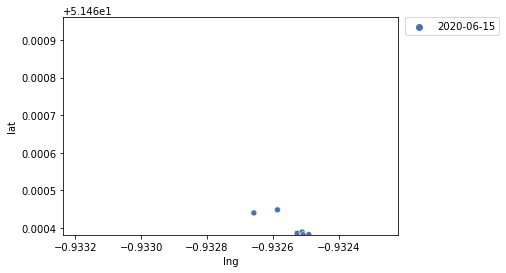

00:08:22:24:b7:fb
designated_space
ClientMacAddr    00:08:22:24:b7:fb
admin_office                   0.0
assembly_line                  0.0
canteen                        0.0
control_rooms                  0.0
entrance                       0.0
lab                       0.909091
not_in_any                0.090909
storage                        0.0
max_space                      lab
Name: 1, dtype: object


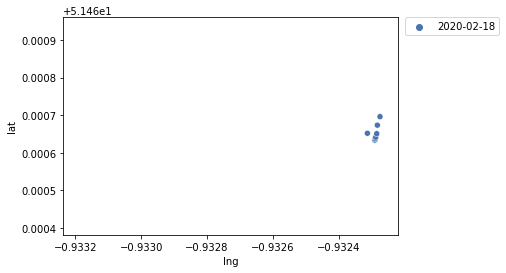

00:08:22:26:bb:fb
designated_space
ClientMacAddr    00:08:22:26:bb:fb
admin_office                   0.5
assembly_line               0.0625
canteen                        0.0
control_rooms                  0.0
entrance                    0.0625
lab                         0.1875
not_in_any                  0.0625
storage                      0.125
max_space             admin_office
Name: 2, dtype: object


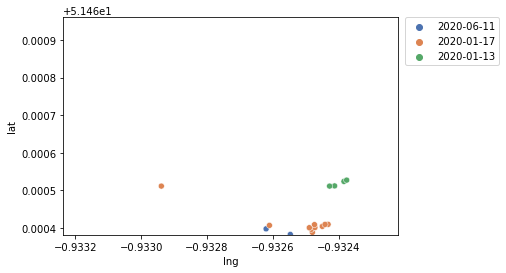

00:08:22:38:c2:fb
designated_space
ClientMacAddr    00:08:22:38:c2:fb
admin_office                   0.0
assembly_line                  0.0
canteen                        0.0
control_rooms                  0.0
entrance                       0.0
lab                       0.351351
not_in_any                0.648649
storage                        0.0
max_space               not_in_any
Name: 3, dtype: object


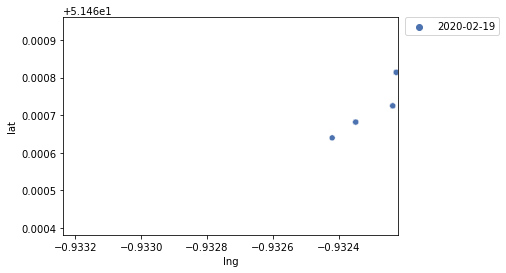

00:08:22:4c:c2:fb
designated_space
ClientMacAddr    00:08:22:4c:c2:fb
admin_office                   0.0
assembly_line                  0.0
canteen                        0.0
control_rooms                  0.0
entrance                       0.0
lab                       0.846154
not_in_any                     0.0
storage                   0.153846
max_space                      lab
Name: 4, dtype: object


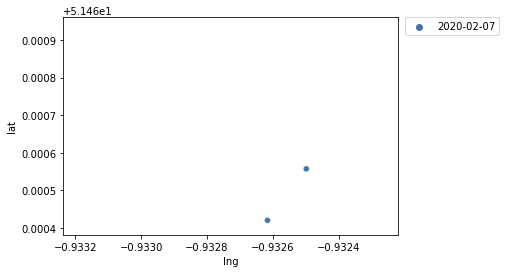

00:08:22:c0:c1:fb
designated_space
ClientMacAddr    00:08:22:c0:c1:fb
admin_office                   0.0
assembly_line                  0.0
canteen                   0.916667
control_rooms                  0.0
entrance                       0.0
lab                            0.0
not_in_any                0.083333
storage                        0.0
max_space                  canteen
Name: 5, dtype: object


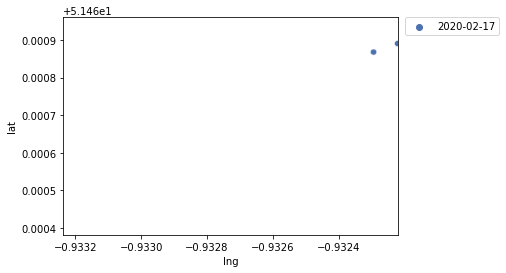

00:08:22:d8:c2:fb
designated_space
ClientMacAddr    00:08:22:d8:c2:fb
admin_office                   0.0
assembly_line                  0.0
canteen                        1.0
control_rooms                  0.0
entrance                       0.0
lab                            0.0
not_in_any                     0.0
storage                        0.0
max_space                  canteen
Name: 6, dtype: object


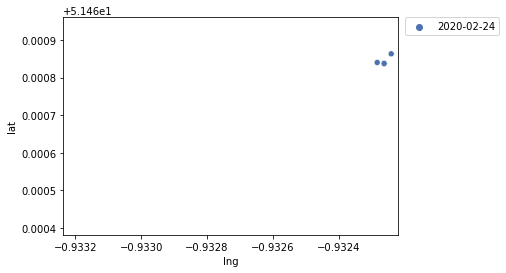

00:08:22:e0:ba:fb
designated_space
ClientMacAddr    00:08:22:e0:ba:fb
admin_office                   0.0
assembly_line                  0.0
canteen                        0.0
control_rooms                  0.0
entrance                       1.0
lab                            0.0
not_in_any                     0.0
storage                        0.0
max_space                 entrance
Name: 7, dtype: object


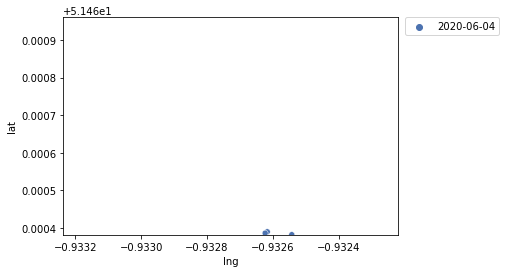

00:0a:f5:40:18:c0
designated_space
ClientMacAddr    00:0a:f5:40:18:c0
admin_office              0.023973
assembly_line             0.520548
canteen                        0.0
control_rooms             0.089041
entrance                  0.130137
lab                            0.0
not_in_any                     0.0
storage                   0.236301
max_space            assembly_line
Name: 8, dtype: object


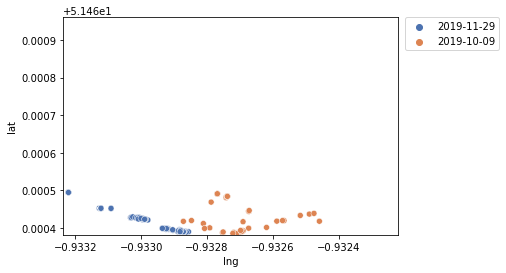

00:0c:e7:02:67:0d
designated_space
ClientMacAddr    00:0c:e7:02:67:0d
admin_office              0.923077
assembly_line                  0.0
canteen                        0.0
control_rooms                  0.0
entrance                       0.0
lab                            0.0
not_in_any                0.076923
storage                        0.0
max_space             admin_office
Name: 9, dtype: object


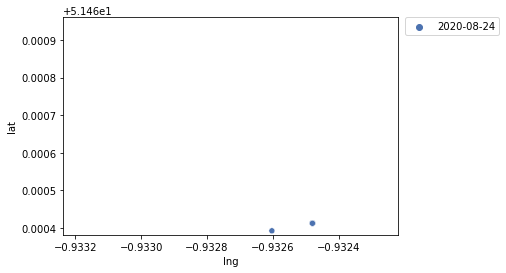

In [75]:
## plot the data with associated space
ind = 0
for i in df_mobile_space_1F["ClientMacAddr"].unique()[:10]:
    print(i)
    #print('Designated space: {}'.format(df_mobile_space.loc[ind,:]))
    print(df_mobile_space_1F.loc[ind,:])
    ind += 1
    # plot machinary colored by date
#     data=df[(df['ClientMacAddr'] == i) & (df['Level'] == '2nd Floor')]
    data=df[(df['ClientMacAddr'] == i)]
    #print(data.head())
    sns.scatterplot(x="lng", y="lat", data=data
                    , hue="date", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

### Try to find vehicles and operator

In [76]:
vehicle_or_operator = df_mobile_space_1F[df_mobile_space_1F['max_space'] == 'assembly_line']
vehicle_or_operator

designated_space      ClientMacAddr  admin_office  assembly_line   canteen  \
8                 00:0a:f5:40:18:c0      0.023973       0.520548  0.000000   
12                00:0c:e7:09:cd:29      0.000000       1.000000  0.000000   
36                00:0c:e7:3d:4b:00      0.000000       0.857143  0.000000   
71                00:0c:e7:84:aa:b1      0.000000       1.000000  0.000000   
119               00:0c:e7:ef:e5:6b      0.000000       1.000000  0.000000   
...                             ...           ...            ...       ...   
4353              f8:ff:c2:85:30:29      0.000000       1.000000  0.000000   
4355              f8:ff:c2:c0:0b:8b      0.019608       0.813725  0.000000   
4357              fc:3f:7c:08:cd:4d      0.000000       0.866667  0.000000   
4358              fc:45:96:12:d1:4b      0.227068       0.310526  0.140602   
4369              fc:d8:48:80:ab:de      0.003175       0.415873  0.000000   

designated_space  control_rooms  entrance       lab  not_in_any   storage  \
8                      0.089041  0.130137  0.000000    0.000000  0.236301   
12                     0.000000  0.000000  0.000000    0.000000  0.000000   
36                     0.000000  0.071429  0.000000    0.000000  0.071429   
71                     0.000000  0.000000  0.000000    0.000000  0.000000   
119                    0.000000  0.000000  0.000000    0.000000  0.000000   
...                         ...       ...       ...         ...       ...   
4353                   0.000000  0.000000  0.000000    0.000000  0.000000   
4355                   0.156863  0.000000  0.000000    0.000000  0.009804   
4357                   0.133333  0.000000  0.000000    0.000000  0.000000   
4358                   0.024060  0.034586  0.189474    0.025564  0.048120   
4369                   0.000000  0.174603  0.000000    0.000000  0.406349   

designated_space      max_space  
8                 assembly_line  
12                assembly_line  
36                assembly_line  
71                assembly_line  
119               assembly_line  
...                         ...  
4353              assembly_line  
4355              assembly_line  
4357              assembly_line  
4358              assembly_line  
4369              assembly_line  

[1059 rows x 10 columns]

                                  8
designated_space                   
ClientMacAddr     00:0a:f5:40:18:c0
admin_office               0.023973
assembly_line              0.520548
canteen                         0.0
control_rooms              0.089041
entrance                   0.130137
lab                             0.0
not_in_any                      0.0
storage                    0.236301
max_space             assembly_line


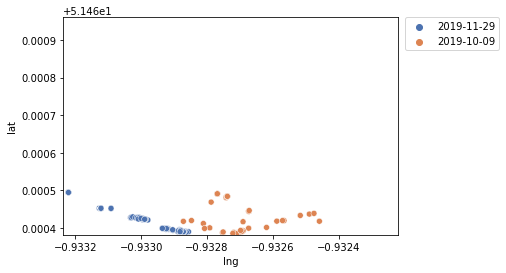

                                 12
designated_space                   
ClientMacAddr     00:0c:e7:09:cd:29
admin_office                    0.0
assembly_line                   1.0
canteen                         0.0
control_rooms                   0.0
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                         0.0
max_space             assembly_line


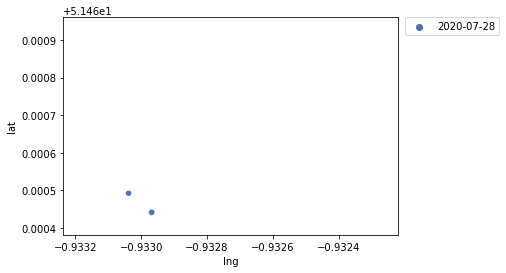

                                 36
designated_space                   
ClientMacAddr     00:0c:e7:3d:4b:00
admin_office                    0.0
assembly_line              0.857143
canteen                         0.0
control_rooms                   0.0
entrance                   0.071429
lab                             0.0
not_in_any                      0.0
storage                    0.071429
max_space             assembly_line


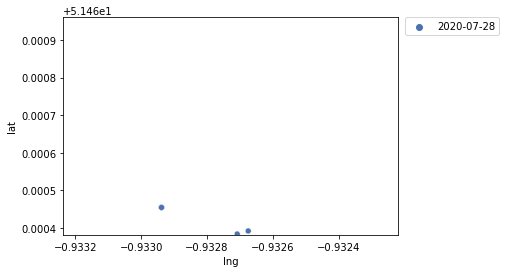

                                 71
designated_space                   
ClientMacAddr     00:0c:e7:84:aa:b1
admin_office                    0.0
assembly_line                   1.0
canteen                         0.0
control_rooms                   0.0
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                         0.0
max_space             assembly_line


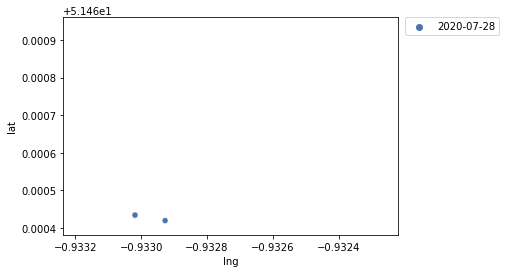

                                119
designated_space                   
ClientMacAddr     00:0c:e7:ef:e5:6b
admin_office                    0.0
assembly_line                   1.0
canteen                         0.0
control_rooms                   0.0
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                         0.0
max_space             assembly_line


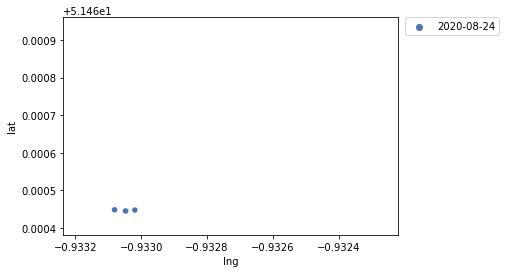

                                125
designated_space                   
ClientMacAddr     00:10:02:28:95:a7
admin_office                    0.0
assembly_line                   1.0
canteen                         0.0
control_rooms                   0.0
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                         0.0
max_space             assembly_line


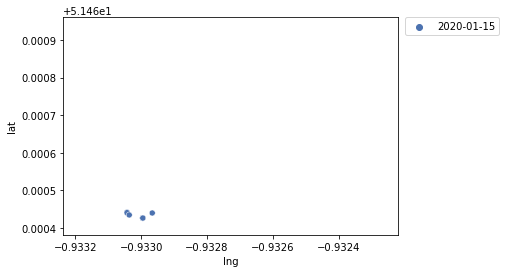

                                126
designated_space                   
ClientMacAddr     00:10:20:cd:86:91
admin_office               0.112245
assembly_line              0.744898
canteen                         0.0
control_rooms                   0.0
entrance                        0.0
lab                        0.040816
not_in_any                 0.091837
storage                    0.010204
max_space             assembly_line


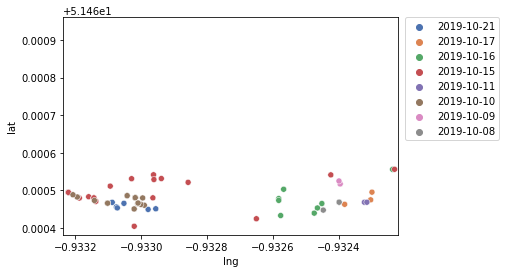

                                127
designated_space                   
ClientMacAddr     00:10:20:cd:a9:21
admin_office               0.142857
assembly_line              0.714286
canteen                         0.0
control_rooms              0.142857
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                         0.0
max_space             assembly_line


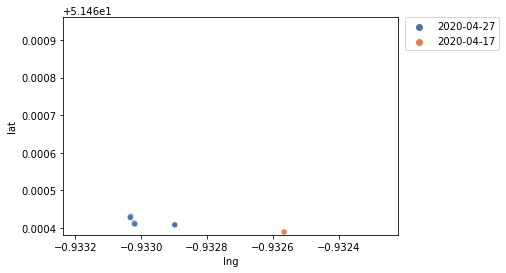

                                128
designated_space                   
ClientMacAddr     00:10:20:ce:df:1d
admin_office                    0.0
assembly_line              0.501639
canteen                         0.0
control_rooms              0.088525
entrance                        0.0
lab                        0.219672
not_in_any                 0.157377
storage                    0.032787
max_space             assembly_line


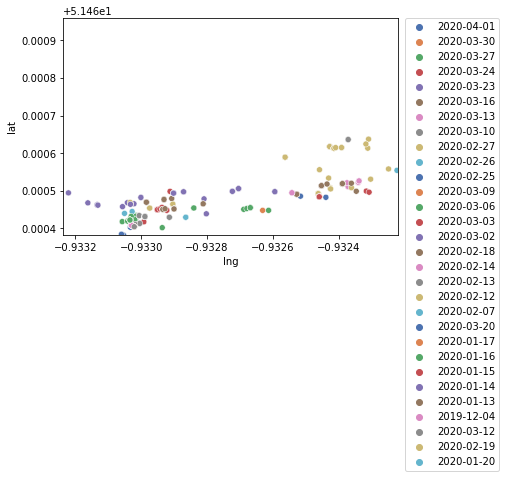

                                132
designated_space                   
ClientMacAddr     00:10:40:b9:bb:80
admin_office               0.333333
assembly_line              0.666667
canteen                         0.0
control_rooms                   0.0
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                         0.0
max_space             assembly_line


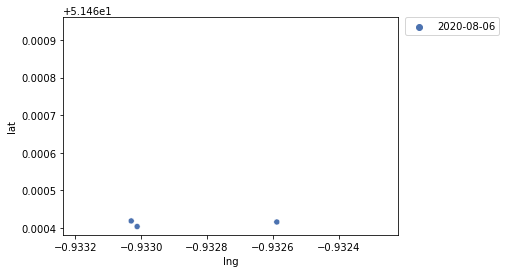

                                134
designated_space                   
ClientMacAddr     00:18:e4:d6:c8:d0
admin_office                    0.0
assembly_line              0.511111
canteen                         0.0
control_rooms              0.377778
entrance                   0.022222
lab                             0.0
not_in_any                      0.0
storage                    0.088889
max_space             assembly_line


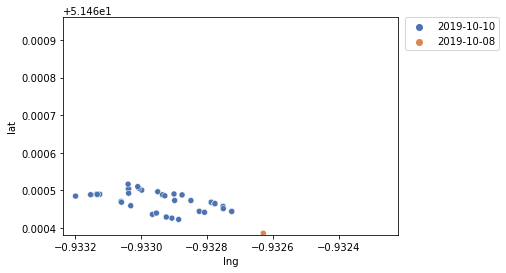

                                136
designated_space                   
ClientMacAddr     00:1e:42:19:5d:bc
admin_office                    0.0
assembly_line                   1.0
canteen                         0.0
control_rooms                   0.0
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                         0.0
max_space             assembly_line


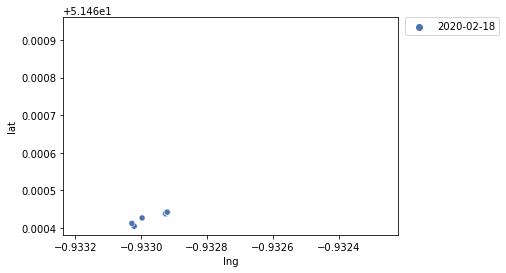

                                137
designated_space                   
ClientMacAddr     00:23:a7:d9:dc:a0
admin_office                    0.0
assembly_line              0.996354
canteen                         0.0
control_rooms              0.003646
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                         0.0
max_space             assembly_line


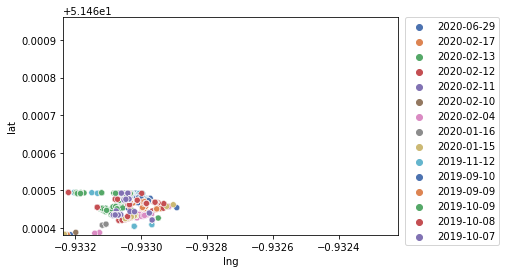

                                139
designated_space                   
ClientMacAddr     00:23:a7:e5:b3:b4
admin_office                    0.0
assembly_line               0.88841
canteen                         0.0
control_rooms              0.086613
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                    0.024978
max_space             assembly_line


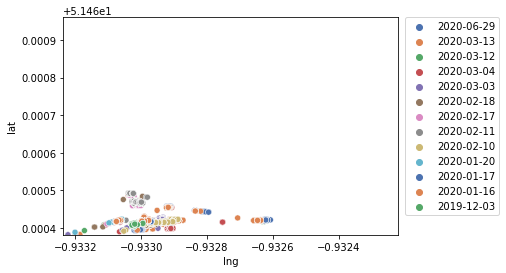

                                142
designated_space                   
ClientMacAddr     00:23:a7:e7:7e:f0
admin_office                    0.0
assembly_line              0.992688
canteen                         0.0
control_rooms              0.007312
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                         0.0
max_space             assembly_line


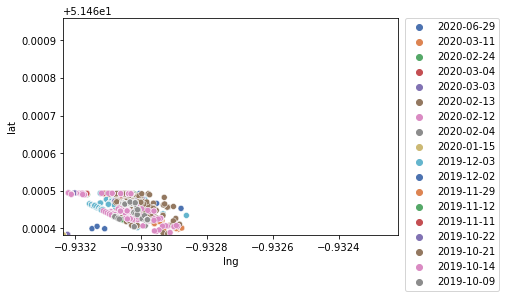

                                145
designated_space                   
ClientMacAddr     00:27:15:bc:e4:ff
admin_office                    0.0
assembly_line              0.780822
canteen                         0.0
control_rooms              0.068493
entrance                        0.0
lab                             0.0
not_in_any                  0.09589
storage                    0.054795
max_space             assembly_line


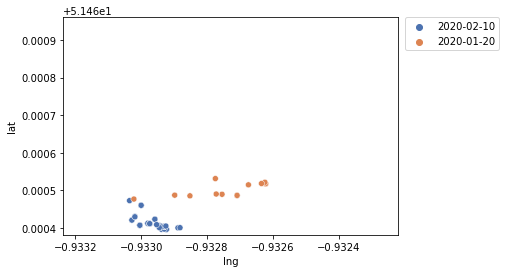

                                148
designated_space                   
ClientMacAddr     00:28:f8:bc:7f:c3
admin_office                    0.0
assembly_line              0.993197
canteen                         0.0
control_rooms              0.006803
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                         0.0
max_space             assembly_line


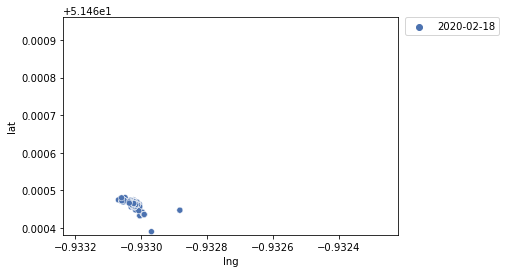

                                149
designated_space                   
ClientMacAddr     00:28:f8:bc:7f:c4
admin_office                    0.0
assembly_line                   1.0
canteen                         0.0
control_rooms                   0.0
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                         0.0
max_space             assembly_line


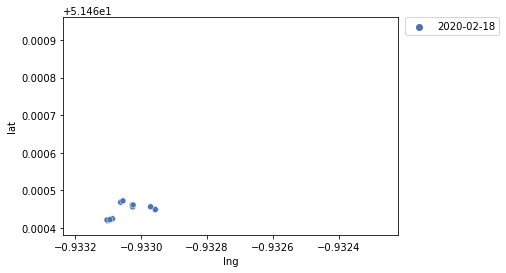

                                151
designated_space                   
ClientMacAddr     00:3e:50:6b:dd:26
admin_office                    0.0
assembly_line                   1.0
canteen                         0.0
control_rooms                   0.0
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                         0.0
max_space             assembly_line


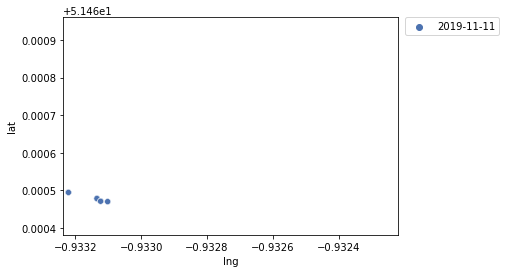

                                156
designated_space                   
ClientMacAddr     00:a5:5c:8f:06:2c
admin_office                    0.0
assembly_line                 0.525
canteen                         0.0
control_rooms                  0.15
entrance                        0.0
lab                             0.0
not_in_any                    0.075
storage                        0.25
max_space             assembly_line


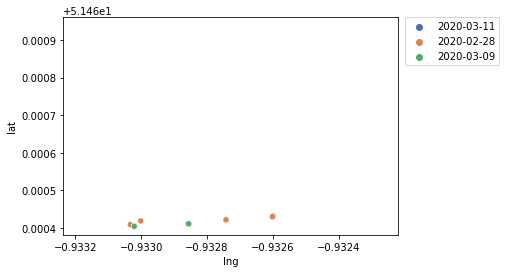

In [77]:
## plot the data with associated space
for i in vehicle_or_operator["ClientMacAddr"].unique()[:10]:
    print((vehicle_or_operator[vehicle_or_operator['ClientMacAddr'] == i]).T)
    # plot machinary colored by date
#     data=df[(df['ClientMacAddr'] == i) & (df['Level'] == '2nd Floor')]
    data=df[(df['ClientMacAddr'] == i)]
    #print(data.head())
    sns.scatterplot(x="lng", y="lat", data=data
                    , hue="date", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

### Assign Job function

In [78]:
# Create new column using dictionary
designated_space_mapping_dict = { 
             "canteen":"canteen_worker",
             "admin_office":"engineer",
             "assembly_line":"operator",
             "entrance":"security_guard",
             "control_rooms": "operator",
             "lab": "researcher",
             "storage": "storage worker",
             "not_in_any": "visitor"
           }
  
# combine this new data with existing DataFrame
df_mobile_space_1F["job_function"] = df_mobile_space_1F["max_space"].map(designated_space_mapping_dict)

In [79]:
print(df_mobile_space_1F['job_function'].value_counts(dropna=False))
df_mobile_space_1F

operator          1593
researcher         852
visitor            609
storage worker     550
engineer           386
canteen_worker     367
security_guard      15
Name: job_function, dtype: int64


designated_space      ClientMacAddr  admin_office  assembly_line   canteen  \
0                 00:08:22:20:bc:fb      0.666667       0.000000  0.000000   
1                 00:08:22:24:b7:fb      0.000000       0.000000  0.000000   
2                 00:08:22:26:bb:fb      0.500000       0.062500  0.000000   
3                 00:08:22:38:c2:fb      0.000000       0.000000  0.000000   
4                 00:08:22:4c:c2:fb      0.000000       0.000000  0.000000   
...                             ...           ...            ...       ...   
4367              fc:a4:79:ad:0e:71      0.000000       0.000000  0.000000   
4368              fc:a6:67:be:c0:a5      0.047945       0.000000  0.075342   
4369              fc:d8:48:80:ab:de      0.003175       0.415873  0.000000   
4370              fc:f8:ae:5a:6f:ea      0.193146       0.000000  0.000000   
4371              fc:fc:48:36:16:6b      0.000000       0.000000  0.245614   

designated_space  control_rooms  entrance       lab  not_in_any   storage  \
0                      0.000000  0.166667  0.000000    0.000000  0.166667   
1                      0.000000  0.000000  0.909091    0.090909  0.000000   
2                      0.000000  0.062500  0.187500    0.062500  0.125000   
3                      0.000000  0.000000  0.351351    0.648649  0.000000   
4                      0.000000  0.000000  0.846154    0.000000  0.153846   
...                         ...       ...       ...         ...       ...   
4367                   0.000000  0.000000  0.714286    0.285714  0.000000   
4368                   0.002283  0.000000  0.815068    0.059361  0.000000   
4369                   0.000000  0.174603  0.000000    0.000000  0.406349   
4370                   0.000000  0.000000  0.803738    0.003115  0.000000   
4371                   0.000000  0.000000  0.438596    0.315789  0.000000   

designated_space      max_space job_function  
0                  admin_office     engineer  
1                           lab   researcher  
2                  admin_office     engineer  
3                    not_in_any      visitor  
4                           lab   researcher  
...                         ...          ...  
4367                        lab   researcher  
4368                        lab   researcher  
4369              assembly_line     operator  
4370                        lab   researcher  
4371                        lab   researcher  

[4372 rows x 11 columns]

In [80]:
len(df_mobile_space_1F['ClientMacAddr'].unique())

4372

In [81]:
print(df_mobile_space_1F['max_space'].value_counts(dropna=False))
print('---------------------------------')
print(df_mobile_space_1F['job_function'].value_counts(dropna=False))

assembly_line    1059
lab               852
not_in_any        609
storage           550
control_rooms     534
admin_office      386
canteen           367
entrance           15
Name: max_space, dtype: int64
---------------------------------
operator          1593
researcher         852
visitor            609
storage worker     550
engineer           386
canteen_worker     367
security_guard      15
Name: job_function, dtype: int64


In [82]:
Mobile_device_1F = Mobile_device.merge(df_mobile_space_1F[['ClientMacAddr','job_function']], on='ClientMacAddr', how='right').fillna("undefined_job_function")
Mobile_device_1F.tail(30)


ClientMacAddr  Distance(Meter)  total_day  total_signal  Weekday  \
4342  f8:87:f1:ea:3e:21        26.040805          7           649      7.0   
4343  f8:94:c2:6a:be:63        24.097536          1           611      1.0   
4344  f8:94:c2:f2:17:55        51.514293          2          4154      2.0   
4345  f8:a9:d0:0c:b1:91        21.231357          1            14      1.0   
4346  f8:c3:9e:8a:cc:52        56.605726         16         13872     16.0   
4347  f8:c3:9e:bd:06:b2        36.854117          2            48      2.0   
4348  f8:c3:9e:be:08:e0         8.138128          1            14      1.0   
4349  f8:cf:c5:7e:14:85        24.835069          2            34      2.0   
4350  f8:da:0c:07:43:e7        29.701888          3            71      3.0   
4351  f8:e9:4e:6a:3a:4d        26.811507          1            25      1.0   
4352  f8:ff:c2:01:d0:8d        52.661363          2           574      2.0   
4353  f8:ff:c2:85:30:29         8.334590          1            61      1.0   
4354  f8:ff:c2:8e:48:d9         8.345473          8           288      8.0   
4355  f8:ff:c2:c0:0b:8b        25.742641          3           102      3.0   
4356  fc:18:3c:21:0f:d3        97.042589          1           871      1.0   
4357  fc:3f:7c:08:cd:4d        26.595797          1            15      1.0   
4358  fc:45:96:12:d1:4b        35.245624         13          1330     13.0   
4359  fc:45:96:c6:da:f5        38.937673          2           230      2.0   
4360  fc:45:96:e1:73:17        15.709686          1            13      1.0   
4361  fc:62:b9:70:ef:17        11.224170          1            14      1.0   
4362  fc:62:b9:b9:4c:be         8.414407          1             4      1.0   
4363  fc:62:b9:ba:4d:77         9.531719          1            10      1.0   
4364  fc:65:de:5e:93:00        26.160282          1            19      1.0   
4365  fc:77:74:a4:a0:06        88.568786          1           226      1.0   
4366  fc:94:35:23:ee:a5       120.327178          1           411      1.0   
4367  fc:a4:79:ad:0e:71        40.261881          1             7      1.0   
4368  fc:a6:67:be:c0:a5        48.757173          6           438      6.0   
4369  fc:d8:48:80:ab:de        32.174643          2           315      2.0   
4370  fc:f8:ae:5a:6f:ea        26.020636          1           321      1.0   
4371  fc:fc:48:36:16:6b        40.561440          1           114      1.0   

      Weekend Mobile_or_fixed          job_function_x  job_function_y  
4342      0.0   Mobile Device  undefined_job_function  storage worker  
4343      0.0   Mobile Device  undefined_job_function      researcher  
4344      0.0   Mobile Device  undefined_job_function      researcher  
4345      0.0   Mobile Device  undefined_job_function        engineer  
4346      0.0   Mobile Device  undefined_job_function        operator  
4347      0.0   Mobile Device  undefined_job_function        engineer  
4348      0.0   Mobile Device  undefined_job_function         visitor  
4349      0.0   Mobile Device  undefined_job_function  storage worker  
4350      0.0   Mobile Device  undefined_job_function        engineer  
4351      0.0   Mobile Device  undefined_job_function  canteen_worker  
4352      0.0   Mobile Device  undefined_job_function        operator  
4353      0.0   Mobile Device  undefined_job_function        operator  
4354      0.0   Mobile Device  undefined_job_function        engineer  
4355      0.0   Mobile Device  undefined_job_function        operator  
4356      0.0   Mobile Device  undefined_job_function         visitor  
4357      0.0   Mobile Device  undefined_job_function        operator  
4358      0.0   Mobile Device  undefined_job_function        operator  
4359      0.0   Mobile Device  undefined_job_function         visitor  
4360      0.0   Mobile Device  undefined_job_function      researcher  
4361      0.0   Mobile Device  undefined_job_function  storage worker  
4362      0.0   Mobile Device  undefined_job_function  storage worker  
4363   

In [96]:
Mobile_device_1F.loc[(Mobile_device_1F['job_function_y'] == 'operator') & (Mobile_device_1F['Distance(Meter)'] < 10),
                       'job_function_y'] = 'vehicle'


In [97]:
Mobile_device_1F['job_function_y'].value_counts(dropna=False)

operator          1263
researcher         852
visitor            609
storage worker     550
engineer           386
canteen_worker     367
vehicle            330
security_guard      15
Name: job_function_y, dtype: int64

### Fixed device: Machine

In [85]:
Fix_device.head()

ClientMacAddr  Distance(Meter)  total_day  total_signal  Weekday  \
4452  80:58:f8:cc:10:67         4.997148          1            13      1.0   
7520  d0:77:14:7f:b9:2c         4.988431          1            13      1.0   
3800  80:58:f8:70:0f:66         4.977924          1            13      1.0   
7446  d0:77:14:74:85:9d         4.975688          1            13      1.0   
8218  d0:77:14:ff:47:71         4.960126          1            14      1.0   

      Weekend Mobile_or_fixed  
4452      0.0    Fixed Device  
7520      0.0    Fixed Device  
3800      0.0    Fixed Device  
7446      0.0    Fixed Device  
8218      0.0    Fixed Device

In [86]:
Fix_device.shape

(4812, 7)

In [87]:
machinery_df = Fix_device[Fix_device["total_day"] > 5]
print(machinery_df.shape)
machinery_df

(97, 7)


ClientMacAddr  Distance(Meter)  total_day  total_signal  Weekday  \
9531  fc:62:b9:23:ea:05         4.902584          6           110      6.0   
8771  f4:c2:48:57:c9:77         4.773229         20           664     20.0   
2555  64:6e:69:d9:fc:8b         4.748308         16            98     10.0   
2095  58:c5:cb:43:31:99         4.661337          6           158      6.0   
819   14:d1:69:bf:67:0d         4.623590          6           223      6.0   
...                 ...              ...        ...           ...      ...   
2432  5c:e0:c5:ad:af:f2         0.016285         10           183     10.0   
8324  d8:68:c3:a3:80:91         0.000000          8           115      8.0   
1959  48:bf:6b:1f:5e:fd         0.000000          8           112      8.0   
875   1c:5c:f2:f3:7a:fd         0.000000          7            27      7.0   
5723  9c:b6:d0:e2:75:ed         0.000000          9           131      9.0   

      Weekend Mobile_or_fixed  
9531      0.0    Fixed Device  
8771      0.0    Fixed Device  
2555      6.0    Fixed Device  
2095      0.0    Fixed Device  
819       0.0    Fixed Device  
...       ...             ...  
2432      0.0    Fixed Device  
8324      0.0    Fixed Device  
1959      0.0    Fixed Device  
875       0.0    Fixed Device  
5723      0.0    Fixed Device  

[97 rows x 7 columns]

In [88]:
df_machine = df[(df['ClientMacAddr'].isin(Fix_device[Fix_device["total_day"] > 5]["ClientMacAddr"])) & 
               (df['Level'].isin(["1st Floor"]))]

df_machine['ClientMacAddr'].nunique()

94

1c:5c:f2:f3:7a:fd


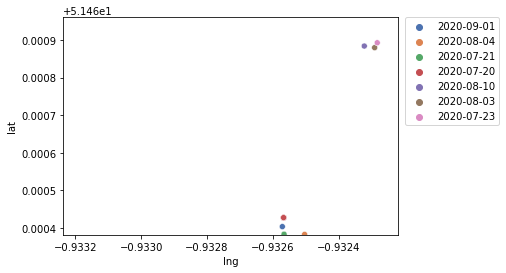

f0:98:9d:d6:70:35


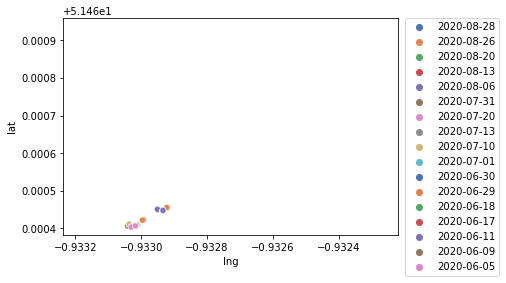

f0:6e:0b:cd:f8:27


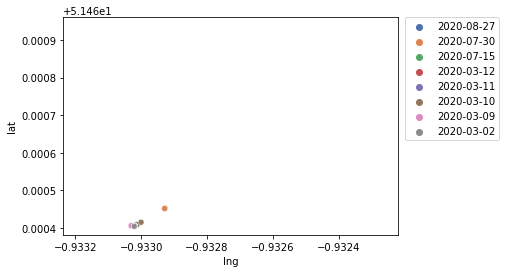

60:70:c0:f3:ce:b9


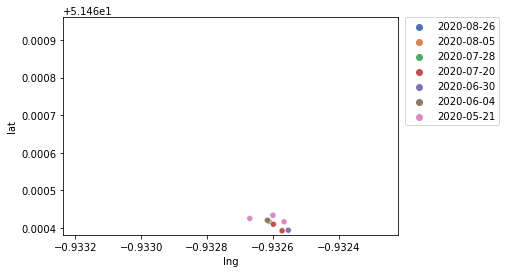

38:f9:d3:1e:30:df


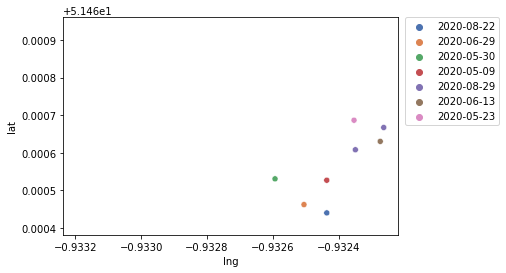

In [89]:
# plot machinary colored by level
for i in df_machine["ClientMacAddr"].unique()[:5]:
    print(i)
    sns.scatterplot(x="lng", y="lat", data=df_machine[df_machine['ClientMacAddr'] == i], hue="date", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

1c:5c:f2:f3:7a:fd


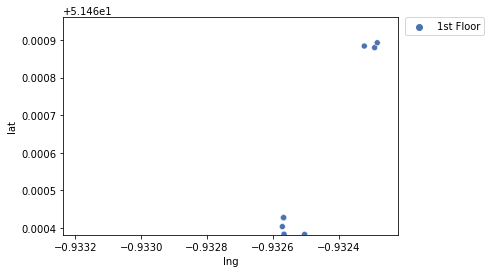

f0:98:9d:d6:70:35


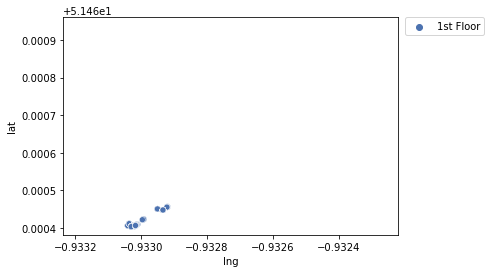

f0:6e:0b:cd:f8:27


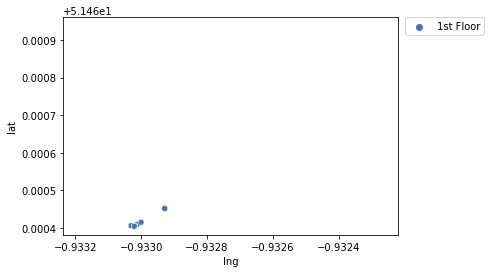

60:70:c0:f3:ce:b9


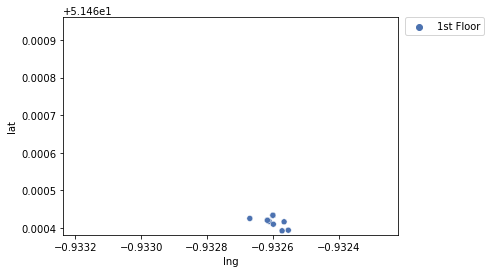

38:f9:d3:1e:30:df


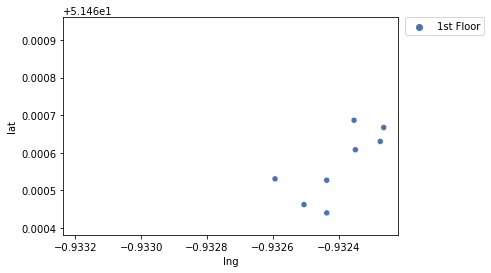

In [90]:
# plot machinary colored by level
for i in df_machine["ClientMacAddr"].unique()[:5]:
    print(i)
    sns.scatterplot(x="lng", y="lat", data=df_machine[df_machine['ClientMacAddr'] == i], hue="Level", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()